# 1. Problem Statement <a id='Problem Statement'></a>
- Analyse and compare the GDPs of various Indian states (both total and per capita)
- Analyse whether GDP per capita is related to dropout rates in schools and colleges

## 2. Table of Contents  <a id='Table of Contents'></a>

- <a href='#Problem Statement'>1. Problem Statement</a>


- <a href='#Table of Contents'>2. Table of Contents</a>


- <a href='#Data Imports'>3. Library Imports</a>


- <a href='#Part I-A'>4. Part I-A - GDP Analysis of the Indian States</a>   
    - <a href='#Load Files'>4.1 Load Files</a>
    - <a href='#Date Type I-A'>4.2 Check for Data Type and Column names</a>    
    - <a href='#DataFrame Shape I-A'>4.3 Check for shape of dataframe and drop UTs from the dataframe</a>
    - <a href='#Missing Value I-A'>4.4 Check for missing values</a>
    - <a href='#Different DataFrame I-A'>4.5 Segregate DataFrame - GSDP and Growth</a>
    - <a href='#Best Fit Line I-A'>4.6 %Growth over years - Best Fit Line</a>
    - <a href='#Perc Growth Rate I-A'>4.7 Average %Growth rate over years</a>
    - <a href='#Total GDP 2015-16 I-A'>4.8 Total GDP of the states for the year 2015-16</a>
    
- <a href='#Part I-B'>5. Part I-B - GDP Analysis of the Indian States</a>
    - <a href='#Load all File I-B'>5.1 Load all Files</a>
    - <a href='#Check Missing Values I-B'>5.2 Check for missing values</a>
    - <a href='#Drop UTs I-B'>5.3 Drop Union Territories from DataFrame</a>
    - <a href='#GDP per Capita All States I-B'>5.4 Drop Union Territories from DataFrame</a>
    - <a href='#Ratio I-B'>5.5 Ratio of Highest per Capita GDP to the lowest per Capita GDP</a>
    - <a href='#Sectorwise Contribution I-B'>5.6 %Conribution of Primary, Secondary, Tertiary Sectors to State GDP</a>
    - <a href='#Percentile Correlation I-B'>5.7 Correlation of percentile of the state and %contribution of Primary sector to total GDP</a>
    - <a href='#Cetgorize States I-B'>5.8 Categorise states into four groups based on the GDP per capita (C1, C2, C3, C4)</a>
    - <a href='#Plot 80perc Contribution I-B'>5.9 Plot sub sectors that contribute to 80% of GSDP of categories - C1, C2, C3, C4</a>
    - <a href='#Plot GDP distribution I-B'>5.10 Plot GDP distribution of categories - C1, C2, C3, C4</a>
    - <a href='#SubSectors Correlation I-B'>5.11 Correlation of Sub-sectors with GDP of states</a>
    - <a href='#SubSectors GDP Correlation I-B'>5.12 Plot Sub-sector and State GDP correlation for each Category</a>
    
- <a href='#GDP and Education Dropout II'>6. Part-II: GDP and Education Dropout Rates</a>
    - <a href='#Load all Files II'>6.1 Load all Files</a>
    - <a href='#Shape and Missing Values II'>6.2 Check for shape, missing and duplicate values</a>
    - <a href='#Drop UTs II'>6.3 Drop Union Territories from DataFrame</a>
    - <a href='#Data Cleaning II'>6.4 Data Cleaning</a>
    - <a href='#GDP and Droupout Correlation II'>6.5 Check correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state</a>
    - <a href='#Sector and Droupout Correlation II'>6.6 Correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP</a>
    - <a href='#Hypothesis II'>6.7 Hypothesis from above data of dropout rate and Sector's %contribution and population</a>

# Library Imports <a id='Data Imports'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import itertools
import warnings
import glob,os
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

# Part I-A <a id='Part I-A'></a>

# Load Files <a id='Load Files'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [3]:
niti_master_df = pd.read_csv('./dataset/NitiAyog.csv')
niti_master_df.shape

(11, 36)

## Check for Data Type and Column names<a id='Date Type I-A'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [4]:
niti_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
Items  Description           11 non-null object
Duration                     11 non-null object
Andhra Pradesh               11 non-null float64
Arunachal Pradesh            9 non-null float64
Assam                        9 non-null float64
Bihar                        9 non-null float64
Chhattisgarh                 11 non-null float64
Goa                          9 non-null float64
Gujarat                      9 non-null float64
Haryana                      11 non-null float64
Himachal Pradesh             7 non-null float64
Jammu & Kashmir              9 non-null float64
Jharkhand                    9 non-null float64
Karnataka                    9 non-null float64
Kerala                       9 non-null float64
Madhya Pradesh               11 non-null float64
Maharashtra                  7 non-null float64
Manipur                      7 non-null float64
Meghalaya                    

### Observation from datatypes:
1. It can be seen that there are two categorical columns - Item description and Duration
2. There are 34 numeric columns
3. There are sum null rows which we have already identified in above cells
4. Dataset has information for Union Territories as well. We need to drop these UT
    - Jammu & Kashmir
    - Andaman & Nicobar Islands
    - Chandigarh
    - Delhi
    - Punducherry

## Check for column names if there is any space before or after the column names

In [5]:
list(niti_master_df.columns)

['Items  Description',
 'Duration',
 'Andhra Pradesh ',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal1',
 'Andaman & Nicobar Islands',
 'Chandigarh',
 'Delhi',
 'Puducherry',
 'All_India GDP']

### From above cell it can be seen that column name 'Andhra Pradesh' has extra spaces in the end of column name
- use strip function to remove any extra spaces in the column names

In [6]:
niti_master_df.columns = niti_master_df.columns.str.strip()
list(niti_master_df.columns)

['Items  Description',
 'Duration',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal1',
 'Andaman & Nicobar Islands',
 'Chandigarh',
 'Delhi',
 'Puducherry',
 'All_India GDP']

## Check for shape of dataframe and drop UTs from the dataframe<a id='DataFrame Shape I-A'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [7]:
niti_df = niti_master_df.copy()

In [8]:
### Drop UTs from the dataset
print('No of rows {0} and columns {1} before dropping UTs'.format(niti_df.shape[0],niti_df.shape[1]))
##Since Jammu & Kashmir was state during the given duration so keeping its information in dataframe
niti_df.drop(columns=['Andaman & Nicobar Islands','Chandigarh','Delhi','Puducherry'],
             inplace=True)
                      #,'All_India GDP'],inplace=True)
print('No of rows {0} and columns {1} after dropping UTs'.format(niti_df.shape[0],niti_df.shape[1]))

No of rows 11 and columns 36 before dropping UTs
No of rows 11 and columns 32 after dropping UTs


## Check for missing values<a id='Missing Value I-A'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [9]:
pd.DataFrame([[niti_df.shape],
            [niti_df.isnull().sum().sum()],
             [niti_df.duplicated().sum()]],
            columns = ['Niti Ayog Data Set'],
            index = ['Shape', 'Missingness', 'Duplicates'])

Niti Ayog Data Set
Shape                 (11, 32)
Missingness                 67
Duplicates                   0

## Look for missing values

In [10]:
niti_df[niti_df.columns[niti_df.isnull().any()]].isnull().sum()

Arunachal Pradesh     2
Assam                 2
Bihar                 2
Goa                   2
Gujarat               2
Himachal Pradesh      4
Jammu & Kashmir       2
Jharkhand             2
Karnataka             2
Kerala                2
Maharashtra           4
Manipur               4
Mizoram               4
Nagaland              4
Punjab                4
Rajasthan             4
Sikkim                2
Tripura               4
Uttar Pradesh         2
Uttarakhand           2
West Bengal1         11
dtype: int64

In [11]:
### Validate the total sum of missing values
niti_df[niti_df.columns[niti_df.isnull().any()]].isnull().sum().sum()

67

## Check dataset

In [12]:
## since number of observations is less (11 rows and 30 columns) - so load full dataset
niti_df

Items  Description Duration  Andhra Pradesh  \
0   GSDP - CURRENT PRICES (` in Crore)  2011-12       379402.00   
1   GSDP - CURRENT PRICES (` in Crore)  2012-13       411404.00   
2   GSDP - CURRENT PRICES (` in Crore)  2013-14       464272.00   
3   GSDP - CURRENT PRICES (` in Crore)  2014-15       526468.00   
4   GSDP - CURRENT PRICES (` in Crore)  2015-16       609934.00   
5   GSDP - CURRENT PRICES (` in Crore)  2016-17       699307.00   
6        (% Growth over previous year)  2012-13            8.43   
7        (% Growth over previous year)  2013-14           12.85   
8        (% Growth over previous year)  2014-15           13.40   
9        (% Growth over previous year)  2015-16           15.85   
10       (% Growth over previous year)  2016-17           14.65   

    Arunachal Pradesh      Assam      Bihar  Chhattisgarh       Goa  \
0            11063.00  143175.00  247144.00     158074.00  42367.00   
1            12547.00  156864.00  282368.00     177511.00  38120.00   
2            14602.00  177745.00  317101.00     206690.00  35921.00   
3            16761.00  198098.00  373920.00     234982.00  40633.00   
4            18784.00  224234.00  413503.00     260776.00  45002.00   
5                 NaN        NaN        NaN     290140.00       NaN   
6               13.41       9.56      14.25         12.30    -10.02   
7               16.38      13.31      12.30         16.44     -5.77   
8               14.79      11.45      17.92         13.69     13.12   
9               12.07      13.19      10.59         10.98     10.75   
10                NaN        NaN        NaN         11.26       NaN   

      Gujarat    Haryana  Himachal Pradesh  Jammu & Kashmir  Jharkhand  \
0   615606.00  297539.00          72720.00         78254.00  150918.00   
1   724495.00  347032.00          82820.00         87105.00  174724.00   
2   807623.00  400662.00          94764.00         95893.00  188567.00   
3   895027.00  437462.00         104369.00        100404.00  217107.00   
4   994316.00  485184.00               NaN        118387.00  241955.00   
5         NaN  547396.00               NaN              NaN        NaN   
6       17.69      16.63             13.89            11.31      15.77   
7       11.47      15.45             14.42            10.09       7.92   
8       10.82       9.18             10.14             4.70      15.14   
9       11.09      10.91               NaN            17.91      11.44   
10        NaN      12.82               NaN              NaN        NaN   

     Karnataka     Kerala  Madhya Pradesh  Maharashtra   Manipur  Meghalaya  \
0    603778.00  364048.00       315561.00   1272967.00  12915.00   19918.00   
1    691700.00  412313.00       380924.00   1448466.00  13748.00   21872.00   
2    817886.00  465041.00       437737.00   1647506.00  16198.00   22938.00   
3    921788.00  526002.00       481982.00   1792122.00  18043.00   24408.00   
4   1027068.00  588337.00       543975.00          NaN       NaN   26745.00   
5          NaN        NaN       640484.00          NaN       NaN   29567.00   
6        14.56      13.26           20.71        13.79      6.45       9.81   
7        18.24      12.79           14.91        13.74     17.83       4.87   
8        12.70      13.11           10.11         8.78     11.39       6.41   
9        11.42      11.85           12.86          NaN       NaN       9.58   
10         NaN        NaN           17.74          NaN       NaN      10.55   

    Mizoram  Nagaland     Odisha     Punjab  Rajasthan    Sikkim  Tamil Nadu  \
0    7259.0  11839.00  227872.00  266628.00  436465.00  11165.00   751485.00   
1    8362.0  13619.00  258275.00  297734.00  494004.00  12338.00   855481.00   
2   10293.0  16612.00  291709.00  334714.00  549701.00  13862.00   971090.00   
3   11559.0  18414.00  321971.00  368011.00  612194.00  15209.00  1092564.00   
4       NaN       NaN  341887.00        NaN        NaN  16637.00  1212668.00   
5       NaN       NaN  378991.00        NaN 

In [13]:
### Validate the total sum of missing values
duration_list=['2011-12','2012-13','2013-14','2014-15','2015-16','2016-17']
for duration in duration_list:
    missing_val = niti_df[niti_df['Duration']==duration].isnull().sum().sum()
    print('Total missing values for duration {0}: {1}'.format(duration,missing_val))

Total missing values for duration 2011-12: 1
Total missing values for duration 2012-13: 2
Total missing values for duration 2013-14: 2
Total missing values for duration 2014-15: 2
Total missing values for duration 2015-16: 18
Total missing values for duration 2016-17: 42


## Observation from above cell
- It can be seen from above cell that there are 42 missing values. The duration of 2016-17 can be dropped. But lets keep this duration since values are available for few states and also available for All India(nation). Since Python is capable of handling missing values so lets go ahead with missing values by ignoring it during plotting. This will help in analysing trend of growth

In [14]:
## This piece of code will check for missingness of data for each state in niti_df dataframe
niti_datacheck = pd.DataFrame(index=['Missingness'])
print('No. of rows: {0} and columns: {1} in niti ayog dataframe'.format(niti_df.shape[0],niti_df.shape[1]))
for col in niti_df.columns:
    niti_datacheck[col] = [niti_df[col].isnull().sum().sum()]
niti_datacheck

No. of rows: 11 and columns: 32 in niti ayog dataframe


Items  Description  Duration  Andhra Pradesh  Arunachal Pradesh  \
Missingness                   0         0               0                  2   

             Assam  Bihar  Chhattisgarh  Goa  Gujarat  Haryana  \
Missingness      2      2             0    2        2        0   

             Himachal Pradesh  Jammu & Kashmir  Jharkhand  Karnataka  Kerala  \
Missingness                 4                2          2          2       2   

             Madhya Pradesh  Maharashtra  Manipur  Meghalaya  Mizoram  \
Missingness               0            4        4          0        4   

             Nagaland  Odisha  Punjab  Rajasthan  Sikkim  Tamil Nadu  \
Missingness         4       0       4          4       2           0   

             Telangana  Tripura  Uttar Pradesh  Uttarakhand  West Bengal1  \
Missingness          0        4              2            2            11   

             All_India GDP  
Missingness              0

## From above cell it can be seen that for state West Bengal, all the observations are null. 
- There is no information available for any duration for thsi state. So we can drop this state from analysis

In [15]:
print('no. of rows: {0} and columns: {1} before dropping "West Bengal" state column: {0}'.
      format(niti_df.shape[0],niti_df.shape[1]))
niti_df.drop(columns=['West Bengal1'],inplace=True)
print('no. of rows: {0} and columns: {1} after dropping "West Bengal" state column: {0}'.
      format(niti_df.shape[0],niti_df.shape[1]))
niti_df

no. of rows: 11 and columns: 32 before dropping "West Bengal" state column: 11
no. of rows: 11 and columns: 31 after dropping "West Bengal" state column: 11


Items  Description Duration  Andhra Pradesh  \
0   GSDP - CURRENT PRICES (` in Crore)  2011-12       379402.00   
1   GSDP - CURRENT PRICES (` in Crore)  2012-13       411404.00   
2   GSDP - CURRENT PRICES (` in Crore)  2013-14       464272.00   
3   GSDP - CURRENT PRICES (` in Crore)  2014-15       526468.00   
4   GSDP - CURRENT PRICES (` in Crore)  2015-16       609934.00   
5   GSDP - CURRENT PRICES (` in Crore)  2016-17       699307.00   
6        (% Growth over previous year)  2012-13            8.43   
7        (% Growth over previous year)  2013-14           12.85   
8        (% Growth over previous year)  2014-15           13.40   
9        (% Growth over previous year)  2015-16           15.85   
10       (% Growth over previous year)  2016-17           14.65   

    Arunachal Pradesh      Assam      Bihar  Chhattisgarh       Goa  \
0            11063.00  143175.00  247144.00     158074.00  42367.00   
1            12547.00  156864.00  282368.00     177511.00  38120.00   
2            14602.00  177745.00  317101.00     206690.00  35921.00   
3            16761.00  198098.00  373920.00     234982.00  40633.00   
4            18784.00  224234.00  413503.00     260776.00  45002.00   
5                 NaN        NaN        NaN     290140.00       NaN   
6               13.41       9.56      14.25         12.30    -10.02   
7               16.38      13.31      12.30         16.44     -5.77   
8               14.79      11.45      17.92         13.69     13.12   
9               12.07      13.19      10.59         10.98     10.75   
10                NaN        NaN        NaN         11.26       NaN   

      Gujarat    Haryana  Himachal Pradesh  Jammu & Kashmir  Jharkhand  \
0   615606.00  297539.00          72720.00         78254.00  150918.00   
1   724495.00  347032.00          82820.00         87105.00  174724.00   
2   807623.00  400662.00          94764.00         95893.00  188567.00   
3   895027.00  437462.00         104369.00        100404.00  217107.00   
4   994316.00  485184.00               NaN        118387.00  241955.00   
5         NaN  547396.00               NaN              NaN        NaN   
6       17.69      16.63             13.89            11.31      15.77   
7       11.47      15.45             14.42            10.09       7.92   
8       10.82       9.18             10.14             4.70      15.14   
9       11.09      10.91               NaN            17.91      11.44   
10        NaN      12.82               NaN              NaN        NaN   

     Karnataka     Kerala  Madhya Pradesh  Maharashtra   Manipur  Meghalaya  \
0    603778.00  364048.00       315561.00   1272967.00  12915.00   19918.00   
1    691700.00  412313.00       380924.00   1448466.00  13748.00   21872.00   
2    817886.00  465041.00       437737.00   1647506.00  16198.00   22938.00   
3    921788.00  526002.00       481982.00   1792122.00  18043.00   24408.00   
4   1027068.00  588337.00       543975.00          NaN       NaN   26745.00   
5          NaN        NaN       640484.00          NaN       NaN   29567.00   
6        14.56      13.26           20.71        13.79      6.45       9.81   
7        18.24      12.79           14.91        13.74     17.83       4.87   
8        12.70      13.11           10.11         8.78     11.39       6.41   
9        11.42      11.85           12.86          NaN       NaN       9.58   
10         NaN        NaN           17.74          NaN       NaN      10.55   

    Mizoram  Nagaland     Odisha     Punjab  Rajasthan    Sikkim  Tamil Nadu  \
0    7259.0  11839.00  227872.00  266628.00  436465.00  11165.00   751485.00   
1    8362.0  13619.00  258275.00  297734.00  494004.00  12338.00   855481.00   
2   10293.0  16612.00  291709.00  334714.00  549701.00  13862.00   971090.00   
3   11559.0  18414.00  321971.00  368011.00  612194.00  15209.00  1092564.00   
4       NaN       NaN  341887.00        NaN        NaN  16637.00  1212668.00   
5       NaN       NaN  378991.00        NaN 

# Part I-A

## Lets create two different dataframes <a id='Different DataFrame I-A'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>
1. DataFrame for GSDP for different years for all states
2. DataFrame for Growth Percentage over different years for all states

In [16]:
gsdp_df = niti_df[niti_df['Items  Description'].str.contains('GSDP')]
gsdp_df.drop(columns=['Items  Description'],inplace=True)
gsdp_df

Duration  Andhra Pradesh  Arunachal Pradesh     Assam     Bihar  \
0  2011-12        379402.0            11063.0  143175.0  247144.0   
1  2012-13        411404.0            12547.0  156864.0  282368.0   
2  2013-14        464272.0            14602.0  177745.0  317101.0   
3  2014-15        526468.0            16761.0  198098.0  373920.0   
4  2015-16        609934.0            18784.0  224234.0  413503.0   
5  2016-17        699307.0                NaN       NaN       NaN   

   Chhattisgarh      Goa   Gujarat   Haryana  Himachal Pradesh  \
0      158074.0  42367.0  615606.0  297539.0           72720.0   
1      177511.0  38120.0  724495.0  347032.0           82820.0   
2      206690.0  35921.0  807623.0  400662.0           94764.0   
3      234982.0  40633.0  895027.0  437462.0          104369.0   
4      260776.0  45002.0  994316.0  485184.0               NaN   
5      290140.0      NaN       NaN  547396.0               NaN   

   Jammu & Kashmir  Jharkhand  Karnataka    Kerala  Madhya Pradesh  \
0          78254.0   150918.0   603778.0  364048.0        315561.0   
1          87105.0   174724.0   691700.0  412313.0        380924.0   
2          95893.0   188567.0   817886.0  465041.0        437737.0   
3         100404.0   217107.0   921788.0  526002.0        481982.0   
4         118387.0   241955.0  1027068.0  588337.0        543975.0   
5              NaN        NaN        NaN       NaN        640484.0   

   Maharashtra  Manipur  Meghalaya  Mizoram  Nagaland    Odisha    Punjab  \
0    1272967.0  12915.0    19918.0   7259.0   11839.0  227872.0  266628.0   
1    1448466.0  13748.0    21872.0   8362.0   13619.0  258275.0  297734.0   
2    1647506.0  16198.0    22938.0  10293.0   16612.0  291709.0  334714.0   
3    1792122.0  18043.0    24408.0  11559.0   18414.0  321971.0  368011.0   
4          NaN      NaN    26745.0      NaN       NaN  341887.0       NaN   
5          NaN      NaN    29567.0      NaN       NaN  378991.0       NaN   

   Rajasthan   Sikkim  Tamil Nadu  Telangana  Tripura  Uttar Pradesh  \
0   436465.0  11165.0    751485.0   359433.0  19208.0       724049.0   
1   494004.0  12338.0    855481.0   401493.0  21663.0       822903.0   
2   549701.0  13862.0    971090.0   452186.0  25593.0       944146.0   
3   612194.0  15209.0   1092564.0   511178.0  29667.0      1043371.0   
4        NaN  16637.0   1212668.0   575631.0      NaN      1153795.0   
5        NaN      NaN   1338766.0   654294.0      NaN            NaN   

   Uttarakhand  All_India GDP  
0     115523.0      8736039.0  
1     131835.0      9946636.0  
2     149817.0     11236635.0  
3     161985.0     12433749.0  
4     184091.0     13675331.0  
5          NaN     15251028.0

In [17]:
growth_df = niti_df[niti_df['Items  Description'].str.contains('Growth')]
growth_df.drop(columns=['Items  Description'],inplace=True)
growth_df

Duration  Andhra Pradesh  Arunachal Pradesh  Assam  Bihar  Chhattisgarh  \
6   2012-13            8.43              13.41   9.56  14.25         12.30   
7   2013-14           12.85              16.38  13.31  12.30         16.44   
8   2014-15           13.40              14.79  11.45  17.92         13.69   
9   2015-16           15.85              12.07  13.19  10.59         10.98   
10  2016-17           14.65                NaN    NaN    NaN         11.26   

      Goa  Gujarat  Haryana  Himachal Pradesh  Jammu & Kashmir  Jharkhand  \
6  -10.02    17.69    16.63             13.89            11.31      15.77   
7   -5.77    11.47    15.45             14.42            10.09       7.92   
8   13.12    10.82     9.18             10.14             4.70      15.14   
9   10.75    11.09    10.91               NaN            17.91      11.44   
10    NaN      NaN    12.82               NaN              NaN        NaN   

    Karnataka  Kerala  Madhya Pradesh  Maharashtra  Manipur  Meghalaya  \
6       14.56   13.26           20.71        13.79     6.45       9.81   
7       18.24   12.79           14.91        13.74    17.83       4.87   
8       12.70   13.11           10.11         8.78    11.39       6.41   
9       11.42   11.85           12.86          NaN      NaN       9.58   
10        NaN     NaN           17.74          NaN      NaN      10.55   

    Mizoram  Nagaland  Odisha  Punjab  Rajasthan  Sikkim  Tamil Nadu  \
6      15.2     15.03   13.34   11.67      13.18   10.51       13.84   
7      23.1     21.98   12.95   12.42      11.27   12.35       13.51   
8      12.3     10.85   10.37    9.95      11.37    9.72       12.51   
9       NaN       NaN    6.19     NaN        NaN    9.39       10.99   
10      NaN       NaN   10.85     NaN        NaN     NaN       10.40   

    Telangana  Tripura  Uttar Pradesh  Uttarakhand  All_India GDP  
6       11.70    12.78          13.65        14.12          13.86  
7       12.63    18.14          14.73        13.64          12.97  
8       13.05    15.92          10.51         8.12          10.65  
9       12.61      NaN          10.58        13.65           9.99  
10      13.67      NaN            NaN          NaN          11.52

In [18]:
(411404.0-379402.0)/379402.0

0.08434852741946537

## % Gowth over previous years - Best Fit Line <a id='Best Fit Line I-A'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## Try with polyfit for best fit line first
- consider with one state first - say Andhra Pradesh

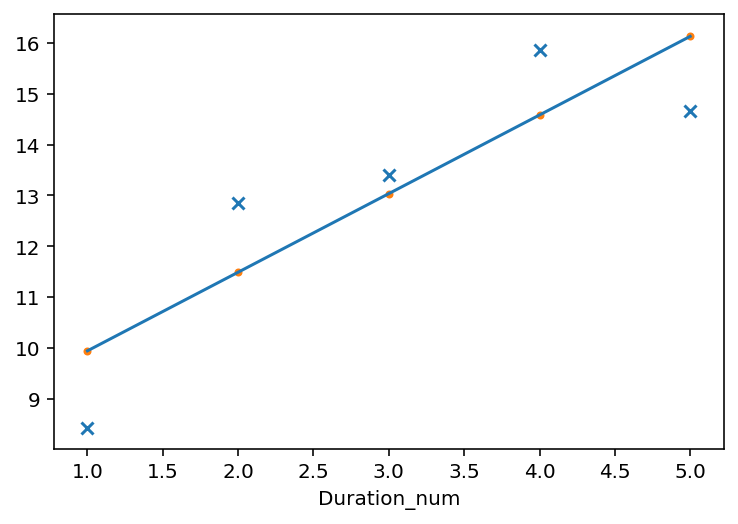

In [19]:
growth_cc_df = growth_df.copy()
growth_cc_df['Duration_num'] = growth_cc_df.Duration.map({'2012-13':1,'2013-14':2,'2014-15':3,
                                                          '2015-16':4,'2016-17':5})
x=growth_cc_df['Duration_num']
y=growth_cc_df['Andhra Pradesh']
z = np.polyfit(x,y,deg=1) 
p = np.poly1d(z)
plt.scatter(x,y, marker='x')
plt.scatter(x, p(x), marker='.')
sns.lineplot(x,p(x))
plt.show()

## Subplots to show the % Growth of all states in fiscal year 

In [20]:
#Plots seaborn barlot
plt.style.use('seaborn-white')
def subplot_barplot(dataframe, list_of_x, target):
    sns.set(font_scale=1)
    nrows = int(np.ceil(len(list_of_x)/2)) # Makes sure you have enough rows
    #tweak figsize scaler if graphs don't fit well
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, len(list_of_x)*3), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, x_axis in enumerate(list_of_x): # Gives us an index value to get into all our lists
        sns.barplot(x = dataframe[x_axis], y = dataframe[target], data = dataframe, ax=ax[i])
        ax[i].set_title('% Growth over previous year for State {0}'.format(list_of_x[i]))
        ax[i].set_xlabel('Percentage') 
        ax[i].set_ylabel(target)
        

#Plots seaborn linelot
plt.style.use('seaborn-white')
def subplot_lineplot(dataframe, nation_df,list_of_x, target):
    sns.set(font_scale=1)
    nrows = int(np.ceil(len(list_of_x)/2)) # Makes sure you have enough rows
    #tweak figsize scaler if graphs don't fit well
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, len(list_of_x)*3), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    dataframe['Duration_num'] = dataframe[target].map({'2012-13':1,
                                                          '2013-14':2,'2014-15':3,'2015-16':4,'2016-17':5})
    nation_df['Duration_num'] = nation_df[target].map({'2012-13':1,
                                                          '2013-14':2,'2014-15':3,'2015-16':4,'2016-17':5})
    
    df_slope = pd.DataFrame(columns=['State','Slope'])
    for i, x_axis in enumerate(list_of_x): # Gives us an index value to get into all our lists

        # sns.lineplot(x = target, y = x_axis, data = dataframe, ax=ax[i],label='{0} Growth%'.format(list_of_x[i]),markers='+')
        # sns.lineplot(x = 'Duration', y = 'All_India GDP', data = nation_df, ax=ax[i],label='All India Growth%',markers='o')
        

        
        x=dataframe['Duration_num']
        y=dataframe[x_axis]#.fillna(0)
        idx = np.isfinite(x) & np.isfinite(y)## this will take care of null values
        m,c = np.polyfit(x[idx], y[idx], 1)
        
        row = [list_of_x[i],m]
        df_slope.loc[i] = row
        
        
        sns.scatterplot(x='Duration_num',y=x_axis,data = dataframe, markers='x',ax=ax[i],
                        label='{0} Growth%'.format(list_of_x[i]))
        sns.lineplot(x,m*x+c,ax=ax[i],label='{0} Growth%'.format(list_of_x[i]),markers='o')
        
        x_nation=nation_df['Duration_num']
        y_nation=nation_df['All_India GDP'].fillna(0)
        m_nation,c_nation = np.polyfit(x_nation,y_nation,deg=1) 
        sns.scatterplot(x='Duration_num',y='All_India GDP',data = nation_df, markers='x',ax=ax[i],
                        label='All India Growth%')
        sns.lineplot(x_nation,m_nation*x_nation+c_nation,ax=ax[i],
                     label='All India Growth%',markers='o')
        
        ax[i].set_title('% Growth over previous year for State {0}'.format(list_of_x[i]),color='blue')
        ax[i].set_ylabel('Percentage') 
        ax[i].set_xlabel(target)
        ax[i].set_xticklabels(size=10, labels=[' ','2012-13',' ','2013-14',' ','2014-15',' ','2015-16',' ',
                                               '2016-17'])
        
    return df_slope                                           
                                                    
                                                    


### Take subset of dataset excluding 'All_India GDP'

In [21]:
col_list=[col for col in growth_df if col!='All_India GDP']
col_sel_list = [col for col in col_list if col!='Duration']
growth_sel_df = growth_df[col_list]

In [22]:
growth_sel_df

Duration  Andhra Pradesh  Arunachal Pradesh  Assam  Bihar  Chhattisgarh  \
6   2012-13            8.43              13.41   9.56  14.25         12.30   
7   2013-14           12.85              16.38  13.31  12.30         16.44   
8   2014-15           13.40              14.79  11.45  17.92         13.69   
9   2015-16           15.85              12.07  13.19  10.59         10.98   
10  2016-17           14.65                NaN    NaN    NaN         11.26   

      Goa  Gujarat  Haryana  Himachal Pradesh  Jammu & Kashmir  Jharkhand  \
6  -10.02    17.69    16.63             13.89            11.31      15.77   
7   -5.77    11.47    15.45             14.42            10.09       7.92   
8   13.12    10.82     9.18             10.14             4.70      15.14   
9   10.75    11.09    10.91               NaN            17.91      11.44   
10    NaN      NaN    12.82               NaN              NaN        NaN   

    Karnataka  Kerala  Madhya Pradesh  Maharashtra  Manipur  Meghalaya  \
6       14.56   13.26           20.71        13.79     6.45       9.81   
7       18.24   12.79           14.91        13.74    17.83       4.87   
8       12.70   13.11           10.11         8.78    11.39       6.41   
9       11.42   11.85           12.86          NaN      NaN       9.58   
10        NaN     NaN           17.74          NaN      NaN      10.55   

    Mizoram  Nagaland  Odisha  Punjab  Rajasthan  Sikkim  Tamil Nadu  \
6      15.2     15.03   13.34   11.67      13.18   10.51       13.84   
7      23.1     21.98   12.95   12.42      11.27   12.35       13.51   
8      12.3     10.85   10.37    9.95      11.37    9.72       12.51   
9       NaN       NaN    6.19     NaN        NaN    9.39       10.99   
10      NaN       NaN   10.85     NaN        NaN     NaN       10.40   

    Telangana  Tripura  Uttar Pradesh  Uttarakhand  
6       11.70    12.78          13.65        14.12  
7       12.63    18.14          14.73        13.64  
8       13.05    15.92          10.51         8.12  
9       12.61      NaN          10.58        13.65  
10      13.67      NaN            NaN          NaN

### Create dataframe of All India GDP

In [23]:
nation_growth_df=growth_df[['Duration','All_India GDP']]
nation_growth_df

Duration  All_India GDP
6   2012-13          13.86
7   2013-14          12.97
8   2014-15          10.65
9   2015-16           9.99
10  2016-17          11.52

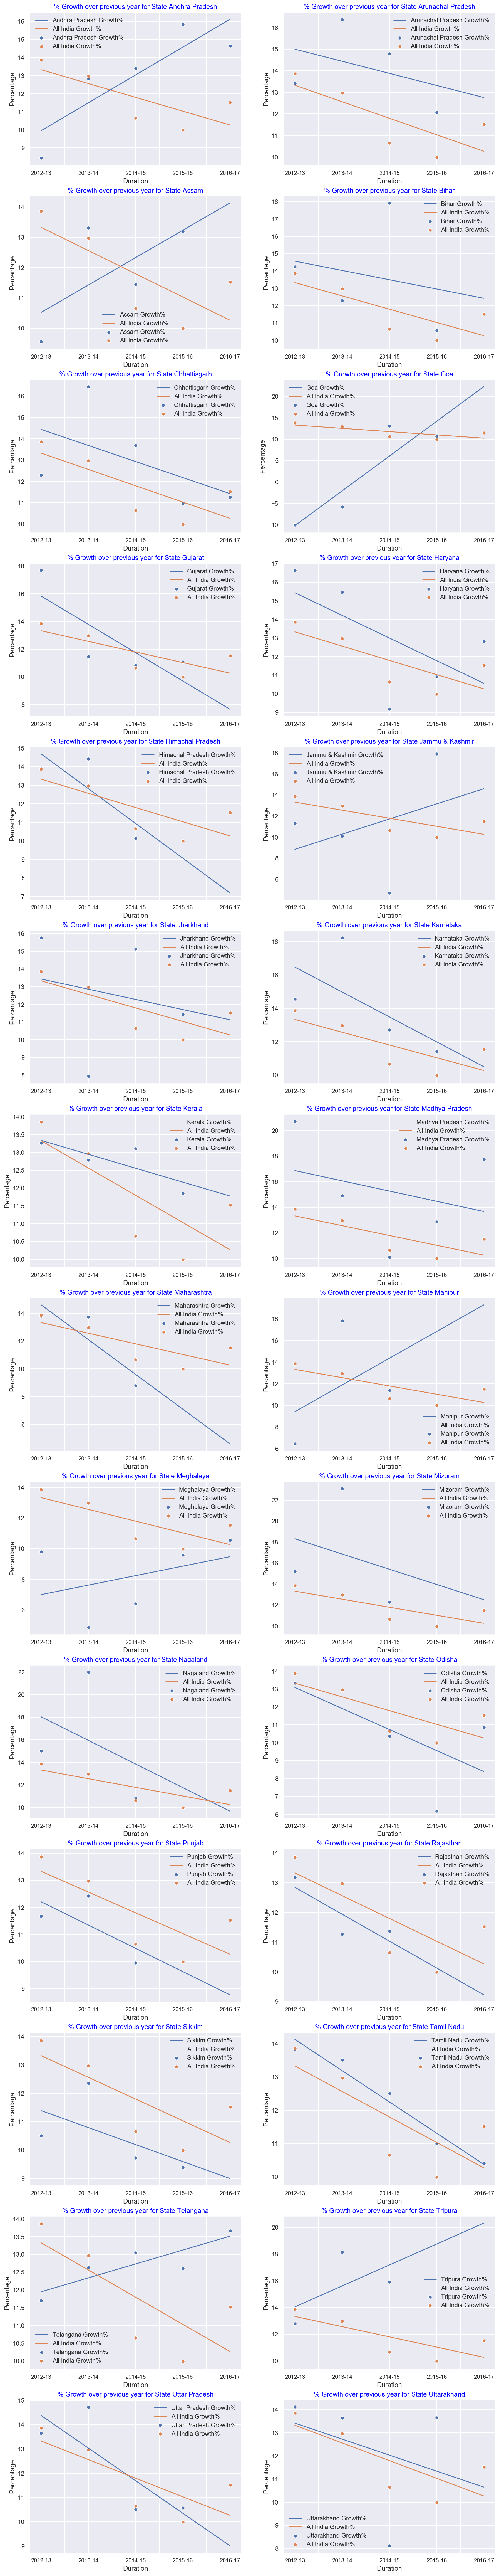

In [24]:
slop_df = subplot_lineplot(growth_sel_df,nation_growth_df, col_sel_list, 'Duration')

In [25]:
slop_df.sort_values(by='Slope',ascending=False)

State  Slope
5                 Goa  8.120
15            Manipur  2.470
25            Tripura  1.570
0      Andhra Pradesh  1.544
9     Jammu & Kashmir  1.441
2               Assam  0.903
16          Meghalaya  0.619
24          Telangana  0.392
12             Kerala -0.391
3               Bihar -0.536
1   Arunachal Pradesh -0.561
10          Jharkhand -0.577
22             Sikkim -0.599
27        Uttarakhand -0.693
4        Chhattisgarh -0.754
13     Madhya Pradesh -0.799
20             Punjab -0.860
21          Rajasthan -0.905
23         Tamil Nadu -0.940
19             Odisha -1.174
7             Haryana -1.216
26      Uttar Pradesh -1.343
17            Mizoram -1.450
11          Karnataka -1.496
8    Himachal Pradesh -1.875
6             Gujarat -2.045
18           Nagaland -2.090
14        Maharashtra -2.505

## Observations from above Plot:
- There is a negtaive trend in %growth of GDP of India as can be seen from above plot. The %growth of nation is continuously decreasing from yr 2012-13 till 2016-17
- Andhra Pradesh, Assam, Goa, Jammu & Kashmir, Manipur, Telangana, Tripura, Meghalaya states have continuos trend of increase in %growth over previous years.
- Out of these Goa has the highest value of positive slope. This means Goa state has continuous trend of increase in %growth of GDP 
- Goa, Manipur, Tripura have the highest trend of continous increase in %growth of state GDP
- Despite India’s average growth being negative, the above states have been growing at an unprecedented range. This could be possible due to multiple factors – low base, non-dependence on external factors etc.
- Maharashtra, Nagaland, Gujarat are the 3 states with continuous low performing trend wrt %growth of state GDP
- India’s one of largest state Maharashtra has been de-growing more than India’s national average. Other states like Gujarat, Karnataka are also showing negative growth. Mizoram has been de-growing but still not at par with national average (perhaps base effect)

# Lets plot the average %growth rate across all states and India(as a nation). <a id='Perc Growth Rate I-A'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>
- Years considered are fiscal year 2012-13, 2013-14, 2014-15, 2015-16, 2016-17

## Transpose growth dataframe 

In [26]:
growth_transpose_df= growth_df.T
growth_transpose_df.rename(columns={6:'2012-13',
                                    7:'2013-14',8:'2014-15',9:'2015-16',10:'2016-17'},inplace=True)
growth_transpose_df = growth_transpose_df[1:]
growth_transpose_df

2012-13 2013-14 2014-15 2015-16 2016-17
Andhra Pradesh       8.43   12.85    13.4   15.85   14.65
Arunachal Pradesh   13.41   16.38   14.79   12.07     NaN
Assam                9.56   13.31   11.45   13.19     NaN
Bihar               14.25    12.3   17.92   10.59     NaN
Chhattisgarh         12.3   16.44   13.69   10.98   11.26
Goa                -10.02   -5.77   13.12   10.75     NaN
Gujarat             17.69   11.47   10.82   11.09     NaN
Haryana             16.63   15.45    9.18   10.91   12.82
Himachal Pradesh    13.89   14.42   10.14     NaN     NaN
Jammu & Kashmir     11.31   10.09     4.7   17.91     NaN
Jharkhand           15.77    7.92   15.14   11.44     NaN
Karnataka           14.56   18.24    12.7   11.42     NaN
Kerala              13.26   12.79   13.11   11.85     NaN
Madhya Pradesh      20.71   14.91   10.11   12.86   17.74
Maharashtra         13.79   13.74    8.78     NaN     NaN
Manipur              6.45   17.83   11.39     NaN     NaN
Meghalaya            9.81    4.87    6.41    9.58   10.55
Mizoram              15.2    23.1    12.3     NaN     NaN
Nagaland            15.03   21.98   10.85     NaN     NaN
Odisha              13.34   12.95   10.37    6.19   10.85
Punjab              11.67   12.42    9.95     NaN     NaN
Rajasthan           13.18   11.27   11.37     NaN     NaN
Sikkim              10.51   12.35    9.72    9.39     NaN
Tamil Nadu          13.84   13.51   12.51   10.99    10.4
Telangana            11.7   12.63   13.05   12.61   13.67
Tripura             12.78   18.14   15.92     NaN     NaN
Uttar Pradesh       13.65   14.73   10.51   10.58     NaN
Uttarakhand         14.12   13.64    8.12   13.65     NaN
All_India GDP       13.86   12.97   10.65    9.99   11.52

## Take average of growth for all years across different states

In [27]:
growth_transpose_df['Average_Growth'] = round(growth_transpose_df.mean(axis=1),2)
growth_transpose_df.sort_values(by='Average_Growth',ascending=False)

2012-13 2013-14 2014-15 2015-16 2016-17  Average_Growth
Mizoram              15.2    23.1    12.3     NaN     NaN           16.87
Nagaland            15.03   21.98   10.85     NaN     NaN           15.95
Tripura             12.78   18.14   15.92     NaN     NaN           15.61
Madhya Pradesh      20.71   14.91   10.11   12.86   17.74           15.27
Karnataka           14.56   18.24    12.7   11.42     NaN           14.23
Arunachal Pradesh   13.41   16.38   14.79   12.07     NaN           14.16
Bihar               14.25    12.3   17.92   10.59     NaN           13.76
Andhra Pradesh       8.43   12.85    13.4   15.85   14.65           13.04
Haryana             16.63   15.45    9.18   10.91   12.82           13.00
Chhattisgarh         12.3   16.44   13.69   10.98   11.26           12.93
Himachal Pradesh    13.89   14.42   10.14     NaN     NaN           12.82
Gujarat             17.69   11.47   10.82   11.09     NaN           12.77
Kerala              13.26   12.79   13.11   11.85     NaN           12.75
Telangana            11.7   12.63   13.05   12.61   13.67           12.73
Jharkhand           15.77    7.92   15.14   11.44     NaN           12.57
Uttarakhand         14.12   13.64    8.12   13.65     NaN           12.38
Uttar Pradesh       13.65   14.73   10.51   10.58     NaN           12.37
Tamil Nadu          13.84   13.51   12.51   10.99    10.4           12.25
Maharashtra         13.79   13.74    8.78     NaN     NaN           12.10
Rajasthan           13.18   11.27   11.37     NaN     NaN           11.94
Manipur              6.45   17.83   11.39     NaN     NaN           11.89
Assam                9.56   13.31   11.45   13.19     NaN           11.88
All_India GDP       13.86   12.97   10.65    9.99   11.52           11.80
Punjab              11.67   12.42    9.95     NaN     NaN           11.35
Jammu & Kashmir     11.31   10.09     4.7   17.91     NaN           11.00
Odisha              13.34   12.95   10.37    6.19   10.85           10.74
Sikkim              10.51   12.35    9.72    9.39     NaN           10.49
Meghalaya            9.81    4.87    6.41    9.58   10.55            8.24
Goa                -10.02   -5.77   13.12   10.75     NaN            2.02

## Plot a graph for rows " % Growth over previous year" for all the states (not union territories)

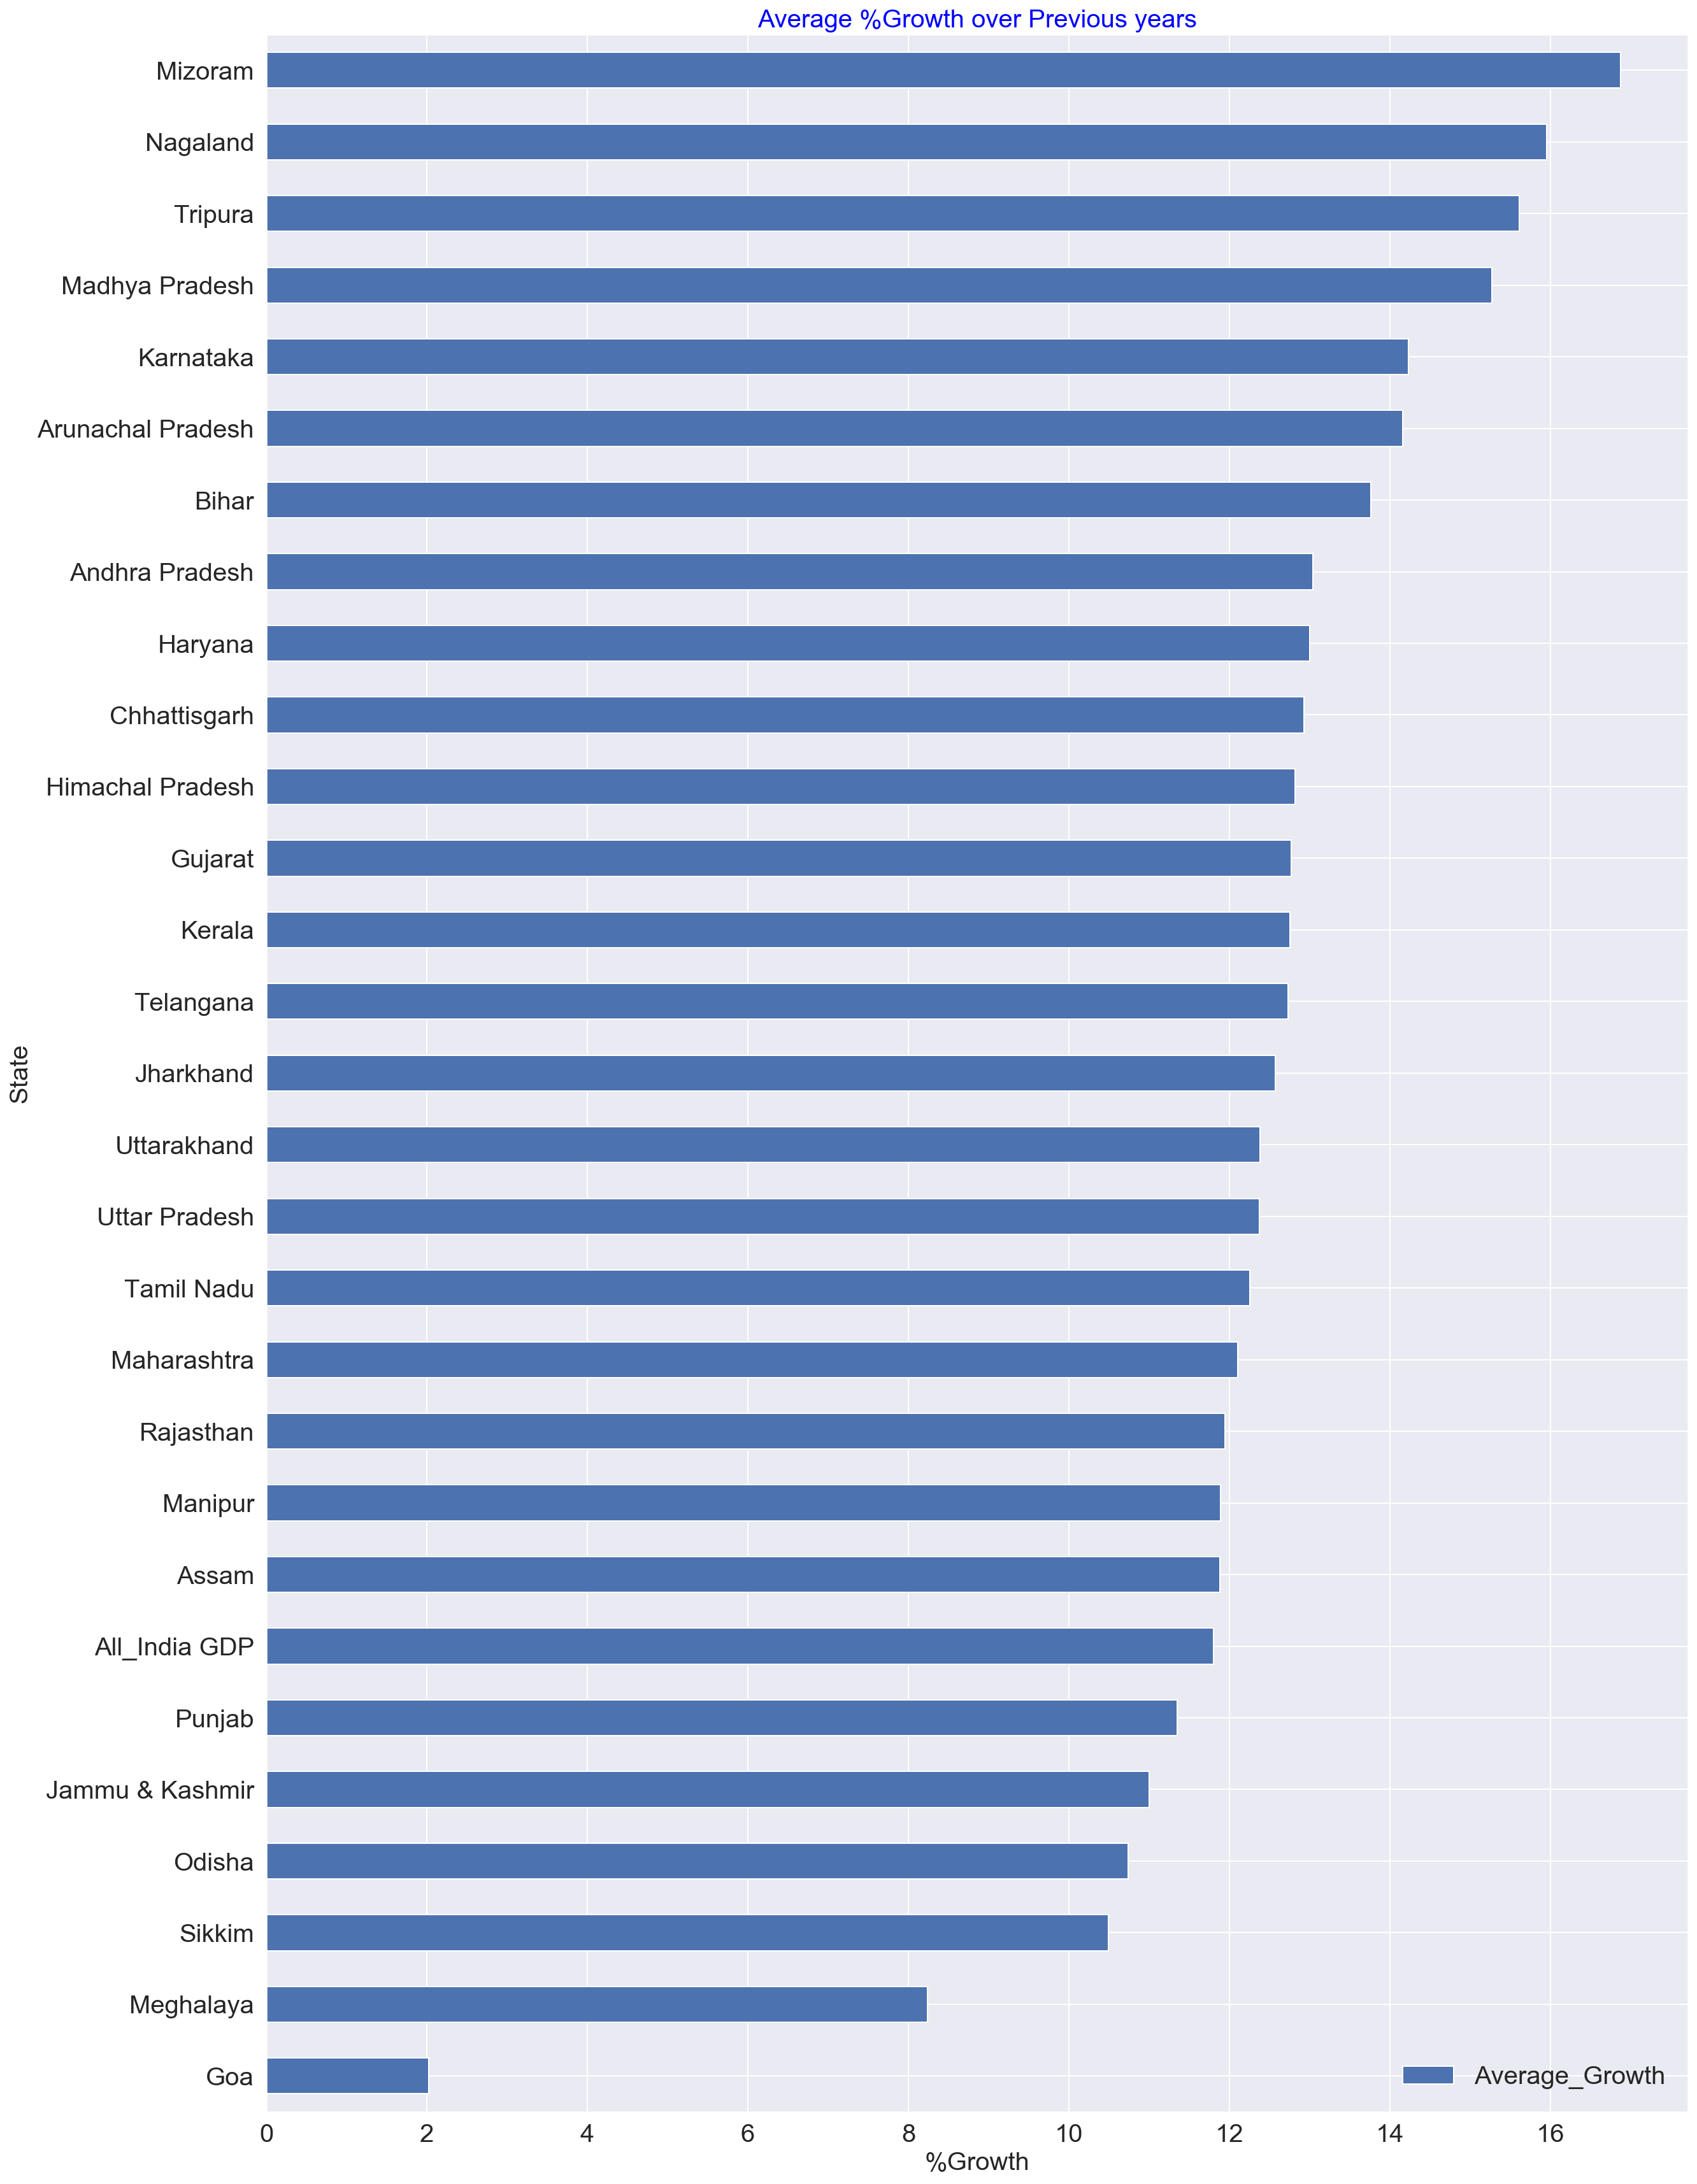

In [28]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
growth_transpose_df['Average_Growth'].sort_values(ascending=True).plot(kind='barh',
          figsize=(20,30));
plt.title('Average %Growth over Previous years',color='blue')
plt.ylabel('State')
plt.xlabel('%Growth');
plt.legend();
plt.savefig('./images/StateAverageGrowth.png')

## Observatiosn from Average Growth Percentage over previous years:
- Please note that data of growth percentage is missing for State of Mizoram, Nagaland and Tripura, Himachal Pradesh, Maharasthra, Rajasthan, Manipur, Punjab for year 2015-16. 
- With the data provided,
    - State of Mizoram(16.87%) has highest average growth percentage rate over previous years followed by Nagaland(15.95%), Tripura(15.61%)
    - State of Goa(2.02%) has the lowest average growth percentage followed by Meghalaya(8.24%) second lowest and Sikkim(10.49%) third lowest in average growth percentage over previous years 
    - All India GDP average growth rate is 11.87%
    - Average Growth Rate of my home state Haryana(13.0%) is more than All India GDP average growth rate. There was a sudden decrease in growth rate from 15.45% in 2013-14 to 9.18% in 2014-15. But after that there has been increase in growth rate with 10.91% in 2015-16 to 12.82% in 2016-17. This has resulted in average growth rate of 13% and is ranked as 9th highest in average growth Percentage over previous years

# Plot the total GDP of the states for the year 2015-16<a id='Total GDP 2015-16 I-A'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

Lets look at dataframe of GSDP

In [29]:
gsdp_df

Duration  Andhra Pradesh  Arunachal Pradesh     Assam     Bihar  \
0  2011-12        379402.0            11063.0  143175.0  247144.0   
1  2012-13        411404.0            12547.0  156864.0  282368.0   
2  2013-14        464272.0            14602.0  177745.0  317101.0   
3  2014-15        526468.0            16761.0  198098.0  373920.0   
4  2015-16        609934.0            18784.0  224234.0  413503.0   
5  2016-17        699307.0                NaN       NaN       NaN   

   Chhattisgarh      Goa   Gujarat   Haryana  Himachal Pradesh  \
0      158074.0  42367.0  615606.0  297539.0           72720.0   
1      177511.0  38120.0  724495.0  347032.0           82820.0   
2      206690.0  35921.0  807623.0  400662.0           94764.0   
3      234982.0  40633.0  895027.0  437462.0          104369.0   
4      260776.0  45002.0  994316.0  485184.0               NaN   
5      290140.0      NaN       NaN  547396.0               NaN   

   Jammu & Kashmir  Jharkhand  Karnataka    Kerala  Madhya Pradesh  \
0          78254.0   150918.0   603778.0  364048.0        315561.0   
1          87105.0   174724.0   691700.0  412313.0        380924.0   
2          95893.0   188567.0   817886.0  465041.0        437737.0   
3         100404.0   217107.0   921788.0  526002.0        481982.0   
4         118387.0   241955.0  1027068.0  588337.0        543975.0   
5              NaN        NaN        NaN       NaN        640484.0   

   Maharashtra  Manipur  Meghalaya  Mizoram  Nagaland    Odisha    Punjab  \
0    1272967.0  12915.0    19918.0   7259.0   11839.0  227872.0  266628.0   
1    1448466.0  13748.0    21872.0   8362.0   13619.0  258275.0  297734.0   
2    1647506.0  16198.0    22938.0  10293.0   16612.0  291709.0  334714.0   
3    1792122.0  18043.0    24408.0  11559.0   18414.0  321971.0  368011.0   
4          NaN      NaN    26745.0      NaN       NaN  341887.0       NaN   
5          NaN      NaN    29567.0      NaN       NaN  378991.0       NaN   

   Rajasthan   Sikkim  Tamil Nadu  Telangana  Tripura  Uttar Pradesh  \
0   436465.0  11165.0    751485.0   359433.0  19208.0       724049.0   
1   494004.0  12338.0    855481.0   401493.0  21663.0       822903.0   
2   549701.0  13862.0    971090.0   452186.0  25593.0       944146.0   
3   612194.0  15209.0   1092564.0   511178.0  29667.0      1043371.0   
4        NaN  16637.0   1212668.0   575631.0      NaN      1153795.0   
5        NaN      NaN   1338766.0   654294.0      NaN            NaN   

   Uttarakhand  All_India GDP  
0     115523.0      8736039.0  
1     131835.0      9946636.0  
2     149817.0     11236635.0  
3     161985.0     12433749.0  
4     184091.0     13675331.0  
5          NaN     15251028.0

Filter out the rows with duration 2015-16

In [30]:
gsdp_copy_df=gsdp_df.copy()
gsdp_copy_df=gsdp_copy_df[gsdp_copy_df['Duration']=='2015-16']
gsdp_copy_df

Duration  Andhra Pradesh  Arunachal Pradesh     Assam     Bihar  \
4  2015-16        609934.0            18784.0  224234.0  413503.0   

   Chhattisgarh      Goa   Gujarat   Haryana  Himachal Pradesh  \
4      260776.0  45002.0  994316.0  485184.0               NaN   

   Jammu & Kashmir  Jharkhand  Karnataka    Kerala  Madhya Pradesh  \
4         118387.0   241955.0  1027068.0  588337.0        543975.0   

   Maharashtra  Manipur  Meghalaya  Mizoram  Nagaland    Odisha  Punjab  \
4          NaN      NaN    26745.0      NaN       NaN  341887.0     NaN   

   Rajasthan   Sikkim  Tamil Nadu  Telangana  Tripura  Uttar Pradesh  \
4        NaN  16637.0   1212668.0   575631.0      NaN      1153795.0   

   Uttarakhand  All_India GDP  
4     184091.0     13675331.0

Transpose growth data frame

In [31]:
gsdp_transpose_df = gsdp_copy_df.T
gsdp_transpose_df.rename(columns={4:'2015-16'},inplace=True)
gsdp_transpose_df = gsdp_transpose_df[1:].sort_values(by='2015-16',ascending=False)
gsdp_transpose_df

2015-16
All_India GDP      1.36753e+07
Tamil Nadu         1.21267e+06
Uttar Pradesh       1.1538e+06
Karnataka          1.02707e+06
Gujarat                 994316
Andhra Pradesh          609934
Kerala                  588337
Telangana               575631
Madhya Pradesh          543975
Haryana                 485184
Bihar                   413503
Odisha                  341887
Chhattisgarh            260776
Jharkhand               241955
Assam                   224234
Uttarakhand             184091
Jammu & Kashmir         118387
Goa                      45002
Meghalaya                26745
Arunachal Pradesh        18784
Sikkim                   16637
Himachal Pradesh           NaN
Maharashtra                NaN
Manipur                    NaN
Mizoram                    NaN
Nagaland                   NaN
Punjab                     NaN
Rajasthan                  NaN
Tripura                    NaN

### Plot GSDP for all states

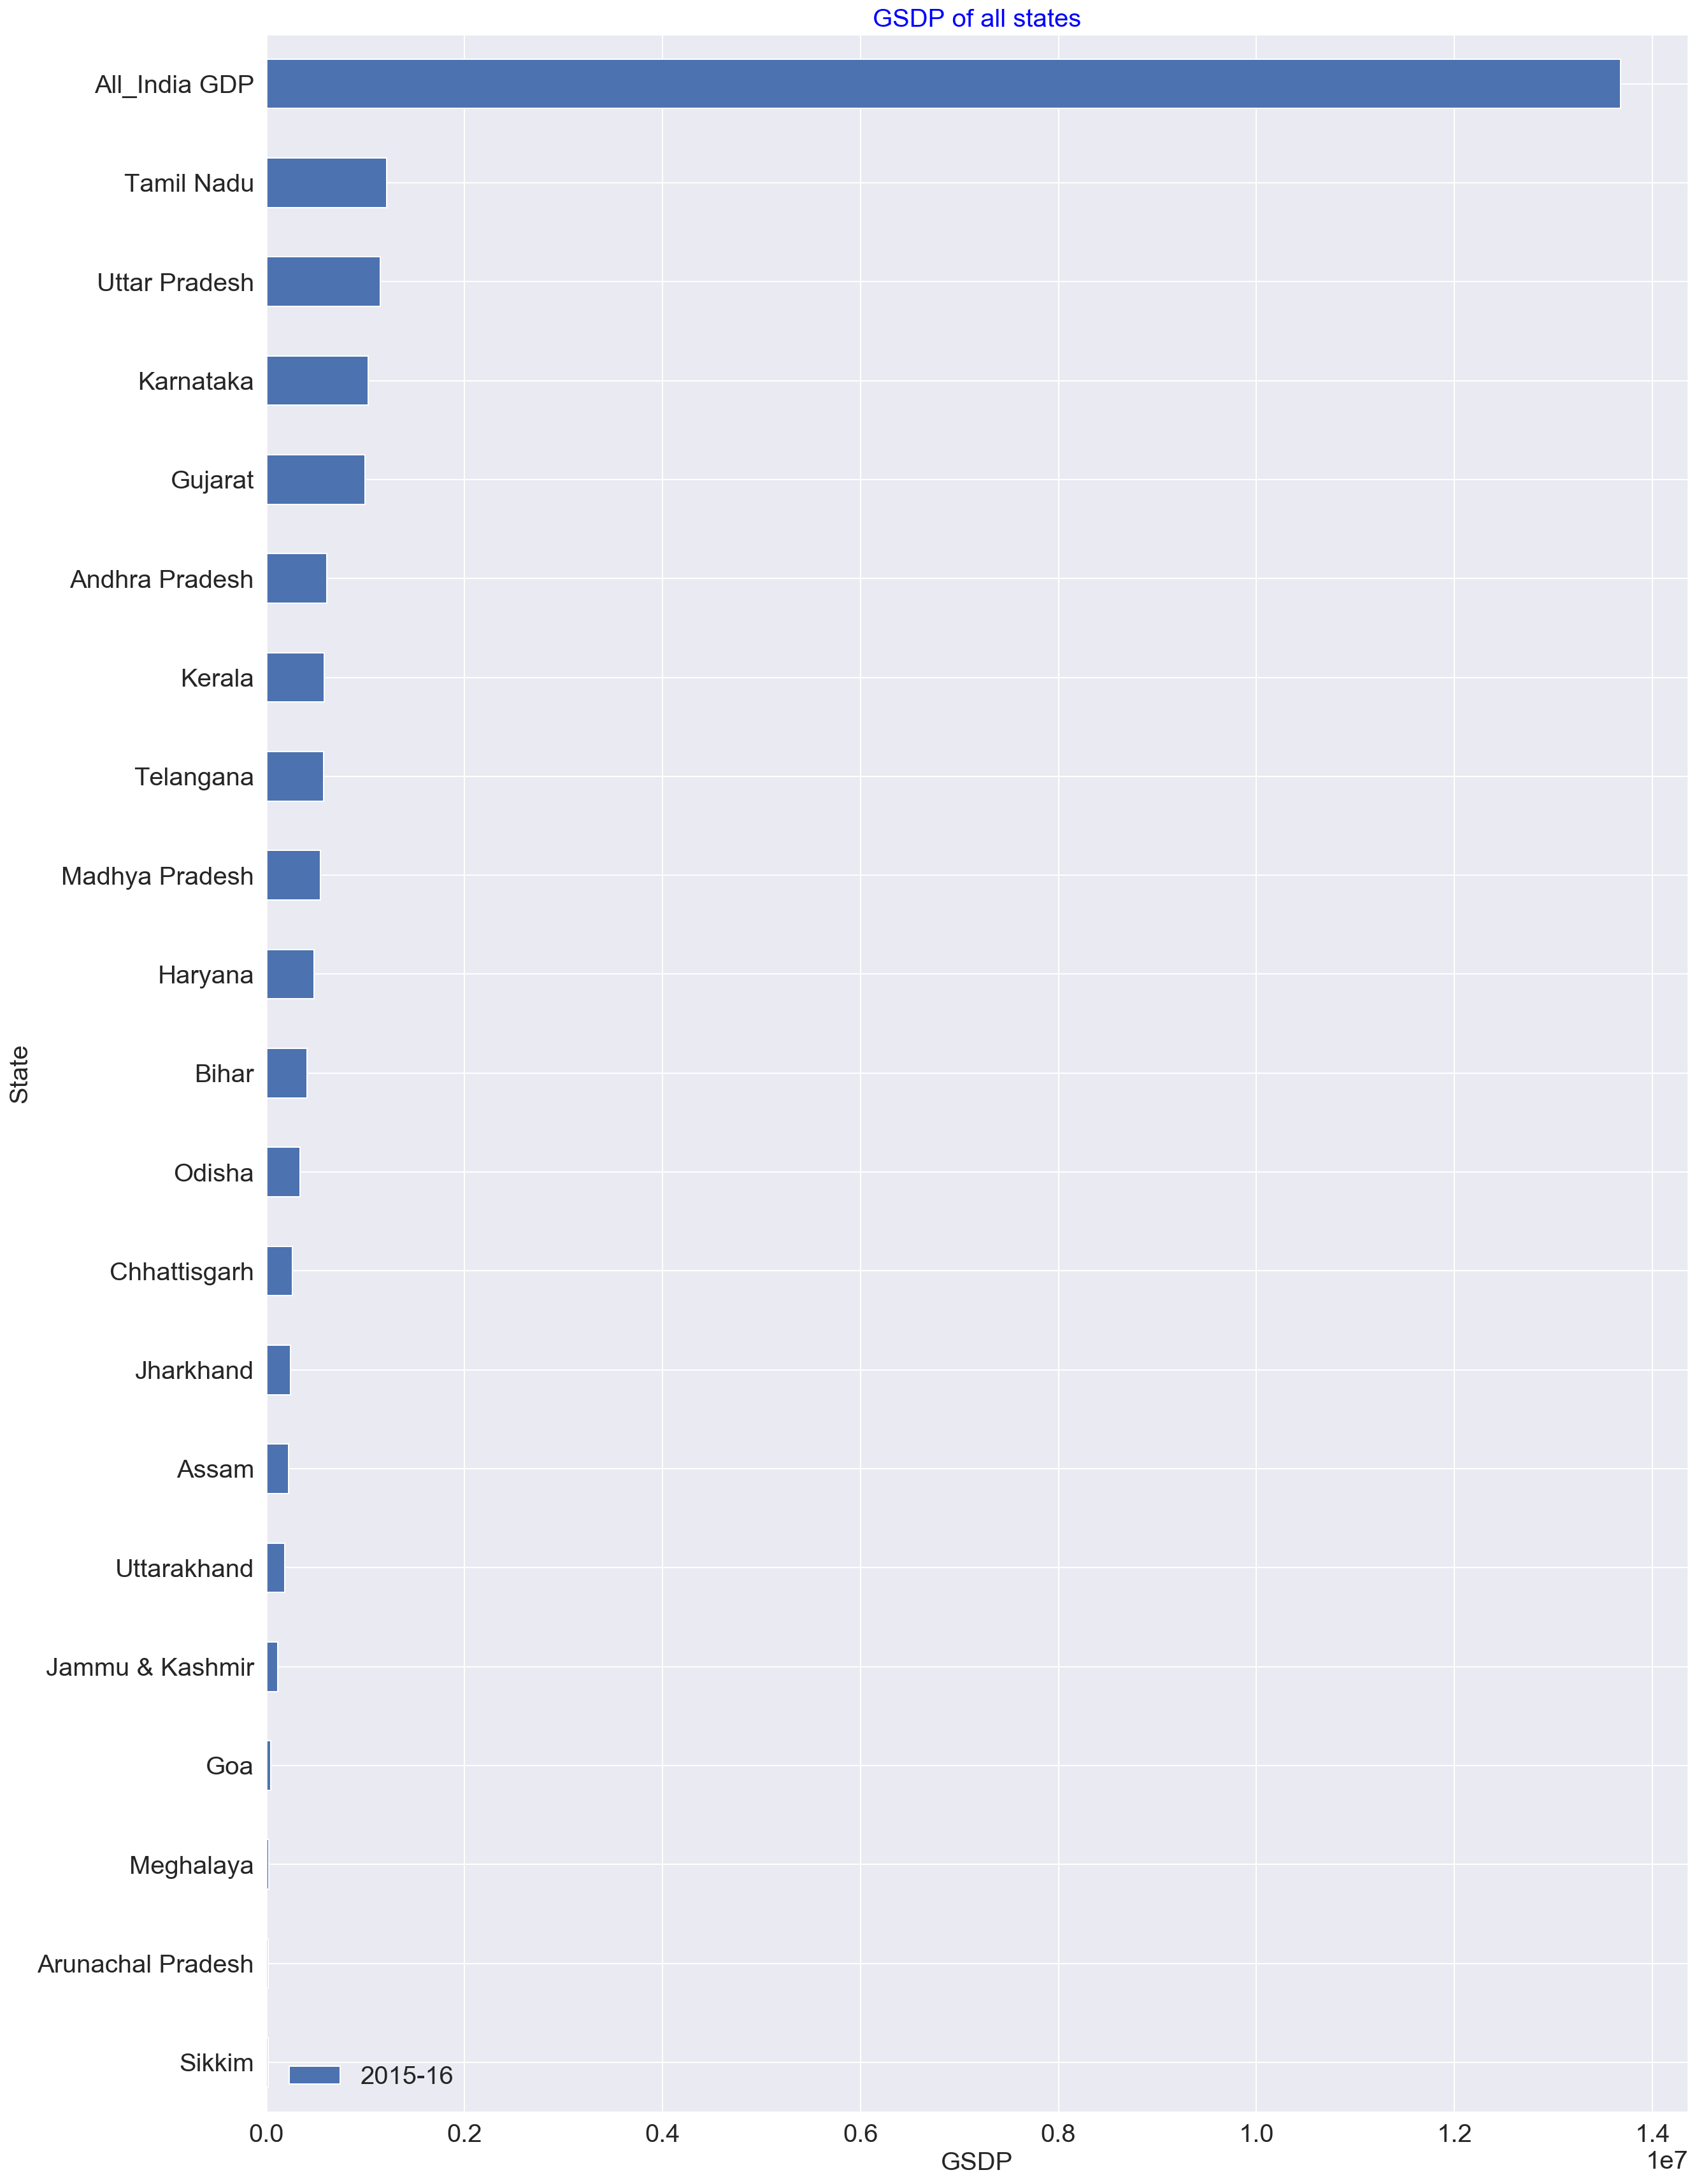

In [32]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
gsdp_transpose_df.dropna().sort_values(by='2015-16',ascending=True).plot(kind='barh',
          figsize=(20,30));
plt.title('GSDP of all states',color='blue')
plt.ylabel('State')
plt.xlabel('GSDP');

### Above plot has GSDP of All India as nation as well. Ignoring that entry from the dataframe and plotting again to get clear picture of GSDP of all states

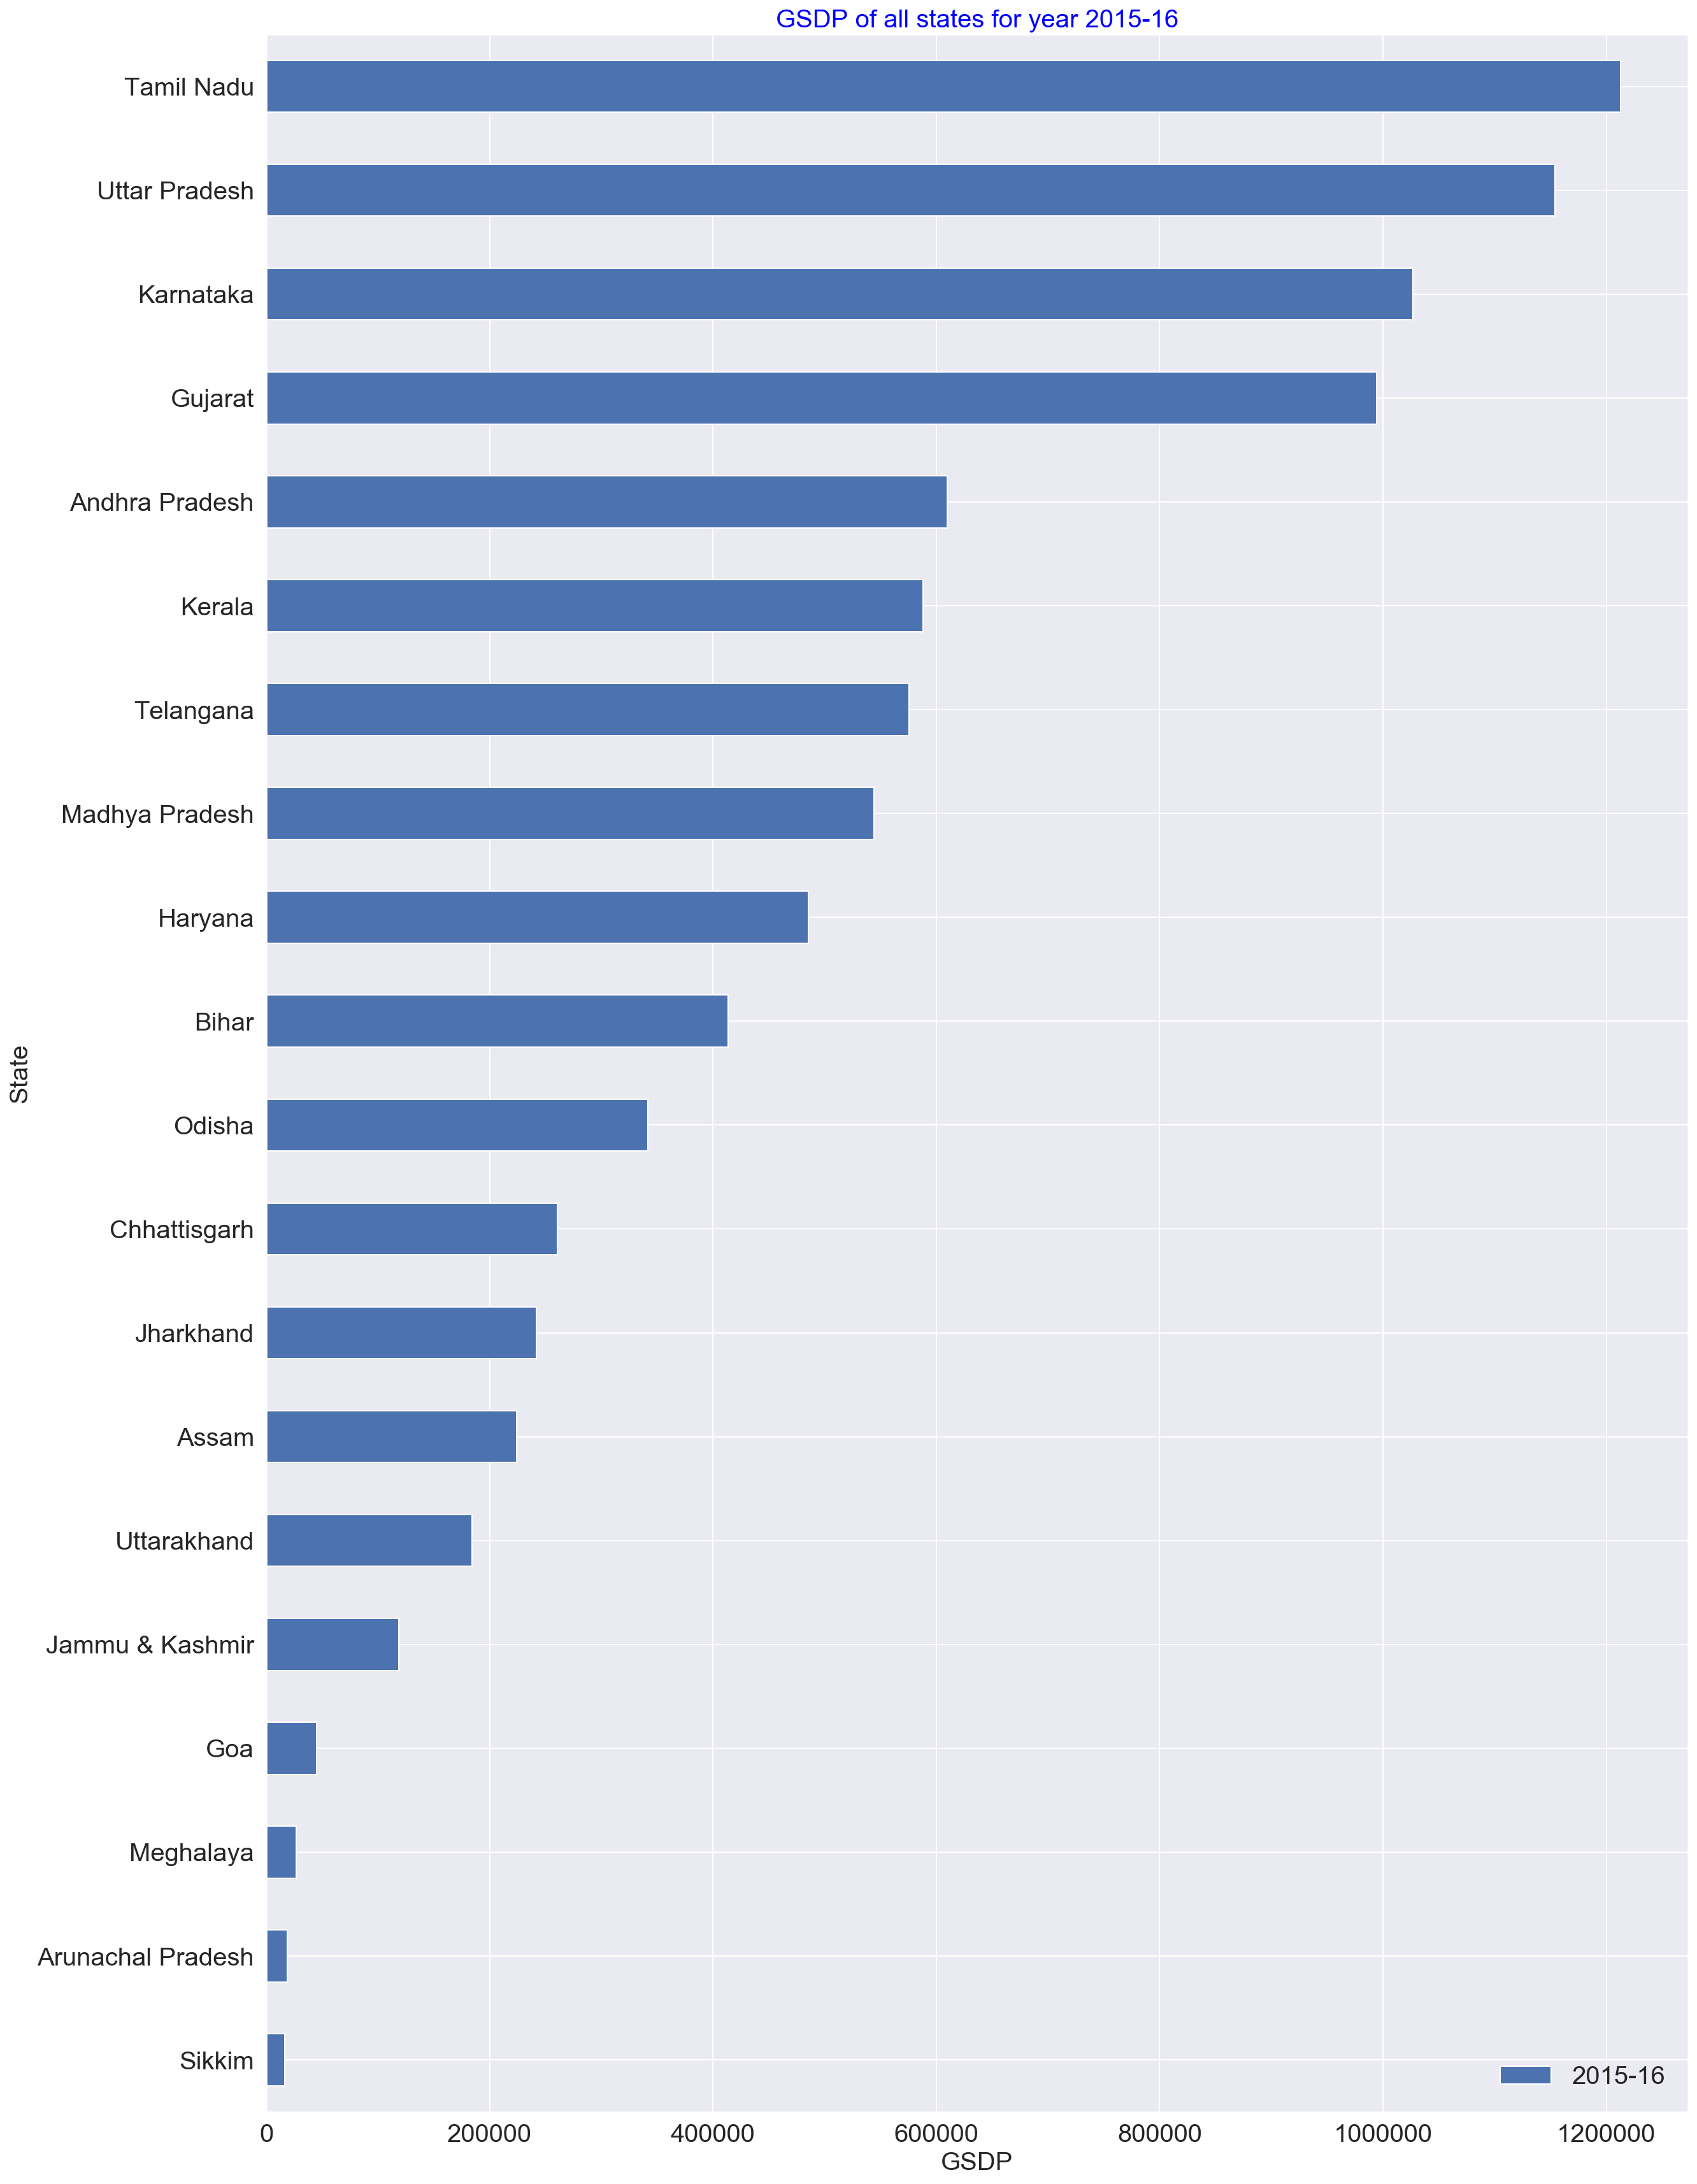

In [33]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
gsdp_transpose_df[1:].dropna().sort_values(by='2015-16',ascending=True).plot(kind='barh',
          figsize=(20,30));
plt.title('GSDP of all states for year 2015-16',color='blue')
plt.ylabel('State')
plt.xlabel('GSDP');
plt.savefig('./images/GSDPOfAllStates.png')

### Observations from above Plot
For the year of 2015-16:
- GSDP of state Tamil Nadu(1212668.0) is highest followed by Uttar Pradesh(1153795.0) and then Karnataka(1027068.0)
- GSDP of state Sikkim(16637) is the lowest followed by Arunachal Pradesh(18784) as 2nd lowest and Meghalaya(26745) as 3rd lowest
- Government needs to focus on increasing GSDP of these lowest ranking states. Measure for growth improvement needs to be brought in for these states

## Extra Plotting - GSDP for year 2014-15 for presentation purposes

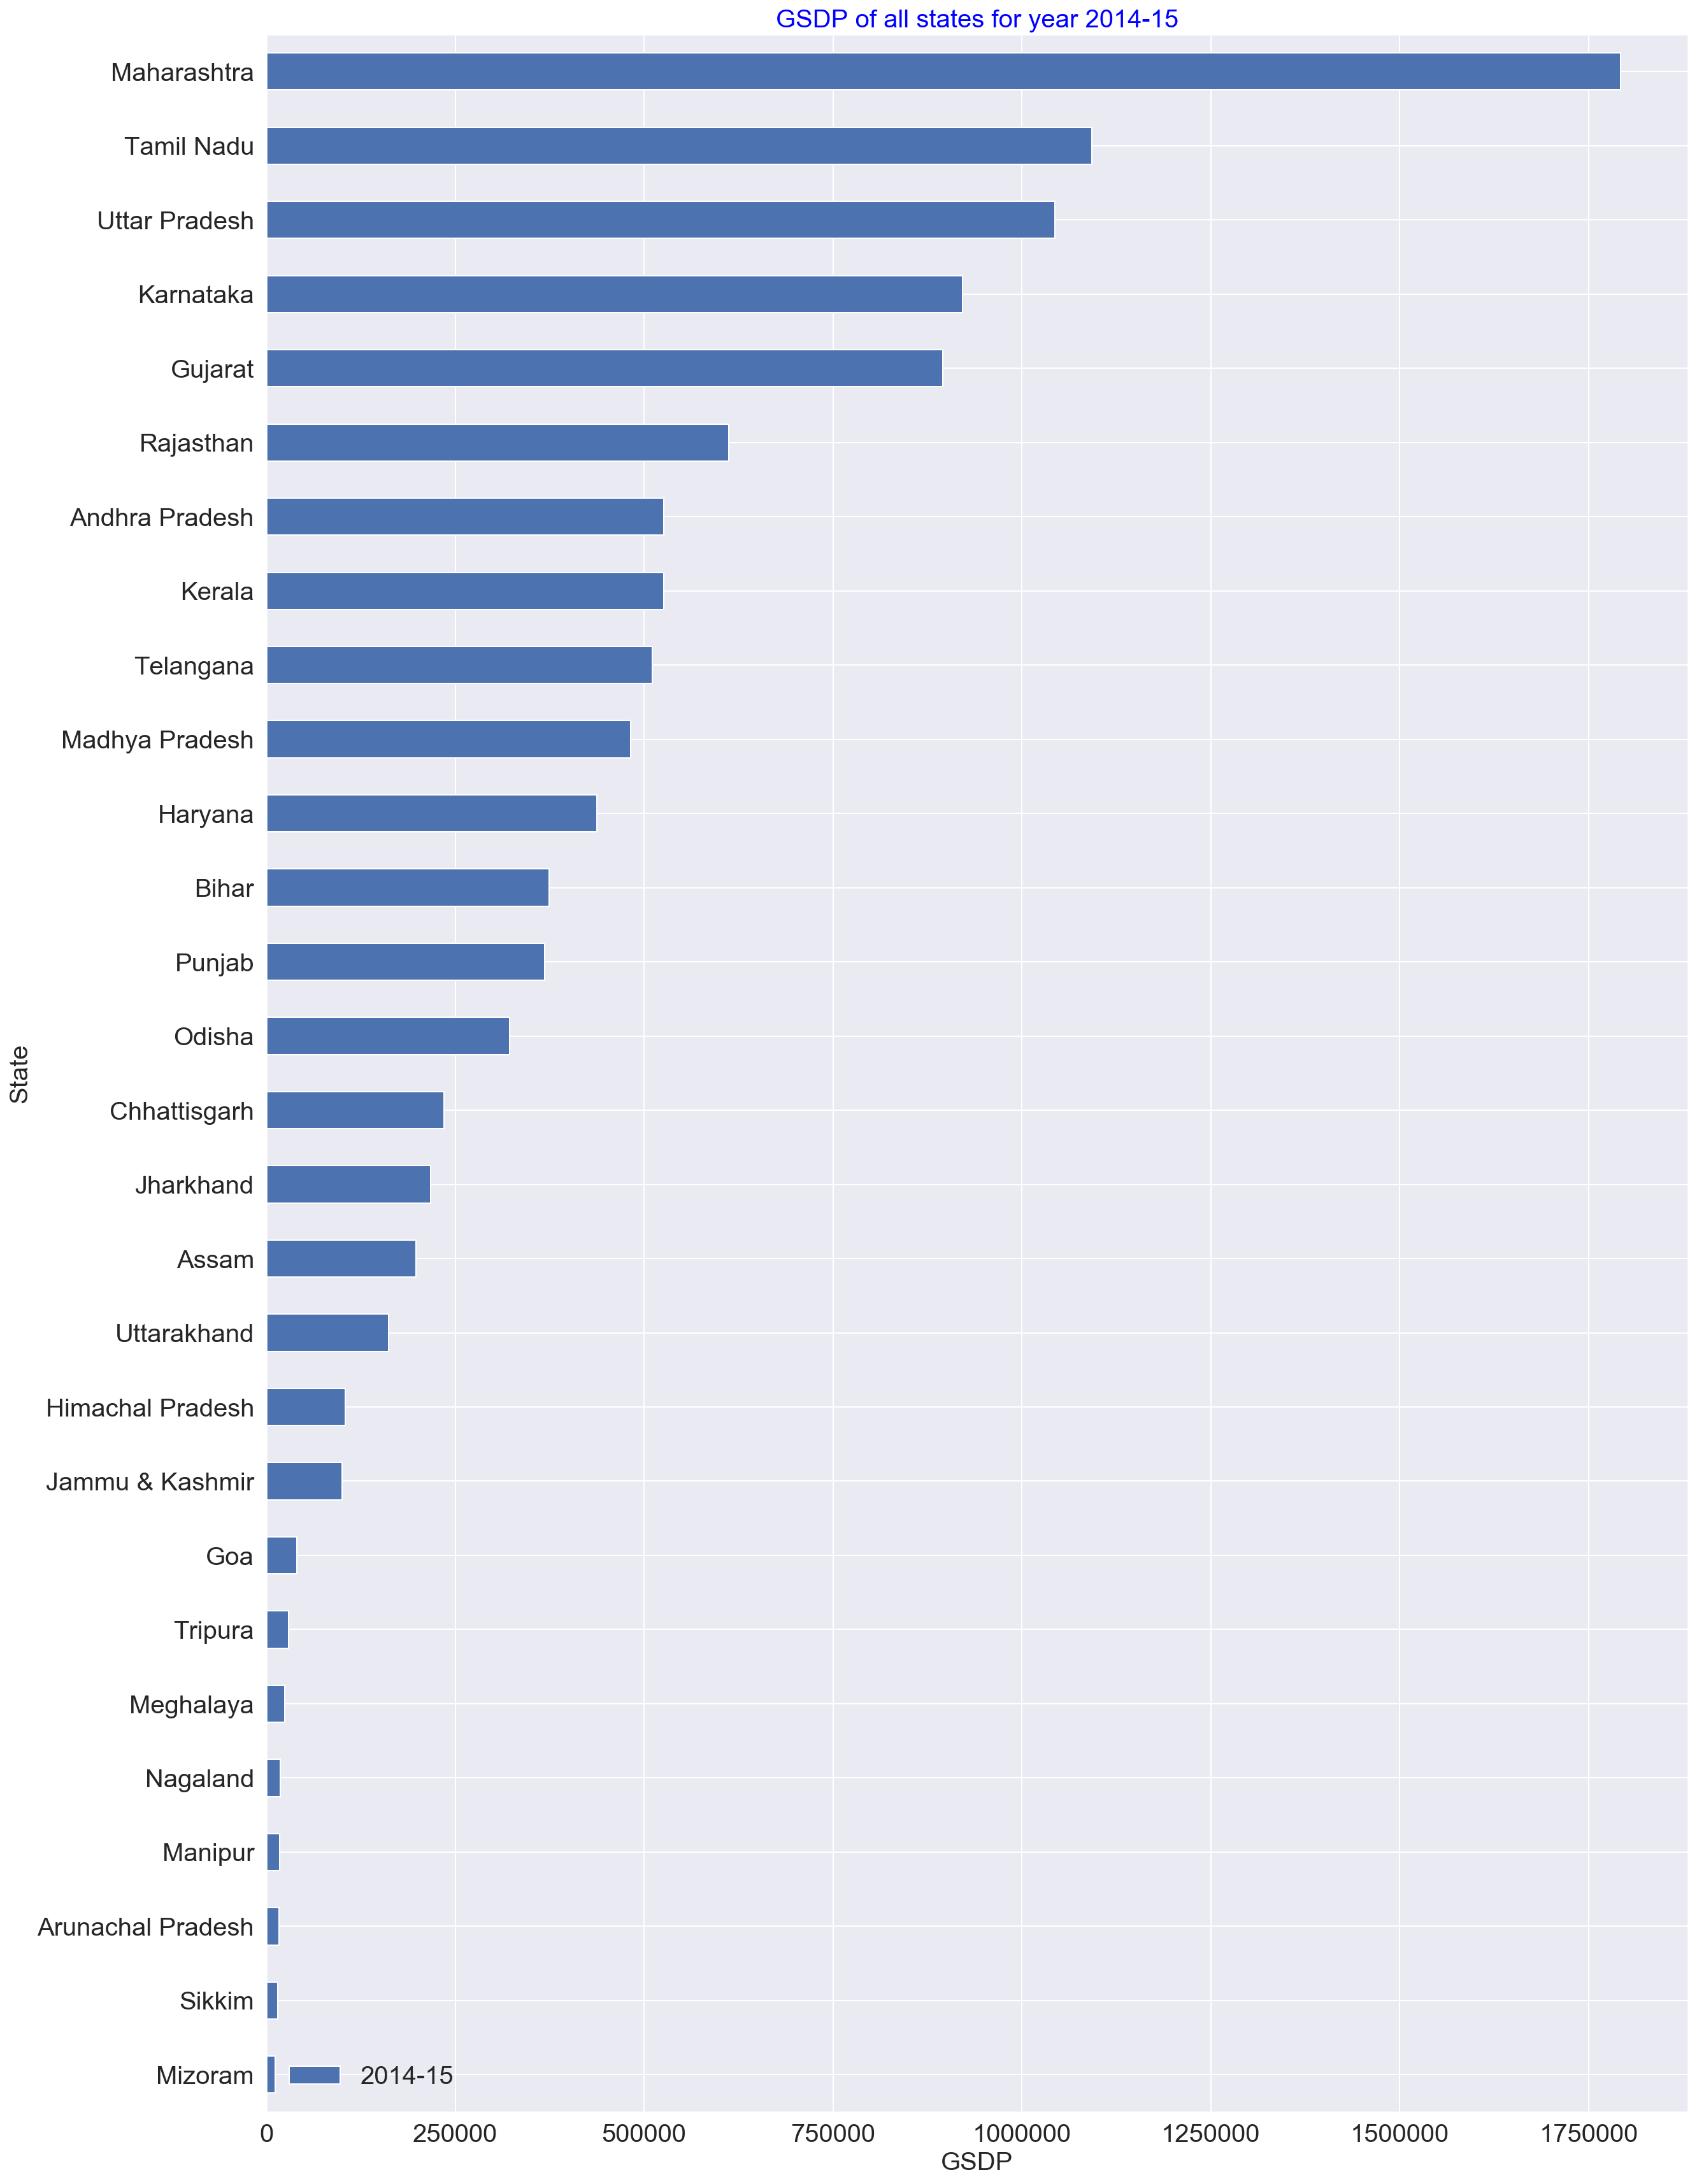

In [34]:
gsdp_copy_df1=gsdp_df.copy()
gsdp_copy_df1=gsdp_copy_df1[gsdp_copy_df1['Duration']=='2014-15']
gsdp_transpose_df1 = gsdp_copy_df1.T
gsdp_transpose_df1.rename(columns={3:'2014-15'},inplace=True)
gsdp_transpose_df1 = gsdp_transpose_df1[1:].sort_values(by='2014-15',ascending=False)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
gsdp_transpose_df1[1:].dropna().sort_values(by='2014-15',ascending=True).plot(kind='barh',
          figsize=(20,30));
plt.title('GSDP of all states for year 2014-15',color='blue')
plt.ylabel('State')
plt.xlabel('GSDP');
plt.savefig('./images/GSDPOfAllStates_2014-15.png')

### Observations from above Plot
For the year of 2014-15:
- GSDP of state Maharashtra(1792122.0) is highest followed by Tamil Nadu(1092564.0) and then Uttar Pradesh(1043371.0)
- GSDP of state Mizoram (11559.0) is the lowest followed by Sikkim(15209.0) as 2nd lowest and Arunachal Pradesh(16761.0) as 3rd lowest
- Government needs to focus on increasing GSDP of these lowest ranking states. Measure for growth improvement needs to be brought in for these states

# Part I-B <a id='Part I-B'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## Load all Files <a id='Load all File I-B'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [35]:
path = './dataset/states/*.csv'

all_files = glob.glob(path)
files_list=[]
AllStates_datacheck = pd.DataFrame(index=['Missingness','Duplicates'])
States_data_list = []
for filename in all_files:
    ##find the state name from the file name using split function
    state = filename.split('/')[-1].split('_cur')[0].split('-')[1]
    state_df = pd.read_csv(filename,index_col=None,header=0,encoding = 'unicode_escape')
    
    ## As per the given instructions - for Part - IB - Also, perform the analysis only for the duration 2014-15. 
    state_df = state_df[['S.No.','Item','2014-15']]
    
    # As per the assignment - percentage contribution of the primary, secondary and tertiary sectors 
    ## as a percentage of the total GDP for all the states.
    ## based on this drop the sub-sub sectors
    
    state_df.drop(state_df.loc[state_df['S.No.'].isin(['1.1','1.2','1.3','1.4','6.1','6.2',
                                                   '7.1','7.2','7.3','7.4','7.5','7.6','7.7'])].index,inplace=True)
    
    
    ## with given formula to calculate Total GDP of State
    ## Total GSVA = (Primary + Secondary + Tertiary) contributions
    ## GSDP = Total GSVA + Taxes on Products - Subsidies on Products
    ## Since these columns - Total GSVA, Taxes on Product, Subsidies might be needed for ananlysis later
    ## so still keeping these columns in dataframe
    #ignore --> state_df.drop(state_df.loc[state_df['S.No.'].isin(['12','13','14','16'])].index,inplace=True)

    
    ##Transpose the DataFrame
    state_df = state_df.T
    
    ##take the row at index location1 and save it in header variable
    new_header = state_df.iloc[1]
    
    ## select only the row with only relevant values by removing unwanted rows like S.No. etc
    state_df = state_df[2:]
    
    ## set the columns of this dataframe using the header variable
    state_df.columns = new_header
    
    ## Add new column as state name in dataframe
    state_df['State'] = state
    
    ##reshuffle columns and bring State column in front
    col_list = list(state_df.columns)
    col_list = col_list[-1:] + col_list[:-1]
    
    state_df = state_df[col_list]
    
    ## Append the state's dataframe in the list
    States_data_list.append(state_df)

    ## This piece of code will check for missingness and duplicates in each state dataframe
    AllStates_datacheck[state]=[state_df.isnull().sum().sum(),state_df.duplicated().sum()]


## When all files are read and the data is available in final list
## then load that list in dataframe using concatenate function of pandas
all_states_df = pd.concat(States_data_list,axis=0,ignore_index=True)
all_states_df
    

Item              State Agriculture, forestry and fishing  \
0             Rajasthan                          15044394   
1             Telangana                           7591501   
2                Odisha                           6422978   
3                 Assam                           3855548   
4                 Bihar                           7951890   
5              Nagaland                            607897   
6                   Goa                            308507   
7                Kerala                           5930617   
8        Madhya_Pradesh                          16235647   
9               Mizoram                            217010   
10         Chhattisgarh                           3948847   
11    Arunachal_Pradesh                            686117   
12              Manipur                            383140   
13              Tripura                            799825   
14            Meghalaya                            366521   
15               Punjab                           9285716   
16              Haryana                       8.01524e+06   
17        Uttar_Pradesh                          25097754   
18       Andhra_Pradesh                          14819416   
19                Delhi                            250568   
20           Tamil_Nadu                          13064238   
21               Sikkim                            137447   
22           Puducherry                            113156   
23          Uttarakhand                       1.60142e+06   
24            Karnataka                          11219422   
25        Jammu_Kashmir                           1586705   
26              Gujarat                         1.377e+07   
27           Chandigarh                             16233   
28          Maharashtra                          16475655   
29     Himachal_Pradesh                           1514981   
30            Jharkhand                           3211065   

Item Mining and quarrying      Primary Manufacturing  \
0                 4069385     19113780       6552580   
1                 1541853      9133354       6353711   
2                 2586328      9009306       5754229   
3                 1471149      5326697       2002936   
4                   68107      8019997       2189965   
5                    8280       616178         18346   
6                    3622       312129       1177608   
7                  558824      6489442       4273567   
8                 1618373     17854020       4368833   
9                    8588       225598          8479   
10                2451970      6400817       4370593   
11                  30842       716959         26120   
12                    NaN       383140         49501   
13                 142391       942216        228625   
14                  84529       451050        433213   
15                  10354      9296070       4790341   
16                  25186  8.04042e+06   7.75692e+06   
17                 901501     25999255      12261649   
18                1484300     16303716       4672266   
19                 963777      1214345       2749307   
20                 265536     13329774      18914794   
21                   1329       138776        550697   
22                  33272       146428        618297   
23                 244549  1.84597e+06   5.86625e+06   
24                 846882     12066304      12953843   
25                  33621      1620326        893207   
26            2.11722e+06  1.58872e+07   2.40875e+07   
27                    179        16412        149631   
28                5282727     21758383      33660294   
29                  33385      1548366       2543637   
30                2037289      5248354       4114148   

Item Electricity, gas, water supply & other utility services Construction  \
0                                               1122888           5353326   
1                                                716266           2854024   
2                      

### Check for missing and duplicate value corresponding to each state <a id='Check Missing Values I-B'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [36]:
AllStates_datacheck

Rajasthan  Telangana  Odisha  Assam  Bihar  Nagaland  Goa  \
Missingness          0          0       0      0      0         0    0   
Duplicates           0          0       0      0      0         0    0   

             Kerala  Madhya_Pradesh  Mizoram  Chhattisgarh  Arunachal_Pradesh  \
Missingness       0               0        0             0                  0   
Duplicates        0               0        0             0                  0   

             Manipur  Tripura  Meghalaya  Punjab  Haryana  Uttar_Pradesh  \
Missingness        1        0          0       0        0              0   
Duplicates         0        0          0       0        0              0   

             Andhra_Pradesh  Delhi  Tamil_Nadu  Sikkim  Puducherry  \
Missingness               0      0           0       0           0   
Duplicates                0      0           0       0           0   

             Uttarakhand  Karnataka  Jammu_Kashmir  Gujarat  Chandigarh  \
Missingness            0          0              0        0           0   
Duplicates             0          0              0        0           0   

             Maharashtra  Himachal_Pradesh  Jharkhand  
Missingness            0                 0          0  
Duplicates             0                 0          0

Above cell shows that only Manipur State has 1 missing value

## In above dataframe it can be seen that there are rows for Union Territoy as well <a id='Drop UTs I-B'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>
- Drop the Union Territory rows

In [37]:
### Drop UTs from the dataset
print('No of rows {0} and columns {1} before dropping UTs'.format(all_states_df.shape[0],all_states_df.shape[1]))
all_states_df.drop(all_states_df.loc[all_states_df['State'].isin(
    ['Delhi','Chandigarh','Puducherry'])].index,inplace=True)
print('No of rows {0} and columns {1} after dropping UTs'.format(all_states_df.shape[0],all_states_df.shape[1]))

No of rows 31 and columns 21 before dropping UTs
No of rows 28 and columns 21 after dropping UTs


## Sort by 'Per Capita GSDP (Rs.)' to see the top performing state

In [38]:
all_states_df.sort_values(by='Per Capita GSDP (Rs.)',ascending=False)

Item              State Agriculture, forestry and fishing  \
6                   Goa                            308507   
21               Sikkim                            137447   
16              Haryana                       8.01524e+06   
7                Kerala                           5930617   
23          Uttarakhand                       1.60142e+06   
28          Maharashtra                          16475655   
29     Himachal_Pradesh                           1514981   
20           Tamil_Nadu                          13064238   
24            Karnataka                          11219422   
26              Gujarat                         1.377e+07   
1             Telangana                           7591501   
15               Punjab                           9285716   
11    Arunachal_Pradesh                            686117   
18       Andhra_Pradesh                          14819416   
9               Mizoram                            217010   
5              Nagaland                            607897   
10         Chhattisgarh                           3948847   
0             Rajasthan                          15044394   
13              Tripura                            799825   
14            Meghalaya                            366521   
25        Jammu_Kashmir                           1586705   
2                Odisha                           6422978   
8        Madhya_Pradesh                          16235647   
30            Jharkhand                           3211065   
3                 Assam                           3855548   
12              Manipur                            383140   
17        Uttar_Pradesh                          25097754   
4                 Bihar                           7951890   

Item Mining and quarrying      Primary Manufacturing  \
6                    3622       312129       1177608   
21                   1329       138776        550697   
16                  25186  8.04042e+06   7.75692e+06   
7                  558824      6489442       4273567   
23                 244549  1.84597e+06   5.86625e+06   
28                5282727     21758383      33660294   
29                  33385      1548366       2543637   
20                 265536     13329774      18914794   
24                 846882     12066304      12953843   
26            2.11722e+06  1.58872e+07   2.40875e+07   
1                 1541853      9133354       6353711   
15                  10354      9296070       4790341   
11                  30842       716959         26120   
18                1484300     16303716       4672266   
9                    8588       225598          8479   
5                    8280       616178         18346   
10                2451970      6400817       4370593   
0                 4069385     19113780       6552580   
13                 142391       942216        228625   
14                  84529       451050        433213   
25                  33621      1620326        893207   
2                 2586328      9009306       5754229   
8                 1618373     17854020       4368833   
30                2037289      5248354       4114148   
3                 1471149      5326697       2002936   
12                    NaN       383140         49501   
17                 901501     25999255      12261649   
4                   68107      8019997       2189965   

Item Electricity, gas, water supply & other utility services Construction  \
6                                                204110            165819   
21                                               212499             82058   
16                                          1.10192e+06       3.70257e+06   
7                                                482470           7314003   
23                                               433880       1.34273e+06   
28                                              4334702           9450211   
29                                               767268           

## Plot GDP per Capita for all States <a id='GDP per Capita All States I-B'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

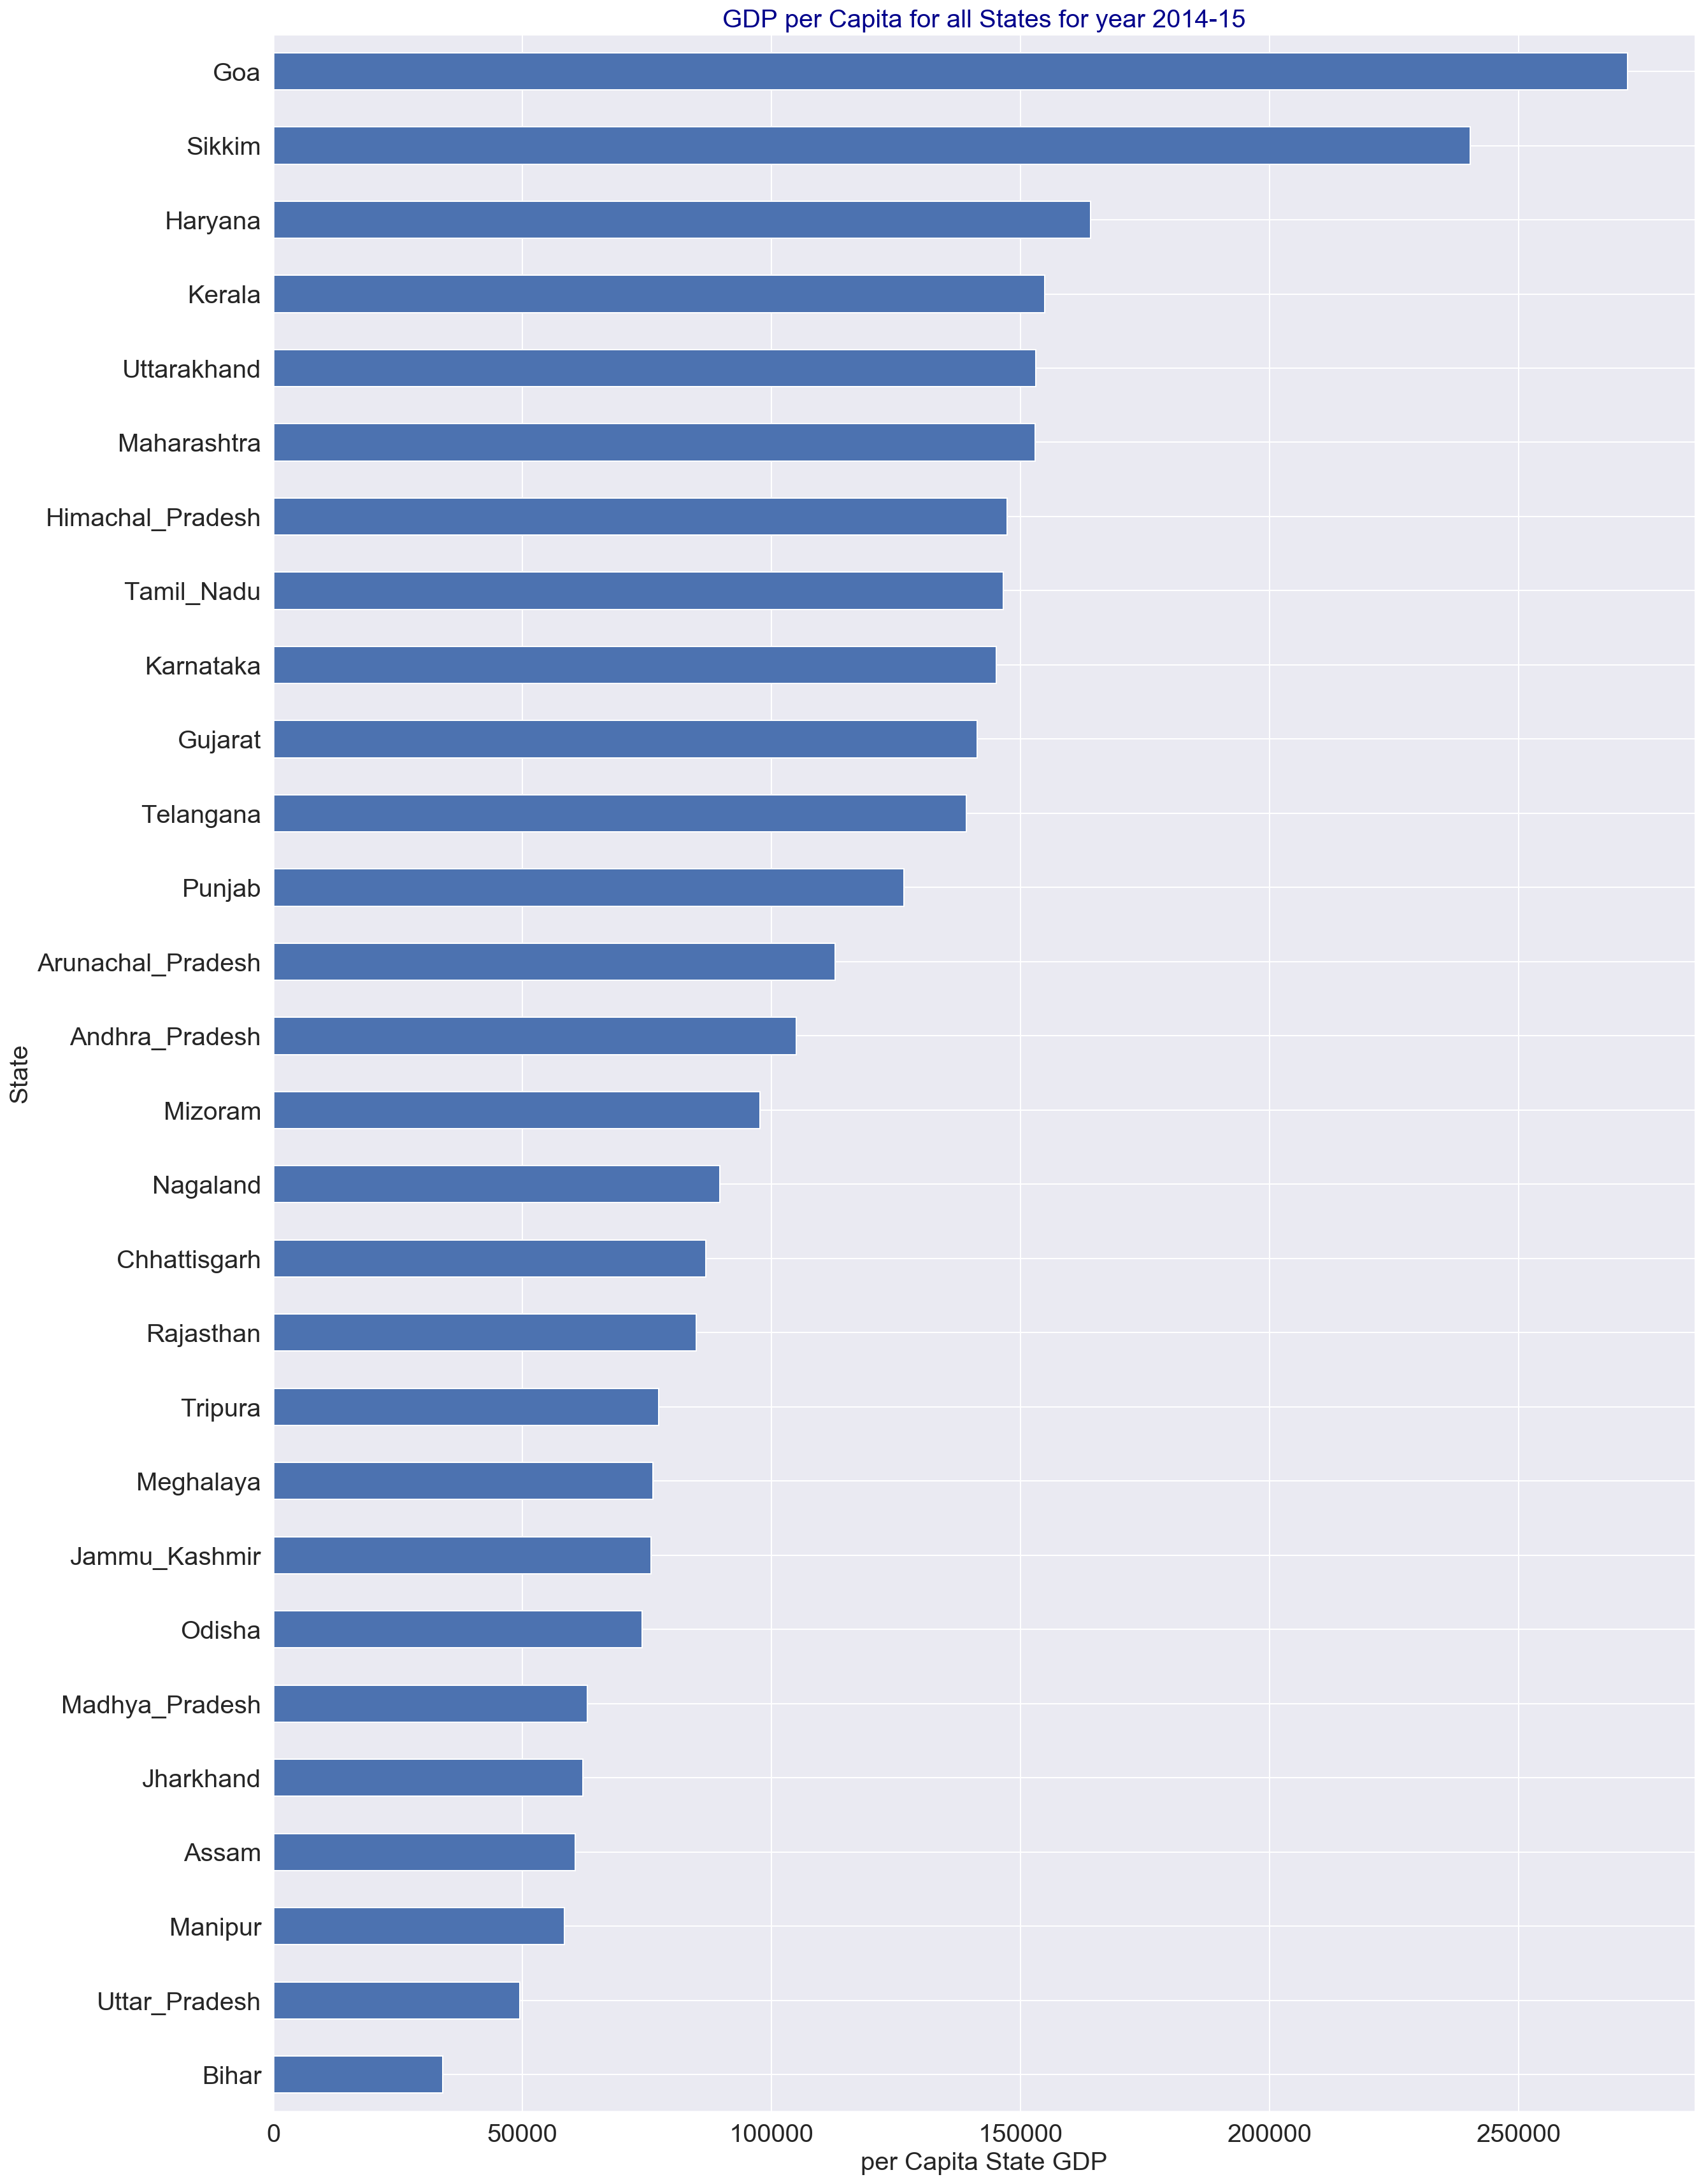

In [39]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.title('GDP per Capita for all States for year 2014-15',color='darkblue')
plt.xlabel('per Capita State GDP')
plt.ylabel('State')
all_states_df.set_index('State')['Per Capita GSDP (Rs.)'].sort_values().plot(kind='barh',figsize=(20,30));
plt.savefig('./images/GDPPerCapitaOfAllStates.png')


## Observations from above plot
- Data plotted is for duration 2014-15 as specified in assignment
- There is only one missing value for State Manipur for 'Mining and quarrying' section

- Goa(271793) has the highest per Capita GDP in Rs, followed by Sikkim(240274) and Haryana(164077), Kerala(154778) and Uttarakhand(153076)

- Bihar(33954) has the lowest per Capita GDP in Rs , followed by Uttar Pradesh(49450), Manipur(58442), Assam(60621) and Jharkhand(62091) in that order.

- As from previous plot, even though Sikkim has 2nd lowest GSDP, it has the 2nd highest GDP per Capita

- GSDP of Maharashtra is highest for year 2014-15 but GDP per Capita for this state is 6th highest

## Find the ratio of the highest per capita GDP to the lowest per capita GDP. <a id='Ratio I-B'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [40]:
df1 = all_states_df.sort_values(by='Per Capita GSDP (Rs.)',ascending=False)
print('Highest per Capita GDP: {0}'.format(df1.iloc[0]['Per Capita GSDP (Rs.)']))
print('Lowest per Capita GDP: {0}'.format(df1.iloc[df1.shape[0]-1]['Per Capita GSDP (Rs.)']))
ratio = round(df1.iloc[0]['Per Capita GSDP (Rs.)']/df1.iloc[df1.shape[0]-1]['Per Capita GSDP (Rs.)'],2)
print('Ratio of highest per capita GDP to the lowest per capita GDP: {0}'.format(ratio))

Highest per Capita GDP: 271793
Lowest per Capita GDP: 33954
Ratio of highest per capita GDP to the lowest per capita GDP: 8.0


## Percentage Contribution of Primary, Secondary and Tertiary sectors in GDP of State <a id='Sectorwise Contribution I-B'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [41]:
all_states_df['Primary_Perc'] = ((all_states_df['Primary']/all_states_df['Gross State Domestic Product'])*100).astype(float).round(2)
all_states_df['Secondary_Perc'] = ((all_states_df['Secondary']/all_states_df['Gross State Domestic Product'])*100).astype(float).round(2)
all_states_df['Tertiary_Perc'] = ((all_states_df['Tertiary']/all_states_df['Gross State Domestic Product'])*100).astype(float).round(2)
all_states_df['Taxes_Perc'] = ((all_states_df['Taxes on Products']/all_states_df['Gross State Domestic Product'])*100).astype(float).round(2)
all_states_df['Subsidies_Perc'] = ((all_states_df['Subsidies on products']/all_states_df['Gross State Domestic Product'])*100).astype(float).round(2)
all_states_df['AllSectors_Perc'] = all_states_df['Primary_Perc'
                                                ] + all_states_df['Secondary_Perc'
                                                                 ] + all_states_df['Tertiary_Perc']
all_states_df

Item              State Agriculture, forestry and fishing  \
0             Rajasthan                          15044394   
1             Telangana                           7591501   
2                Odisha                           6422978   
3                 Assam                           3855548   
4                 Bihar                           7951890   
5              Nagaland                            607897   
6                   Goa                            308507   
7                Kerala                           5930617   
8        Madhya_Pradesh                          16235647   
9               Mizoram                            217010   
10         Chhattisgarh                           3948847   
11    Arunachal_Pradesh                            686117   
12              Manipur                            383140   
13              Tripura                            799825   
14            Meghalaya                            366521   
15               Punjab                           9285716   
16              Haryana                       8.01524e+06   
17        Uttar_Pradesh                          25097754   
18       Andhra_Pradesh                          14819416   
20           Tamil_Nadu                          13064238   
21               Sikkim                            137447   
23          Uttarakhand                       1.60142e+06   
24            Karnataka                          11219422   
25        Jammu_Kashmir                           1586705   
26              Gujarat                         1.377e+07   
28          Maharashtra                          16475655   
29     Himachal_Pradesh                           1514981   
30            Jharkhand                           3211065   

Item Mining and quarrying      Primary Manufacturing  \
0                 4069385     19113780       6552580   
1                 1541853      9133354       6353711   
2                 2586328      9009306       5754229   
3                 1471149      5326697       2002936   
4                   68107      8019997       2189965   
5                    8280       616178         18346   
6                    3622       312129       1177608   
7                  558824      6489442       4273567   
8                 1618373     17854020       4368833   
9                    8588       225598          8479   
10                2451970      6400817       4370593   
11                  30842       716959         26120   
12                    NaN       383140         49501   
13                 142391       942216        228625   
14                  84529       451050        433213   
15                  10354      9296070       4790341   
16                  25186  8.04042e+06   7.75692e+06   
17                 901501     25999255      12261649   
18                1484300     16303716       4672266   
20                 265536     13329774      18914794   
21                   1329       138776        550697   
23                 244549  1.84597e+06   5.86625e+06   
24                 846882     12066304      12953843   
25                  33621      1620326        893207   
26            2.11722e+06  1.58872e+07   2.40875e+07   
28                5282727     21758383      33660294   
29                  33385      1548366       2543637   
30                2037289      5248354       4114148   

Item Electricity, gas, water supply & other utility services Construction  \
0                                               1122888           5353326   
1                                                716266           2854024   
2                                                833067           2402396   
3                                                296587           1733568   
4                                                345168           3449763   
5                                                 37944            156072   
6                                                204110           

## Plot percentage contribution of sectors to GDP

In [42]:
sort_gsdp_df = all_states_df.sort_values(by='Gross State Domestic Product',ascending=True)
sort_gsdp_df.sort_values(by='Gross State Domestic Product',ascending=False)

Item              State Agriculture, forestry and fishing  \
28          Maharashtra                          16475655   
20           Tamil_Nadu                          13064238   
17        Uttar_Pradesh                          25097754   
24            Karnataka                          11219422   
26              Gujarat                         1.377e+07   
0             Rajasthan                          15044394   
18       Andhra_Pradesh                          14819416   
7                Kerala                           5930617   
1             Telangana                           7591501   
8        Madhya_Pradesh                          16235647   
16              Haryana                       8.01524e+06   
4                 Bihar                           7951890   
15               Punjab                           9285716   
2                Odisha                           6422978   
10         Chhattisgarh                           3948847   
30            Jharkhand                           3211065   
3                 Assam                           3855548   
23          Uttarakhand                       1.60142e+06   
29     Himachal_Pradesh                           1514981   
25        Jammu_Kashmir                           1586705   
6                   Goa                            308507   
13              Tripura                            799825   
14            Meghalaya                            366521   
5              Nagaland                            607897   
12              Manipur                            383140   
11    Arunachal_Pradesh                            686117   
21               Sikkim                            137447   
9               Mizoram                            217010   

Item Mining and quarrying      Primary Manufacturing  \
28                5282727     21758383      33660294   
20                 265536     13329774      18914794   
17                 901501     25999255      12261649   
24                 846882     12066304      12953843   
26            2.11722e+06  1.58872e+07   2.40875e+07   
0                 4069385     19113780       6552580   
18                1484300     16303716       4672266   
7                  558824      6489442       4273567   
1                 1541853      9133354       6353711   
8                 1618373     17854020       4368833   
16                  25186  8.04042e+06   7.75692e+06   
4                   68107      8019997       2189965   
15                  10354      9296070       4790341   
2                 2586328      9009306       5754229   
10                2451970      6400817       4370593   
30                2037289      5248354       4114148   
3                 1471149      5326697       2002936   
23                 244549  1.84597e+06   5.86625e+06   
29                  33385      1548366       2543637   
25                  33621      1620326        893207   
6                    3622       312129       1177608   
13                 142391       942216        228625   
14                  84529       451050        433213   
5                    8280       616178         18346   
12                    NaN       383140         49501   
11                  30842       716959         26120   
21                   1329       138776        550697   
9                    8588       225598          8479   

Item Electricity, gas, water supply & other utility services Construction  \
28                                              4334702           9450211   
20                                              1710379          12216718   
17                                              2030625          11256450   
24                                              1425762           6104799   
26                                          3.40998e+06       5.52602e+06   
0                                               1122888           5353326   
18                                              1151729           

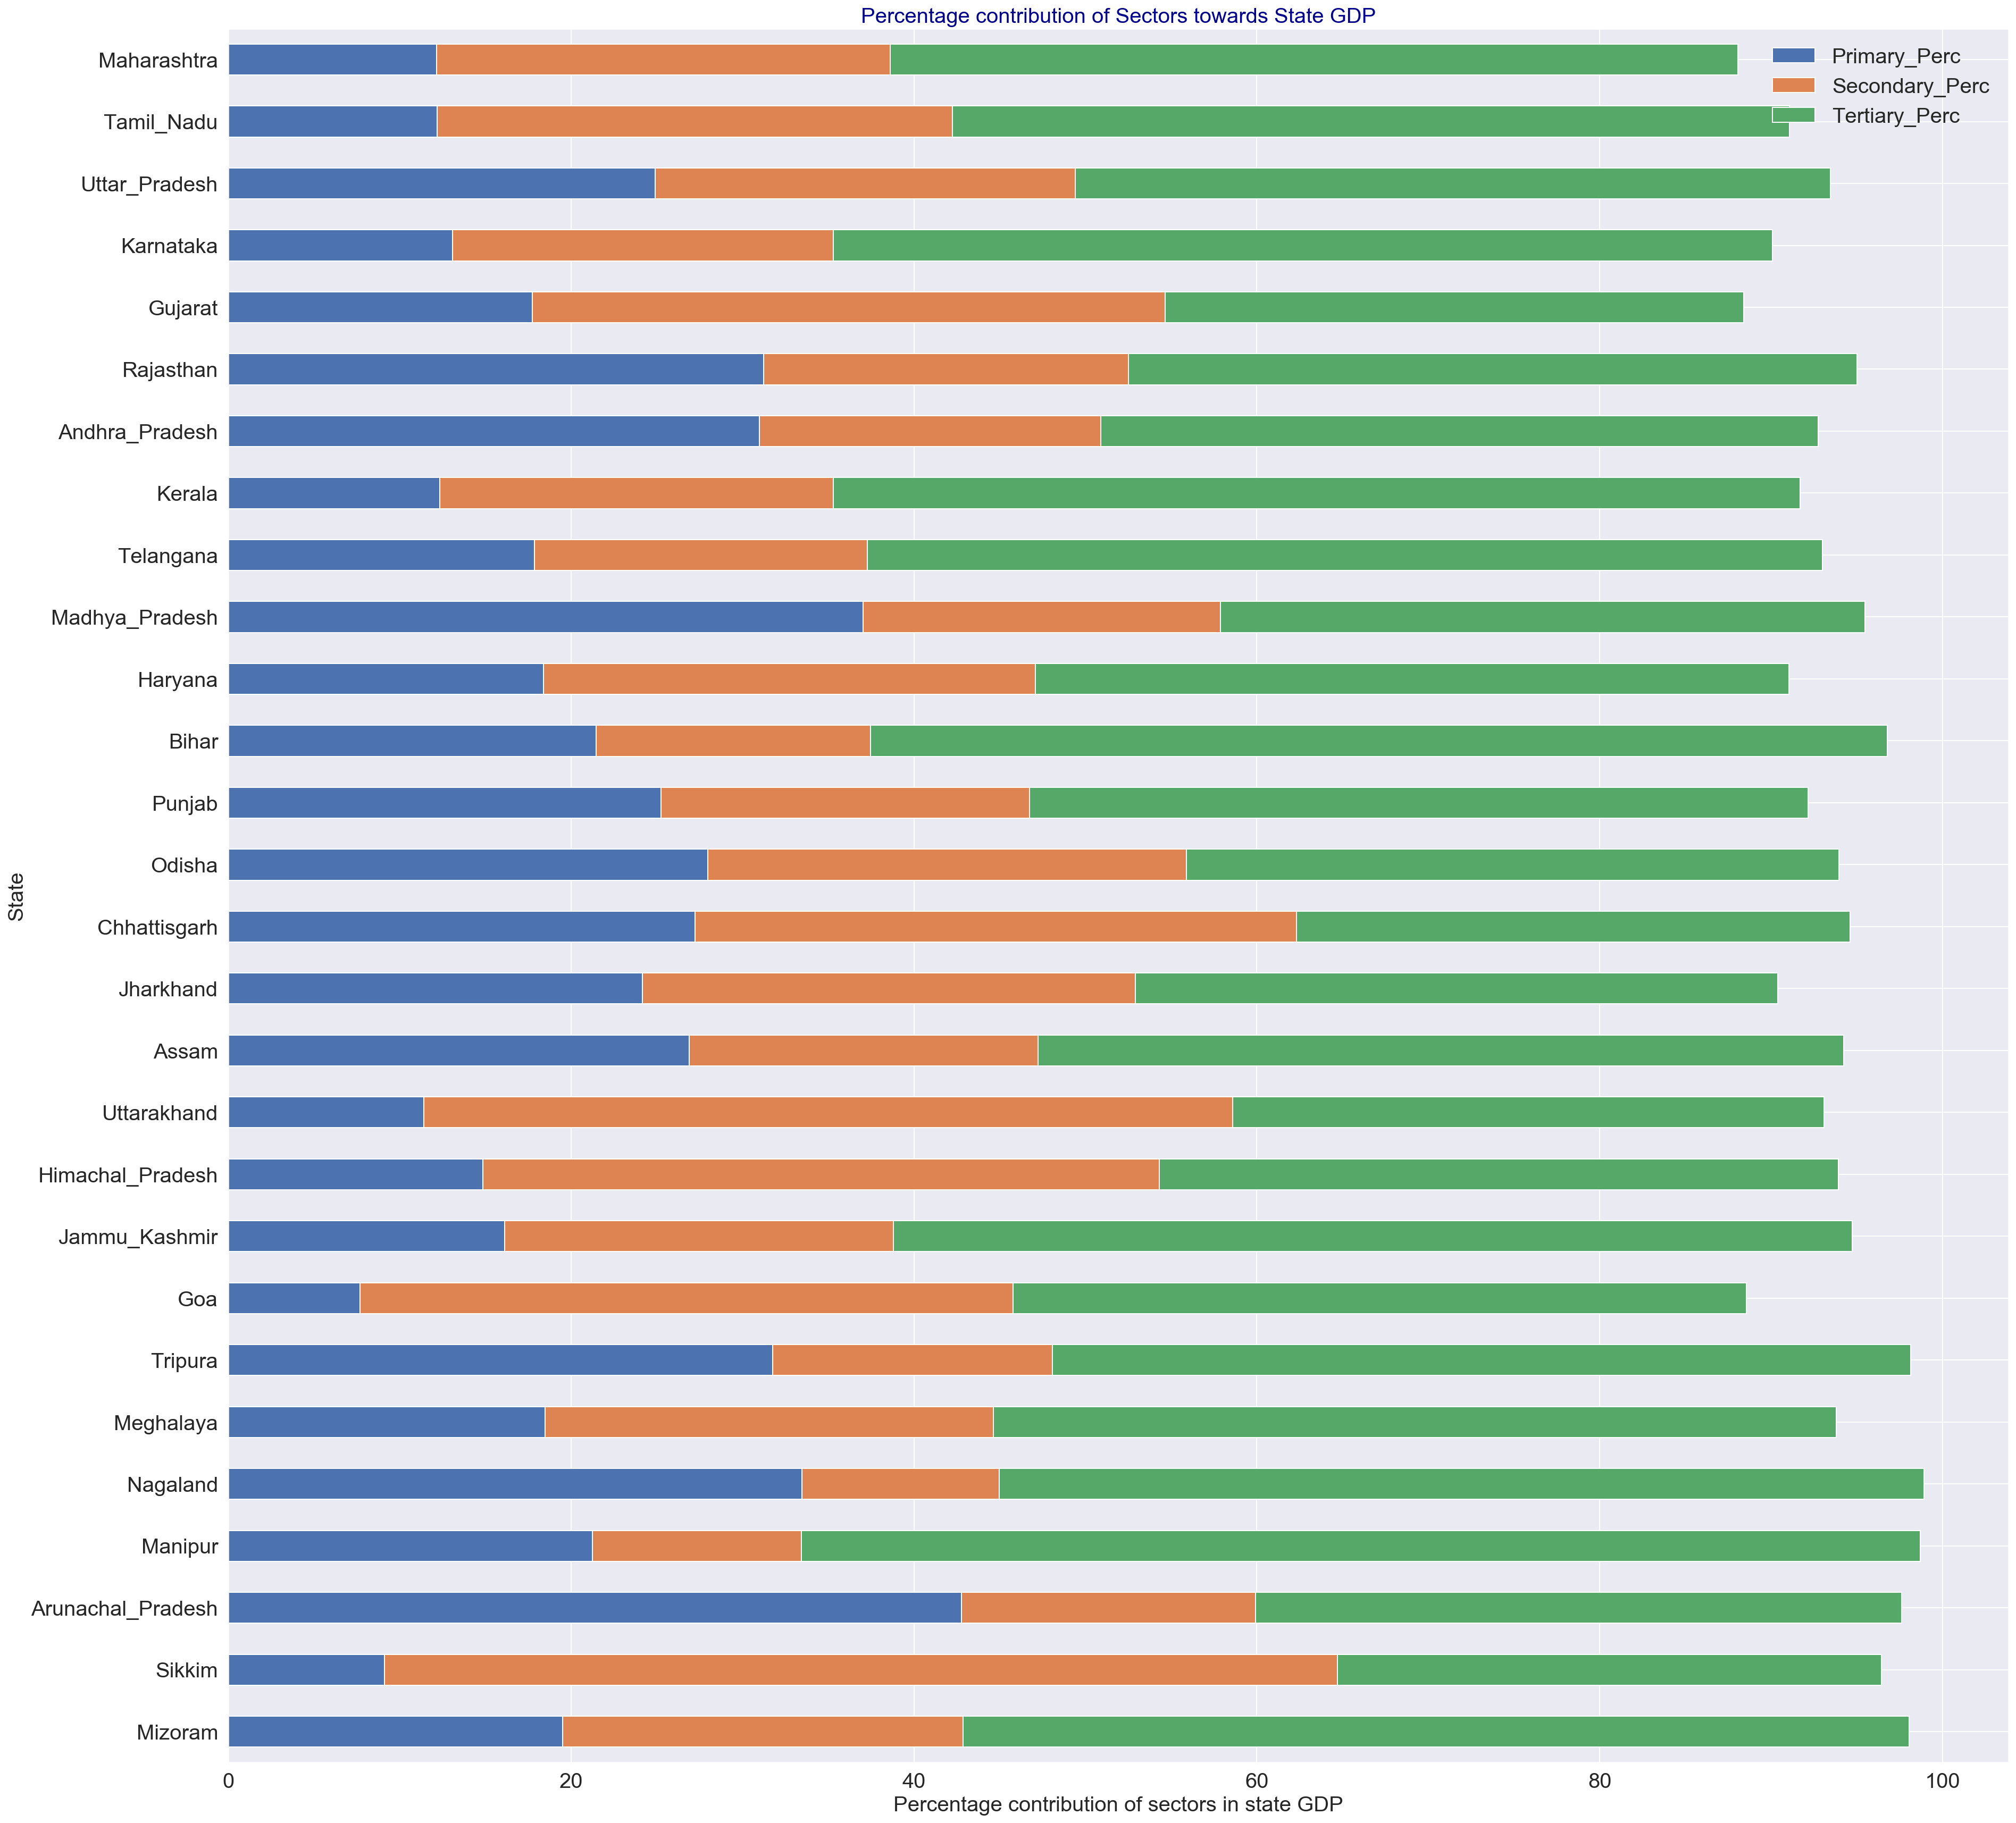

In [43]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
sort_gsdp_df[['State','Primary_Perc','Secondary_Perc','Tertiary_Perc']
            ].set_index('State').plot(kind='barh',stacked=True,figsize=(30,30));
plt.title('Percentage contribution of Sectors towards State GDP',color='darkblue')
plt.xlabel('Percentage contribution of sectors in state GDP')
plt.ylabel('State');
plt.legend();
plt.savefig('./images/SectorContributionAllStates.png')

## Observations from above plot
- Total GDP is calculated as below
    - GSDP = (Primary + Secondary + Tertiary) + Taxes on Products - Subsidies on Products
    - Because of above calculations, (Primary + Secondary + Tertiary) alone doesnt sum up to Total GDP. Total GDP has another contribution from Taxes on Product sans Subsidies on Products
    - Please note that total contribution of Primary, Secondary and Tertiary is called as Total GSVA at basic prices
- Maharashtra has highest GDP(179212165) followed by Tamil Nadu(109256373) and Uttar Pradesh(104337115).
- Tertiary sector is the main contributor to Maharashtra, Tamil Nadu and Uttar Pradesh states GDP
- Highest contribution from Primary sector is for State Arunachal Pradesh(42.77%)
- Highest contribution from Secondary Sector is for State Sikkim(55.57%)
- Highest contribution from Tertiary Sector is for State Manipur (65.25%)

## Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP. <a id='Percentile Correlation I-B'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [44]:
all_states_df['Percentile_Rank'] = round(all_states_df['Gross State Domestic Product'].rank(pct=True),2)
all_states_df

Item              State Agriculture, forestry and fishing  \
0             Rajasthan                          15044394   
1             Telangana                           7591501   
2                Odisha                           6422978   
3                 Assam                           3855548   
4                 Bihar                           7951890   
5              Nagaland                            607897   
6                   Goa                            308507   
7                Kerala                           5930617   
8        Madhya_Pradesh                          16235647   
9               Mizoram                            217010   
10         Chhattisgarh                           3948847   
11    Arunachal_Pradesh                            686117   
12              Manipur                            383140   
13              Tripura                            799825   
14            Meghalaya                            366521   
15               Punjab                           9285716   
16              Haryana                       8.01524e+06   
17        Uttar_Pradesh                          25097754   
18       Andhra_Pradesh                          14819416   
20           Tamil_Nadu                          13064238   
21               Sikkim                            137447   
23          Uttarakhand                       1.60142e+06   
24            Karnataka                          11219422   
25        Jammu_Kashmir                           1586705   
26              Gujarat                         1.377e+07   
28          Maharashtra                          16475655   
29     Himachal_Pradesh                           1514981   
30            Jharkhand                           3211065   

Item Mining and quarrying      Primary Manufacturing  \
0                 4069385     19113780       6552580   
1                 1541853      9133354       6353711   
2                 2586328      9009306       5754229   
3                 1471149      5326697       2002936   
4                   68107      8019997       2189965   
5                    8280       616178         18346   
6                    3622       312129       1177608   
7                  558824      6489442       4273567   
8                 1618373     17854020       4368833   
9                    8588       225598          8479   
10                2451970      6400817       4370593   
11                  30842       716959         26120   
12                    NaN       383140         49501   
13                 142391       942216        228625   
14                  84529       451050        433213   
15                  10354      9296070       4790341   
16                  25186  8.04042e+06   7.75692e+06   
17                 901501     25999255      12261649   
18                1484300     16303716       4672266   
20                 265536     13329774      18914794   
21                   1329       138776        550697   
23                 244549  1.84597e+06   5.86625e+06   
24                 846882     12066304      12953843   
25                  33621      1620326        893207   
26            2.11722e+06  1.58872e+07   2.40875e+07   
28                5282727     21758383      33660294   
29                  33385      1548366       2543637   
30                2037289      5248354       4114148   

Item Electricity, gas, water supply & other utility services Construction  \
0                                               1122888           5353326   
1                                                716266           2854024   
2                                                833067           2402396   
3                                                296587           1733568   
4                                                345168           3449763   
5                                                 37944            156072   
6                                                204110           

In [45]:
all_states_df['Percentile_Corr'] = round(all_states_df['Primary_Perc'].corr(all_states_df['Percentile_Rank']),2)
all_states_df

Item              State Agriculture, forestry and fishing  \
0             Rajasthan                          15044394   
1             Telangana                           7591501   
2                Odisha                           6422978   
3                 Assam                           3855548   
4                 Bihar                           7951890   
5              Nagaland                            607897   
6                   Goa                            308507   
7                Kerala                           5930617   
8        Madhya_Pradesh                          16235647   
9               Mizoram                            217010   
10         Chhattisgarh                           3948847   
11    Arunachal_Pradesh                            686117   
12              Manipur                            383140   
13              Tripura                            799825   
14            Meghalaya                            366521   
15               Punjab                           9285716   
16              Haryana                       8.01524e+06   
17        Uttar_Pradesh                          25097754   
18       Andhra_Pradesh                          14819416   
20           Tamil_Nadu                          13064238   
21               Sikkim                            137447   
23          Uttarakhand                       1.60142e+06   
24            Karnataka                          11219422   
25        Jammu_Kashmir                           1586705   
26              Gujarat                         1.377e+07   
28          Maharashtra                          16475655   
29     Himachal_Pradesh                           1514981   
30            Jharkhand                           3211065   

Item Mining and quarrying      Primary Manufacturing  \
0                 4069385     19113780       6552580   
1                 1541853      9133354       6353711   
2                 2586328      9009306       5754229   
3                 1471149      5326697       2002936   
4                   68107      8019997       2189965   
5                    8280       616178         18346   
6                    3622       312129       1177608   
7                  558824      6489442       4273567   
8                 1618373     17854020       4368833   
9                    8588       225598          8479   
10                2451970      6400817       4370593   
11                  30842       716959         26120   
12                    NaN       383140         49501   
13                 142391       942216        228625   
14                  84529       451050        433213   
15                  10354      9296070       4790341   
16                  25186  8.04042e+06   7.75692e+06   
17                 901501     25999255      12261649   
18                1484300     16303716       4672266   
20                 265536     13329774      18914794   
21                   1329       138776        550697   
23                 244549  1.84597e+06   5.86625e+06   
24                 846882     12066304      12953843   
25                  33621      1620326        893207   
26            2.11722e+06  1.58872e+07   2.40875e+07   
28                5282727     21758383      33660294   
29                  33385      1548366       2543637   
30                2037289      5248354       4114148   

Item Electricity, gas, water supply & other utility services Construction  \
0                                               1122888           5353326   
1                                                716266           2854024   
2                                                833067           2402396   
3                                                296587           1733568   
4                                                345168           3449763   
5                                                 37944            156072   
6                                                204110           

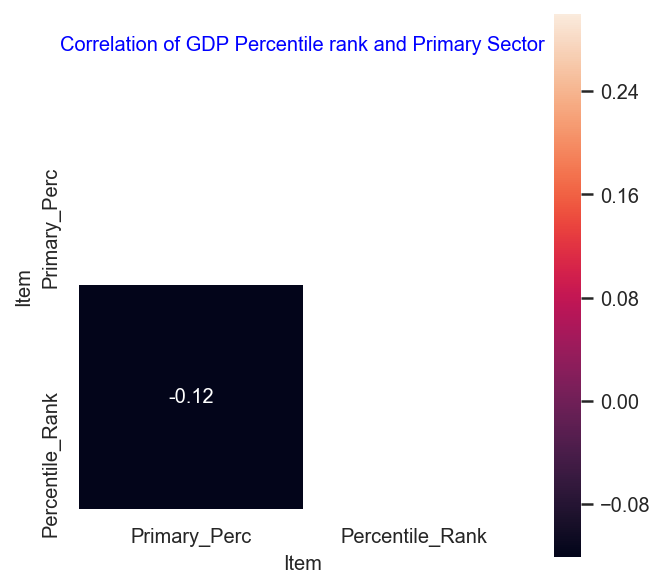

In [46]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
numeric_col_heatmap = ['Primary_Perc','Percentile_Rank']
plt.figure(figsize=(5,5))
mask = np.zeros_like(all_states_df[numeric_col_heatmap].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
      sns.heatmap(all_states_df[numeric_col_heatmap].corr(),mask=mask,vmax=.3, square=True, annot=True,
                 );#cmap='RdYlGn');
plt.title("Correlation of GDP Percentile rank and Primary Sector",color='blue');

## Observation from above plot 
- It can be seen that there is negative correlation(-0.12) between percentile rank of state GDP and Primary Sector Contribution. With Lower GDP, the %contribution of Primary Sector is higher and vice versa

## Extra - Correlation between State GDP Percentile rank and %Contribution of Secondary and Tertiary Sectors

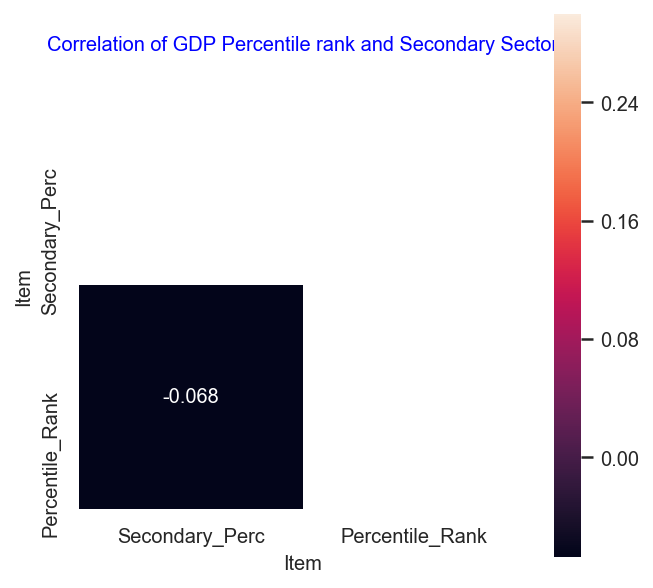

In [47]:
numeric_col_heatmap = ['Secondary_Perc','Percentile_Rank']
plt.figure(figsize=(5,5))
mask = np.zeros_like(all_states_df[numeric_col_heatmap].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
      sns.heatmap(all_states_df[numeric_col_heatmap].corr(),mask=mask,vmax=.3, square=True, annot=True,
                 );#cmap='RdYlGn');
plt.title("Correlation of GDP Percentile rank and Secondary Sector",color='blue');

## Observation from above plot 
- It can be seen that there is negative correlation(-0.068) between percentile rank of state GDP and Secondary Sector Contribution. With Lower GDP, the %contribution of Secondary Sector is higher and vice versa

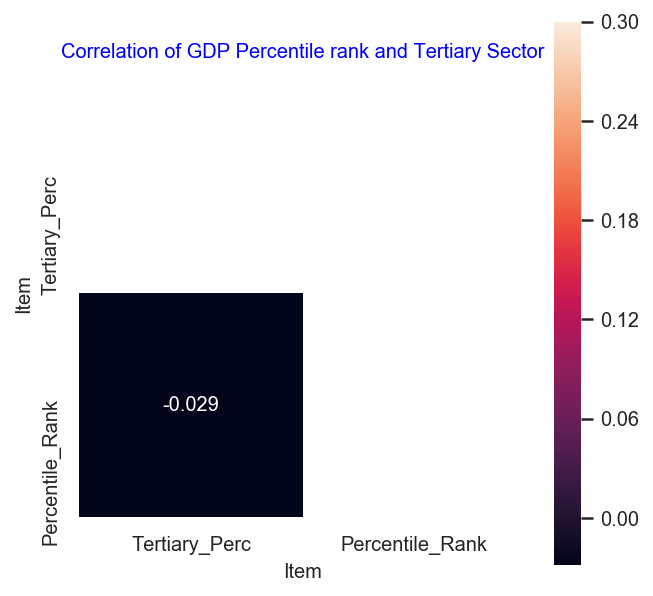

In [48]:
numeric_col_heatmap = ['Tertiary_Perc','Percentile_Rank']
plt.figure(figsize=(5,5))
mask = np.zeros_like(all_states_df[numeric_col_heatmap].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
      sns.heatmap(all_states_df[numeric_col_heatmap].corr(),mask=mask,vmax=.3, square=True, annot=True,
                 );#cmap='RdYlGn');
plt.title("Correlation of GDP Percentile rank and Tertiary Sector",color='blue');

## Observation from above plot 
- It can be seen that there is negative correlation(-0.029) between percentile rank of state GDP and Tertiary Sector Contribution. With Lower GDP, the %contribution of Tertiary Sector is higher and vice versa

## Comparison of GSDP Percentile rank and %Contribution of sectors
- From above plots it can be seen that amongst three sectors, Primary Sector is most negatively correlated. In other words with lower State GDP, the %Contribution of Primary Sector is most

# Categorise states into four groups based on the GDP per capita (C1, C2, C3, C4) <a id='Cetgorize States I-B'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

- As per assignment, Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.

In [49]:
state_category_df = all_states_df.copy()
category_labels = ['C4', 'C3', 'C2', 'C1']
state_category_df['Category'] = pd.qcut(state_category_df['Per Capita GSDP (Rs.)'],
                              q=[0, 0.2, .5, .85, 1],
                              labels=category_labels)
state_category_df

Item              State Agriculture, forestry and fishing  \
0             Rajasthan                          15044394   
1             Telangana                           7591501   
2                Odisha                           6422978   
3                 Assam                           3855548   
4                 Bihar                           7951890   
5              Nagaland                            607897   
6                   Goa                            308507   
7                Kerala                           5930617   
8        Madhya_Pradesh                          16235647   
9               Mizoram                            217010   
10         Chhattisgarh                           3948847   
11    Arunachal_Pradesh                            686117   
12              Manipur                            383140   
13              Tripura                            799825   
14            Meghalaya                            366521   
15               Punjab                           9285716   
16              Haryana                       8.01524e+06   
17        Uttar_Pradesh                          25097754   
18       Andhra_Pradesh                          14819416   
20           Tamil_Nadu                          13064238   
21               Sikkim                            137447   
23          Uttarakhand                       1.60142e+06   
24            Karnataka                          11219422   
25        Jammu_Kashmir                           1586705   
26              Gujarat                         1.377e+07   
28          Maharashtra                          16475655   
29     Himachal_Pradesh                           1514981   
30            Jharkhand                           3211065   

Item Mining and quarrying      Primary Manufacturing  \
0                 4069385     19113780       6552580   
1                 1541853      9133354       6353711   
2                 2586328      9009306       5754229   
3                 1471149      5326697       2002936   
4                   68107      8019997       2189965   
5                    8280       616178         18346   
6                    3622       312129       1177608   
7                  558824      6489442       4273567   
8                 1618373     17854020       4368833   
9                    8588       225598          8479   
10                2451970      6400817       4370593   
11                  30842       716959         26120   
12                    NaN       383140         49501   
13                 142391       942216        228625   
14                  84529       451050        433213   
15                  10354      9296070       4790341   
16                  25186  8.04042e+06   7.75692e+06   
17                 901501     25999255      12261649   
18                1484300     16303716       4672266   
20                 265536     13329774      18914794   
21                   1329       138776        550697   
23                 244549  1.84597e+06   5.86625e+06   
24                 846882     12066304      12953843   
25                  33621      1620326        893207   
26            2.11722e+06  1.58872e+07   2.40875e+07   
28                5282727     21758383      33660294   
29                  33385      1548366       2543637   
30                2037289      5248354       4114148   

Item Electricity, gas, water supply & other utility services Construction  \
0                                               1122888           5353326   
1                                                716266           2854024   
2                                                833067           2402396   
3                                                296587           1733568   
4                                                345168           3449763   
5                                                 37944            156072   
6                                                204110           

In [50]:
state_category_df['Per Capita GSDP (Rs.)'].quantile(0.5)

101332.0

## For each category (C1, C2, C3, C4):
- Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

- Note-I: The nomenclature for this project is as follows: primary, secondary and tertiary are named 'sectors', while agriculture, manufacturing etc. are named 'sub-sectors'.

- Note-II: If the top 3 sub-sectors contribute to, say, 79% of the GDP of some category, you can report "These top 3 sub-sectors contribute to approximately 80% of the GDP". This is to simplify the analysis and make the results consumable. (Remember, the CEO has to present the report to the CMs, and CMs have limited time; so, the analysis needs to be sharp and concise.)

- Plot the contribution of the sub-sectors as a percentage of the GSDP of each category

### Common Function to plot Sub Sectors that contribute to 80% of GSDP belonging to different category

In [51]:
def plot_cetgory(df_category_state,category_list):
    sns.set(font_scale=1)
    nrows = int(np.ceil(len(category_list))) # Makes sure you have enough rows
    #tweak figsize scaler if graphs don't fit well
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(8,8*len(category_list)), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, category in enumerate(category_list):
        
        ##Filter dataframe based on category
        df2_copy_df= df_category_state[df_category_state['Category']==category]
        #since we have already filtered catgeory so we can drop the category in this dataframe
        df2_copy_df.drop(columns=['Primary','Secondary','Tertiary','TOTAL GSVA at basic prices',
                                 'Taxes on Products','Subsidies on products',"Population ('00)",'Primary_Perc',
                        'Secondary_Perc','Tertiary_Perc','AllSectors_Perc','Taxes_Perc','Subsidies_Perc','Category'],
                        inplace=True)

        ##Transpose the data
        df2_copy_df = df2_copy_df.T

        ##take the row at index location1 and save it in header variable
        new_header = df2_copy_df.iloc[0]
        df2_copy_df.columns = new_header

        df2_copy_df = df2_copy_df[1:]

        # Create Total column - this is the total of each sub-sector across all states
        df2_copy_df['Total'] = df2_copy_df.sum(axis=1)

        # Get Total GSDP of all states belonging to that selected category
        total_gsdp = df2_copy_df.loc['Gross State Domestic Product']['Total']
        
        # Create column of sectorwise percentage wrt Total GSDP
        df2_copy_df['Sector_Per']=round(df2_copy_df['Total']/total_gsdp,2)*100
        
        # Sort the values by Sector wise percentage in descending order
        df2_copy_df.sort_values(by='Sector_Per',ascending=False,inplace=True)
        df2_copy_df

        # taking subset of above dataframe to remove GSDP ratio from dataframe
        df2_copy_df = df2_copy_df[1:]

        # Take cumulative sum of sector wise percentage
        df2_copy_df['Cum_Sum'] = df2_copy_df['Sector_Per'].cumsum()

    #     df2_copy_df[df2_copy_df['Cum_Sum']<80]['Cum_Sum'].plot(kind='barh',figsize=(8,8));
    #     plt.title('Sectors that contribute to approximately 80% of the GSDP of category: {0}'.format(category),
    #               color='blue')
    #     plt.xlabel('Cumulative Sum of Sub Sectors percentage')
    #     plt.ylabel('Sub Sectors')
        #sns.barplot(df2_copy_df[df2_copy_df['Cum_Sum']<80]['Cum_Sum'], ax=ax[i])
        
        # Plot the cumulative sum of percentage of sub sectors that contribute to 80% of GSDP. Select only top 5
        df2_copy_df[df2_copy_df['Cum_Sum']<80]['Sector_Per'][0:5].sort_values().plot(kind='barh',ax=ax[i])
        ax[i].set_title('Sub Sectors that contribute to approximately 80% of the GSDP of category: {0}'.format(category),
                        color='blue')
        ax[i].set_xlabel('Sub Sectors %Contribution') 
        ax[i].set_ylabel('Sub Sectors')

## Plot sub sectors that contribute to 80% of GSDP of categories - C1, C2, C3, C4 <a id='Plot 80perc Contribution I-B'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

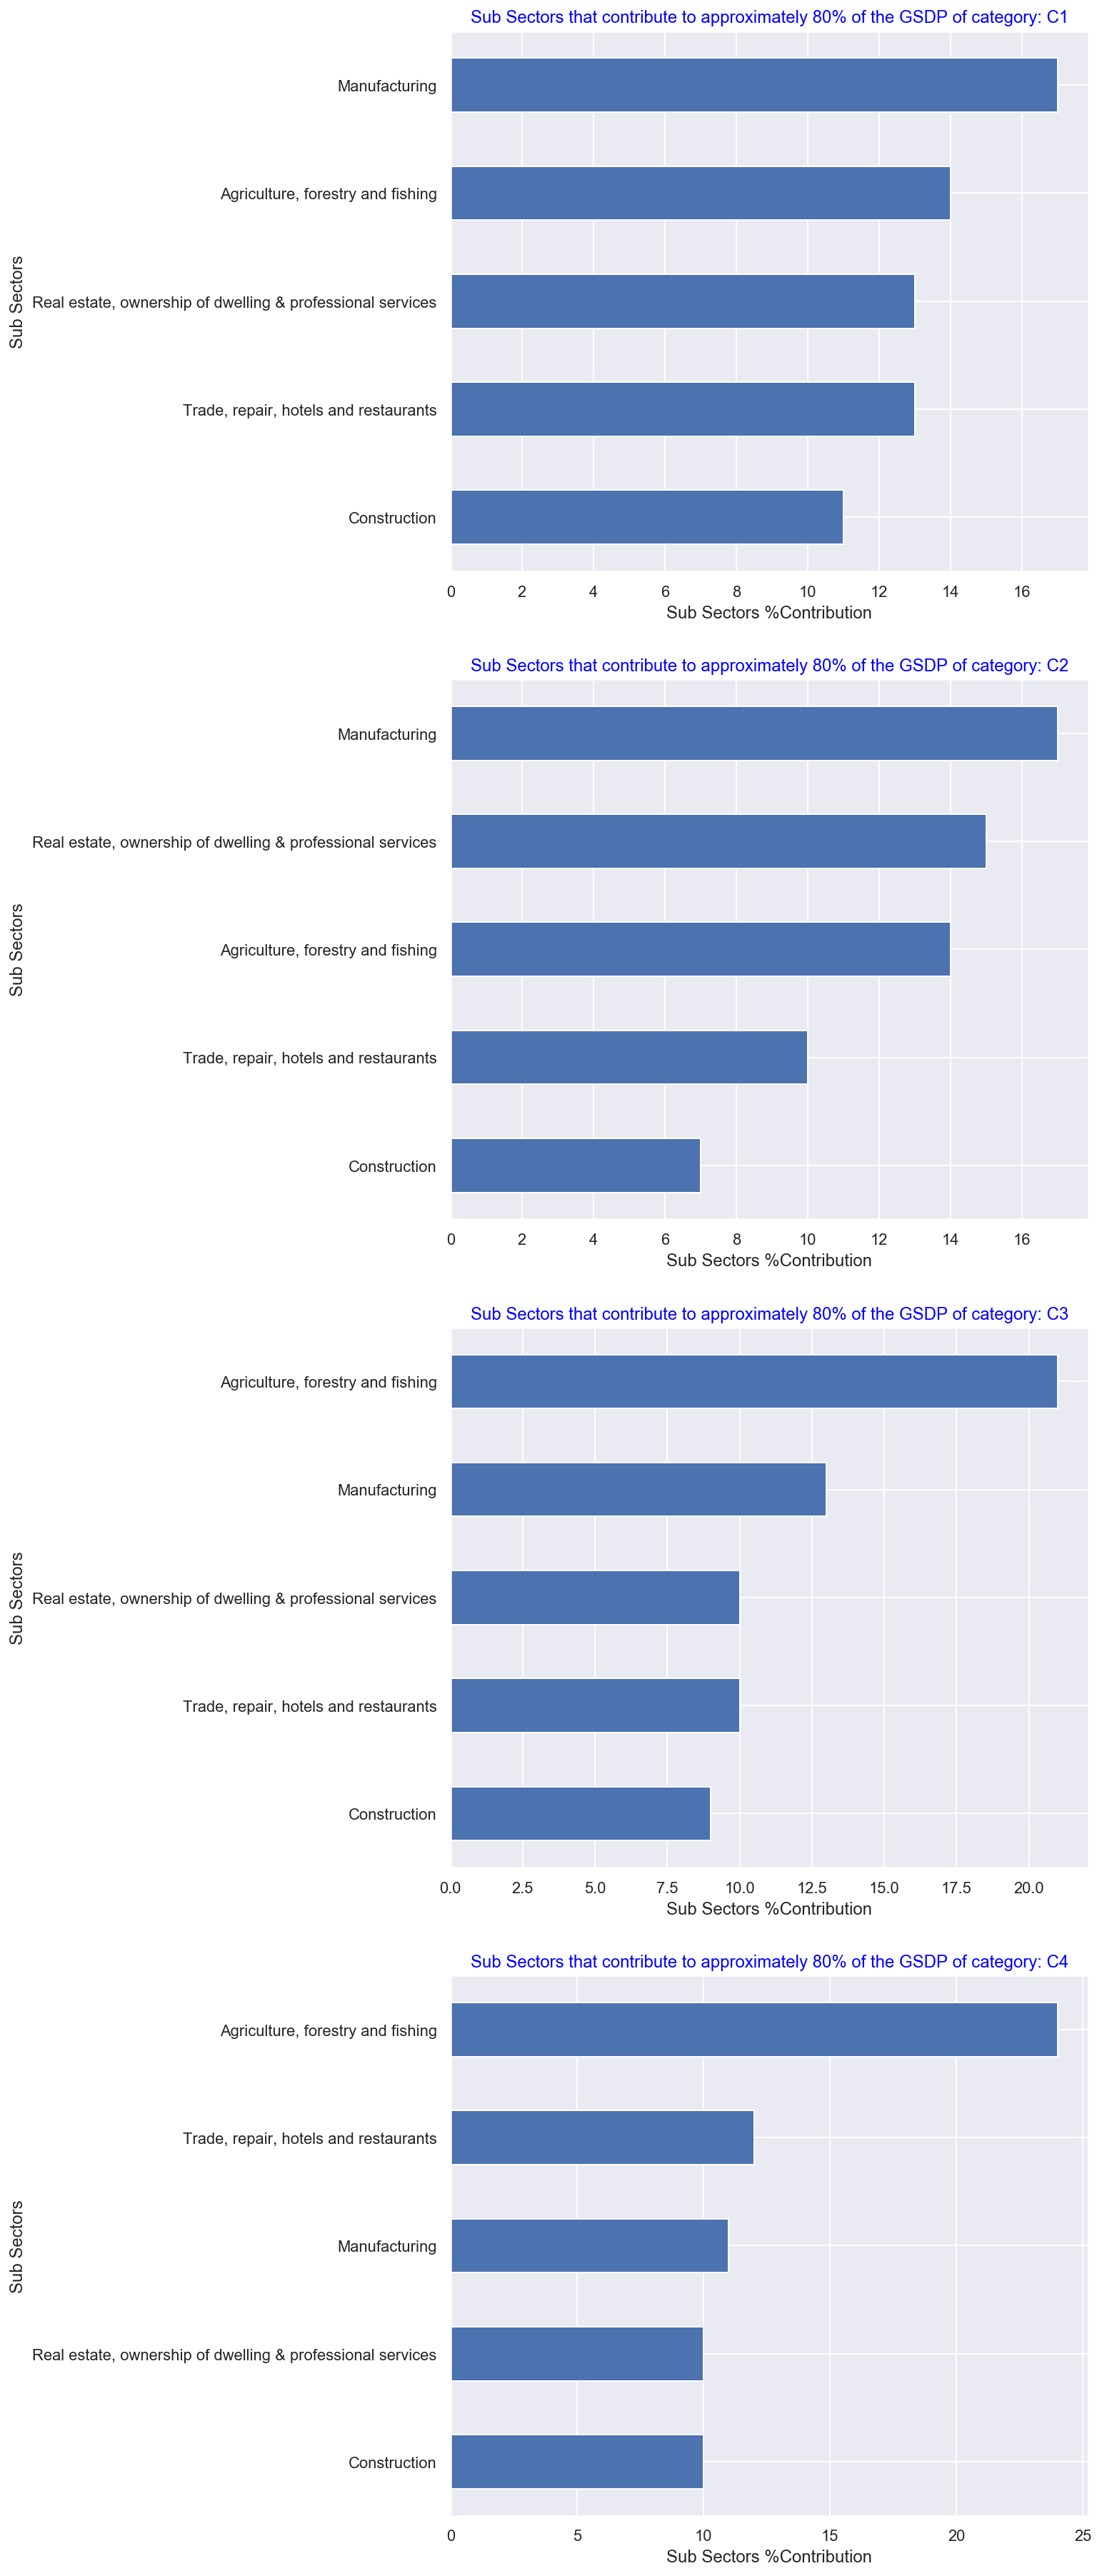

In [52]:
#create category list
category_list = ['C1','C2','C3','C4']

#Call the function to subplot subsectors that contribute to 80% of GSDP - categorywise
plot_cetgory(state_category_df,category_list)

## Observations from above Plot
- <b>sub sectors that contribute to 80% of GSDP of categories - C1, i.e. for the states lying between the 85th and the 100th percentile</b> - 
    - Manufacturing
    - Agriculture, forestry and fishing
    - Real estate, ownership of dwelling & professional services
    - Trade, repair, hotels and restaurants
    - Construction 
- <b>sub sectors that contribute to 80% of GSDP of categories - C2, i.e. for the states lying between the 50th and the 85th percentile</b> - 
    - Manufacturing
    - Real estate, ownership of dwelling & professional services
    - Agriculture, forestry and fishing
    - Trade, repair, hotels and restaurants
    - Construction
- <b>sub sectors that contribute to 80% of GSDP of categories - C3, i.e. for the states lying between the 25th and the 50th percentile</b> - 
    - Agriculture, forestry and fishing
    - Manufacturing
    - Real estate, ownership of dwelling & professional services
    - Trade, repair, hotels and restaurants
    - Construction
- <b>sub sectors that contribute to 80% of GSDP of categories - C4, i.e. for the states lying in 20th percentile</b> - 
    - Agriculture, forestry and fishing
    - Trade, repair, hotels and restaurants
    - Manufacturing
    - Real estate, ownership of dwelling & professional services
    - Construction

## Extra for presentation - States belonging to different categories

In [53]:
#pd.options.display.float_format = "{:.0f}".format
c1_cat_df= state_category_df[state_category_df['Category']=='C1']
c1_cat_df[['State','Per Capita GSDP (Rs.)','Category']].sort_values(by='Per Capita GSDP (Rs.)',ascending=False)

Item        State Per Capita GSDP (Rs.) Category
6             Goa                271793       C1
21         Sikkim                240274       C1
16        Haryana                164077       C1
7          Kerala                154778       C1
23    Uttarakhand                153076       C1

In [54]:
c2_cat_df= state_category_df[state_category_df['Category']=='C2']
c2_cat_df[['State','Per Capita GSDP (Rs.)','Category']].sort_values(by='Per Capita GSDP (Rs.)',ascending=False)

Item              State Per Capita GSDP (Rs.) Category
28          Maharashtra                152853       C2
29     Himachal_Pradesh                147330       C2
20           Tamil_Nadu                146503       C2
24            Karnataka                145141       C2
26              Gujarat                141263       C2
1             Telangana                139035       C2
15               Punjab                126606       C2
11    Arunachal_Pradesh                112718       C2
18       Andhra_Pradesh                104977       C2

In [55]:
c3_cat_df= state_category_df[state_category_df['Category']=='C3']
c3_cat_df[['State','Per Capita GSDP (Rs.)','Category']].sort_values(by='Per Capita GSDP (Rs.)',ascending=False)

Item          State Per Capita GSDP (Rs.) Category
9           Mizoram                 97687       C3
5          Nagaland                 89607       C3
10     Chhattisgarh                 86860       C3
0         Rajasthan                 84837       C3
13          Tripura                 77358       C3
14        Meghalaya                 76228       C3
25    Jammu_Kashmir                 75840       C3
2            Odisha                 73979       C3

In [56]:
c4_cat_df= state_category_df[state_category_df['Category']=='C4']
c4_cat_df[['State','Per Capita GSDP (Rs.)','Category']].sort_values(by='Per Capita GSDP (Rs.)',ascending=False)

Item           State Per Capita GSDP (Rs.) Category
8     Madhya_Pradesh                 62989       C4
30         Jharkhand                 62091       C4
3              Assam                 60621       C4
12           Manipur                 58442       C4
17     Uttar_Pradesh                 49450       C4
4              Bihar                 33954       C4

## Plot GDP distribution of Catgeories - C1, C2, C3, C4 <a id='Plot GDP distribution I-B'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

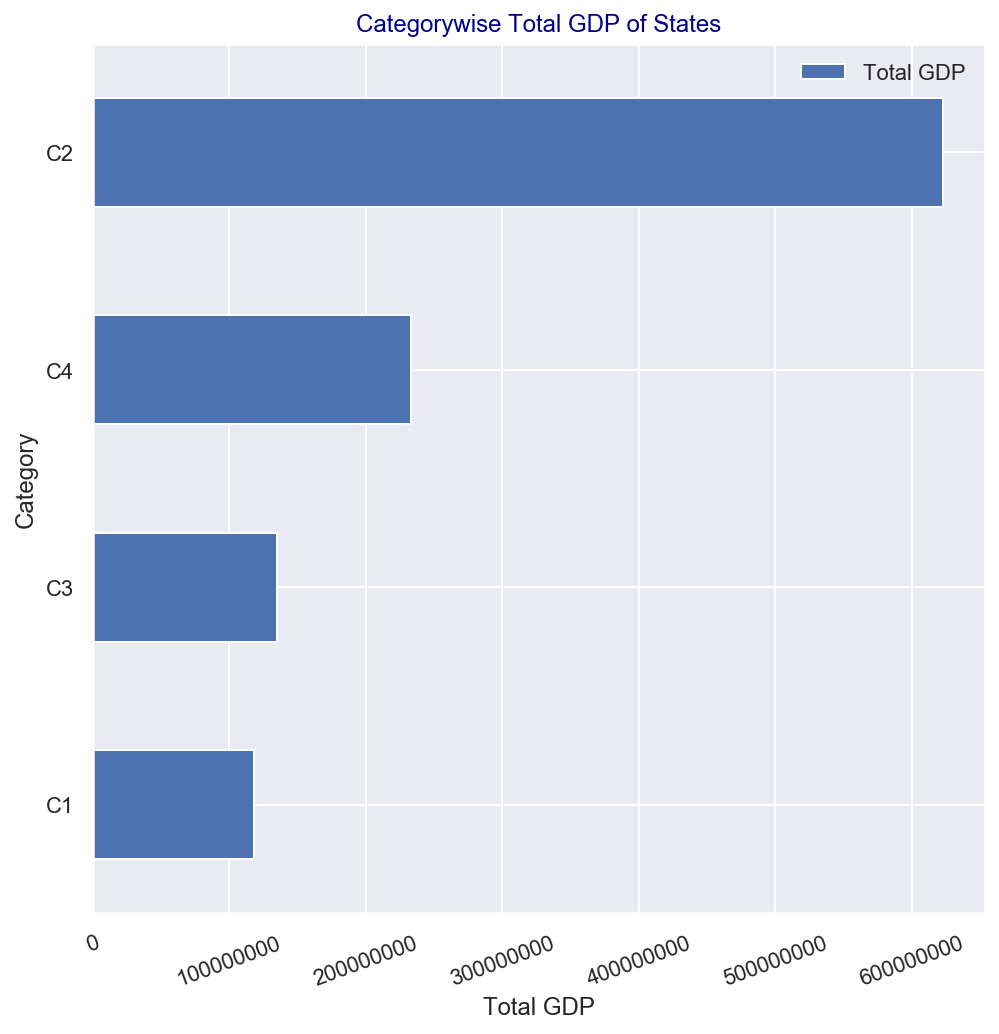

In [57]:
#create category list
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
category_list = ['C1','C2','C3','C4']
df1 = pd.DataFrame(columns=['C1','C2','C3','C4'])
#Call the function to subplot Cetegorywise GDP dstribution of various states
for category in category_list:
    df1['{0}'.format(category)]= [state_category_df[state_category_df['Category']==category
                                                            ]['Gross State Domestic Product'].sum()]
df1 = df1.T.rename(columns={0:'Total GDP'}).sort_values(by='Total GDP',ascending=True)
df1.plot(kind='barh',figsize=(8,8));
plt.title('Categorywise Total GDP of States',color='darkblue')
plt.xlabel('Total GDP')
plt.ylabel('Category');
plt.ticklabel_format(axis="x", style='plain')
plt.xticks(rotation=20);
#plt.xticks(range(10000000,900000000,80000000),rotation=20);

## Observations from above Plot
- States belonging to Category C2 (i.e. States between the 50th and the 85th percentiles of GDP per Capita) have higher GDP in comparison to states belonging to other categories
- States belonging to Category C1 (i.e. States between the 80th and the 100th percentiles of GDP per Capita) have lowest GDP in comparison to states belonging to other categories

## Correlation of Sub-sectors with GDP of states <a id='SubSectors Correlation I-B'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

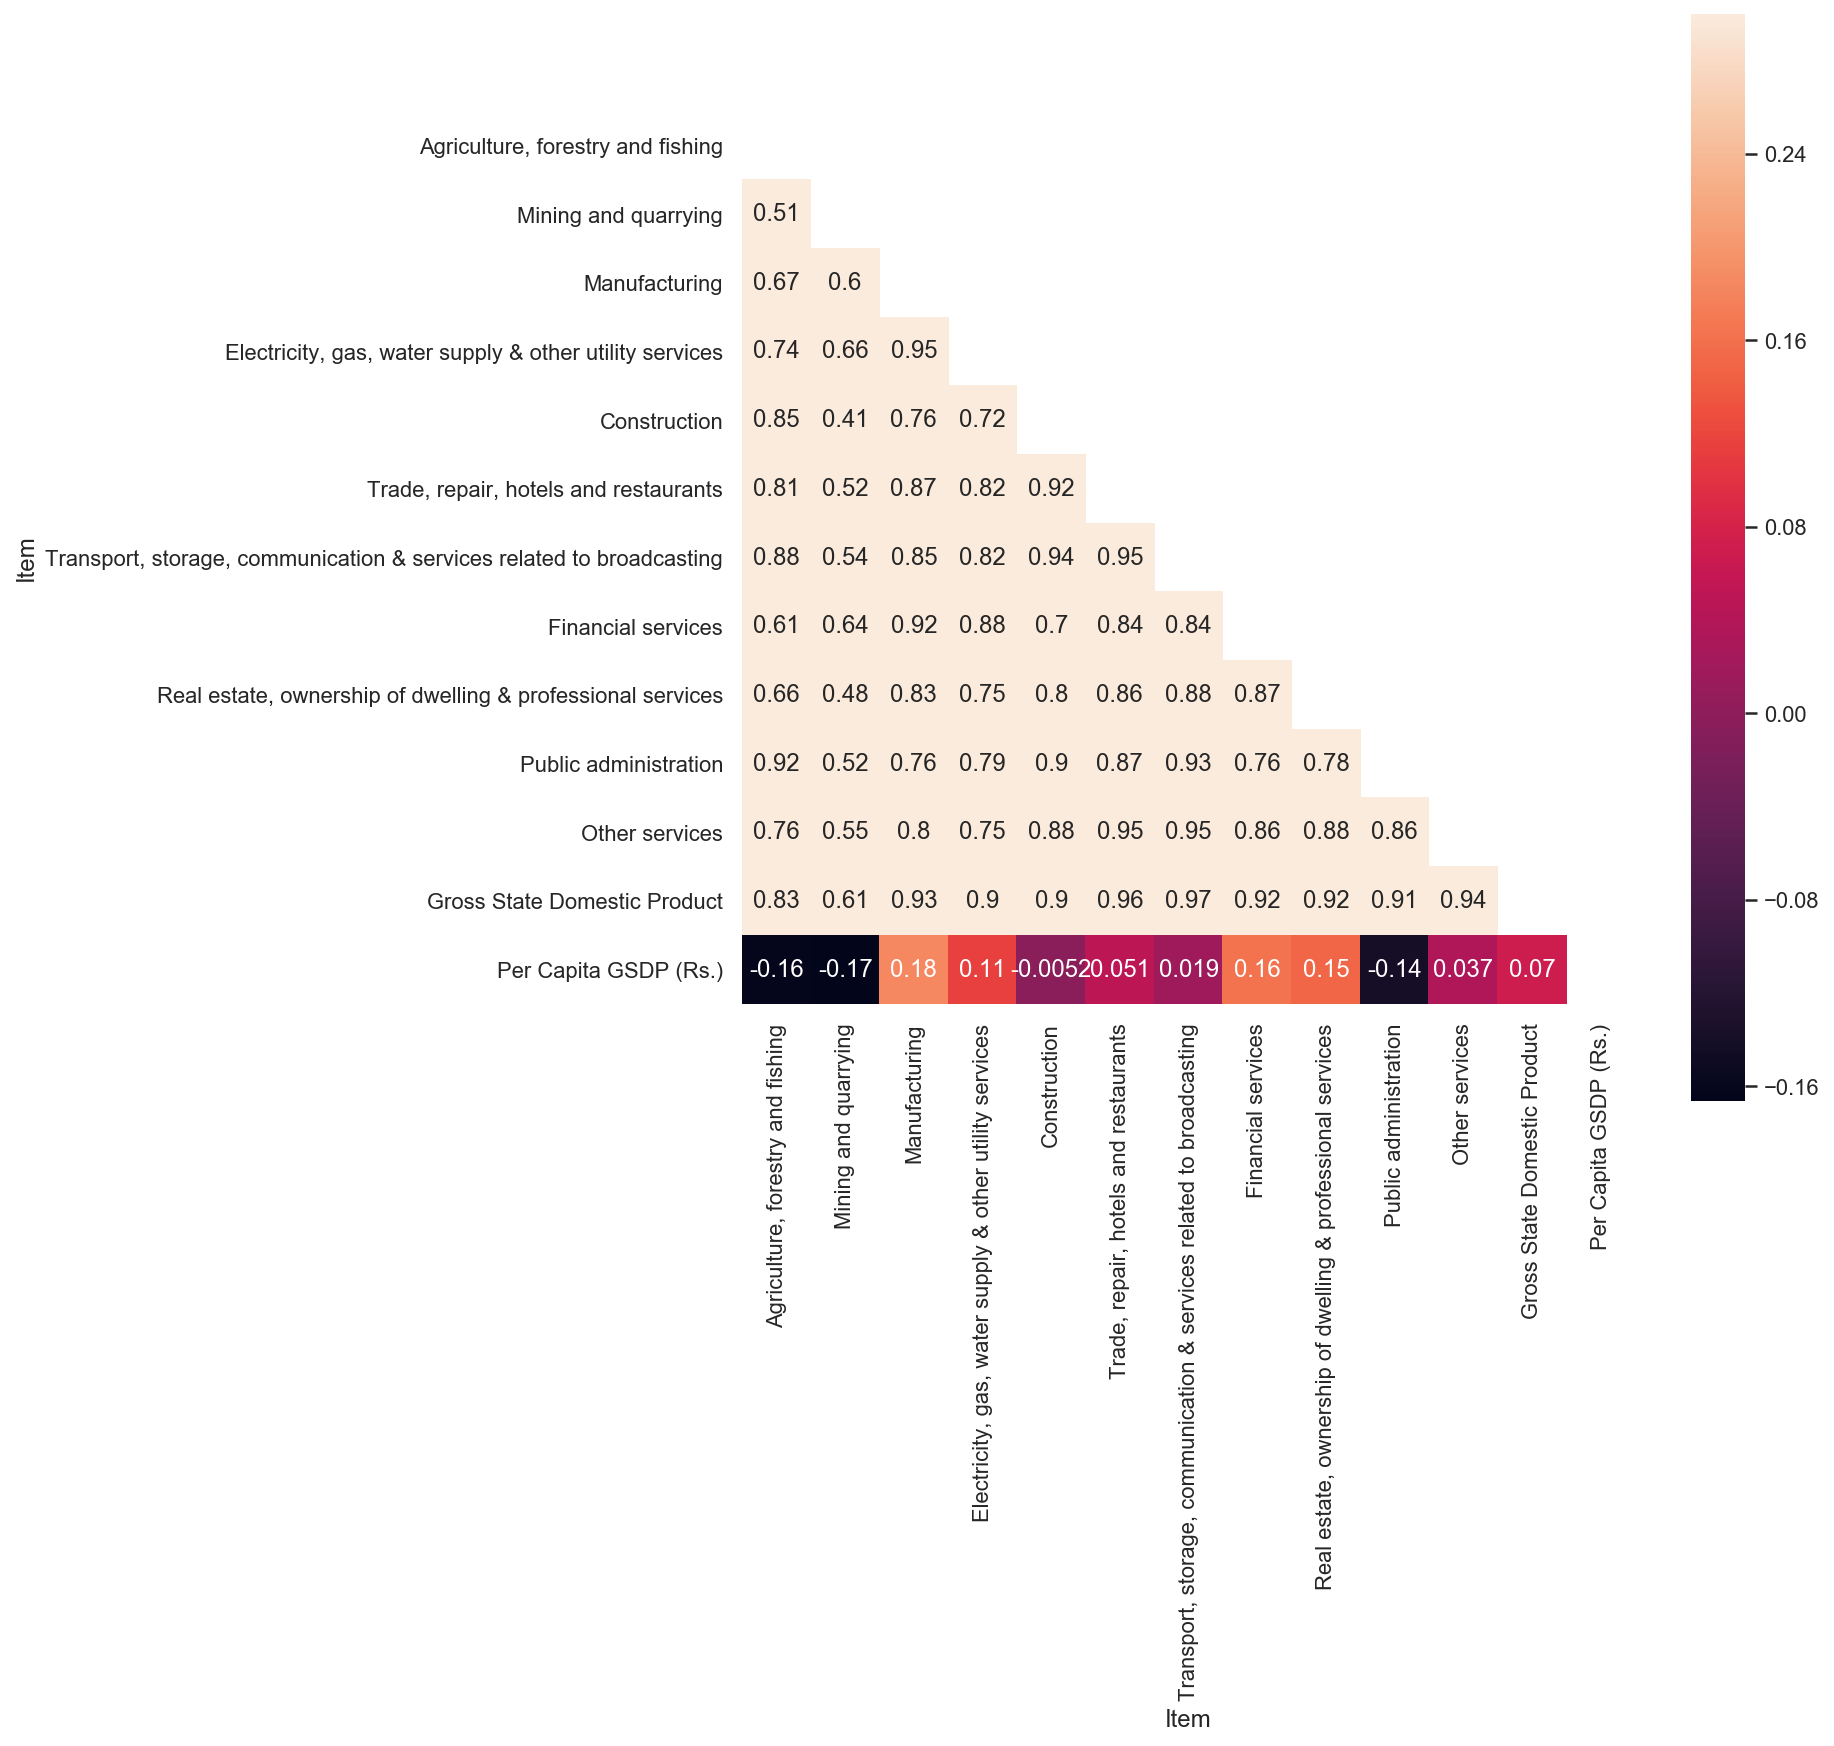

In [58]:
#
states_cat_df = state_category_df.copy()
# drop unnecessary columns from dataframe
states_cat_df.drop(columns=['Primary','Secondary','Tertiary','TOTAL GSVA at basic prices',
                            'Taxes on Products','Subsidies on products',
                            "Population ('00)",'Primary_Perc','Secondary_Perc',
                            'Tertiary_Perc','AllSectors_Perc','Taxes_Perc','Subsidies_Perc',
                            'Percentile_Rank','Percentile_Corr','Category'],inplace=True)
numeric_cols = [col for col in states_cat_df if (col!='State')]
states_cat_df[numeric_cols] = states_cat_df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)
#states_cat_df.info()

plt.figure(figsize=(10,10))
mask = np.zeros_like(states_cat_df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
      sns.heatmap(states_cat_df.corr(),mask=mask,vmax=.3, square=True, annot=True,
                 );#cmap='RdYlGn');

## Observation from above Plot
- Sub-sectors Transport, storage, communication & services related to broadcasting (0.97), Trade, repair, hotels and restaurants(0.96), Manufacturing(0.93), Other Services(0.94) are very positively correlated to GDP of states. 
- This means Secondary and Tertiary sectors are very positively correlated with State GDP
- In other words increase in growth in these sectors will result in increase in GDP growth. So government must focus on these sectors for increase in growth of state GDP

## Plot Sub-sector and State GDP correlation for each Category <a id='SubSectors GDP Correlation I-B'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [59]:
def plot_subsector_performance(df_category_state,category_list):
    sns.set(font_scale=1)
    nrows = int(np.ceil(len(category_list))) # Makes sure you have enough rows
    #tweak figsize scaler if graphs don't fit well
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(8,8*len(category_list)), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, category in enumerate(category_list):
        
        ##Filter dataframe based on category
        df2_copy_df= df_category_state[df_category_state['Category']==category]
        #since we have already filtered catgeory so we can drop the category in this dataframe
        df2_copy_df.drop(columns=['Primary','Secondary','Tertiary','TOTAL GSVA at basic prices',
                                    'Taxes on Products','Subsidies on products',
                                    "Population ('00)",'Primary_Perc','Secondary_Perc',
                                    'Tertiary_Perc','AllSectors_Perc','Taxes_Perc','Subsidies_Perc',
                                    'Percentile_Rank','Percentile_Corr','Category','Per Capita GSDP (Rs.)',
                                 'Gross State Domestic Product'],
                        inplace=True)

        ##Transpose the data
        df2_copy_df = df2_copy_df.T

        ##take the row at index location1 and save it in header variable
        new_header = df2_copy_df.iloc[0]
        df2_copy_df.columns = new_header

        df2_copy_df = df2_copy_df[1:]

        # Create Total column - this is the total of each sub-sector across all states
        df2_copy_df['Total'] = df2_copy_df.sum(axis=1)
        df2_copy_df['Total'].sort_values().plot(kind='barh',ax=ax[i])
        #print(df2_copy_df['Total'].sort_values())
        ax[i].set_title('Sectors that contribute to GDP of category: {0} states'.format(category),
                        color='blue')
        ax[i].set_xlabel('Total contribution of sectors') 
        ax[i].set_ylabel('Sub Sectors')
        ax[i].ticklabel_format(axis="x", style='plain')
        #ax[i].set_xticks(rotation=20);
        #ax[i].set_xticks(range(100000,15000000,200000));

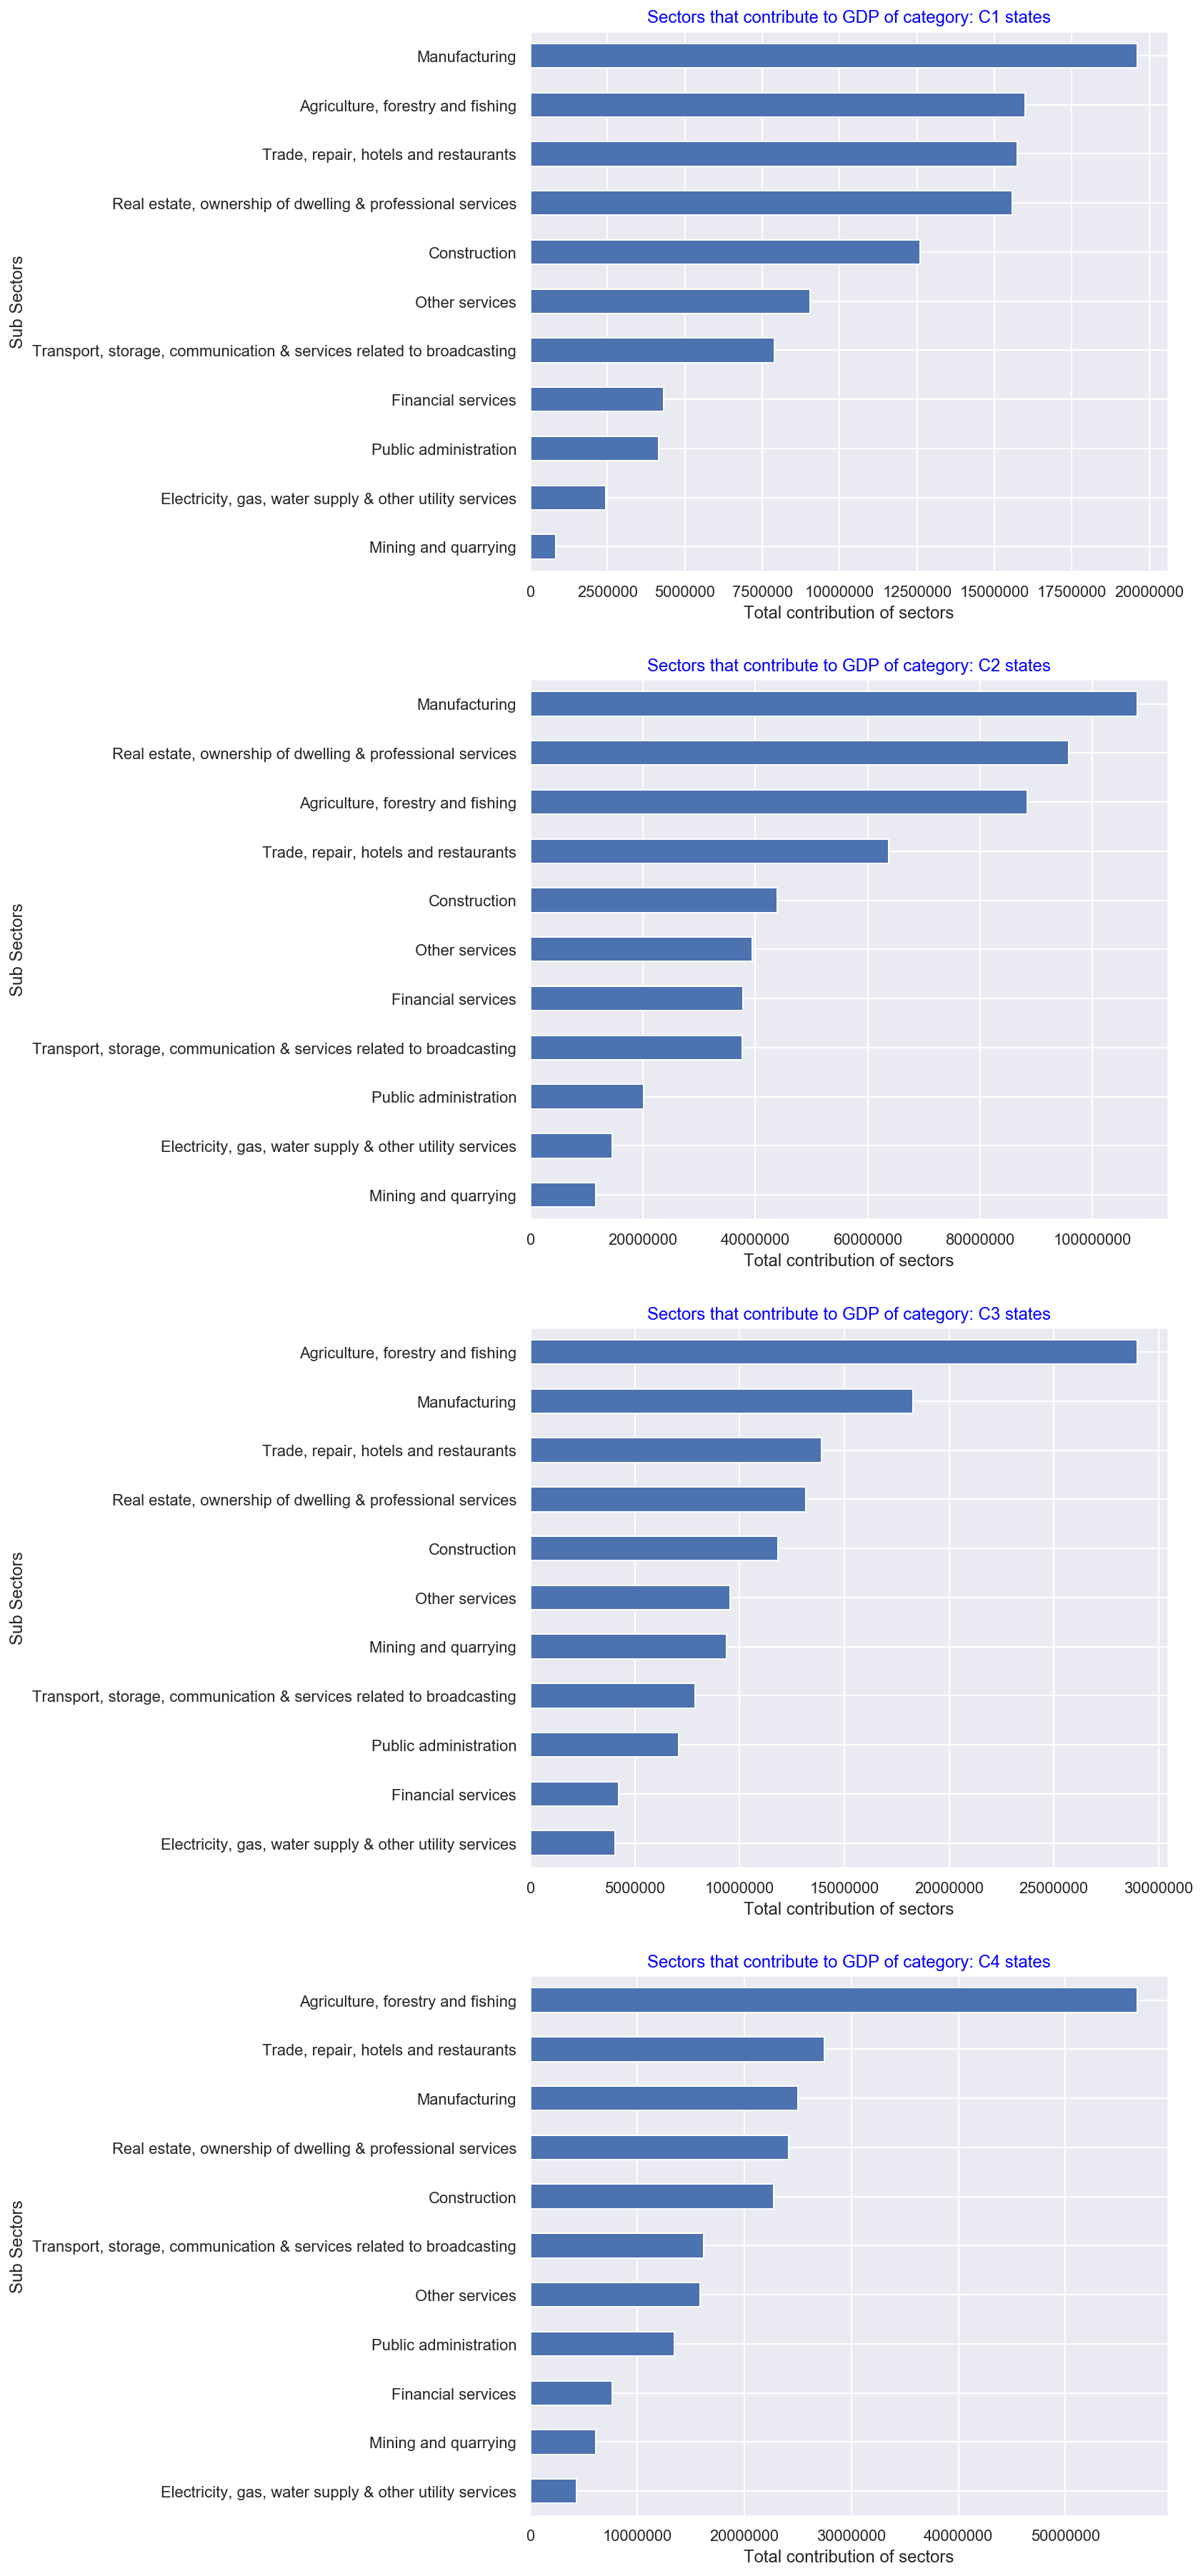

In [60]:
#create category list
category_list = ['C1','C2','C3','C4']

#Call the function to subplot Cetegorywise heatmap of various states
plot_subsector_performance(state_category_df,category_list)

## Observations and recommendations from above plot
- <b><u> For Categroy C1, </u></b>
    - Highly performing sectors are
        - Manufacturing
        - Agriculture, forestry and fishing
        - Trade, repair, hotels and restaurants
        - Real estate, ownership of dwelling & professional services
    - Recommendation - States must keep on focusing on Manufacturing, Agriculture by bringing efficiency and automation, Real Estate and Hotels, Restaurant to increase GDP growth
    - Low performaing sectors are
        - Mining and quarrying
        - Electricity, gas, water supply & other utility services
        - Public Administration
    - Recommendation - Government must focus on improving these sectors so that these sectors also start contributing more towards the growth of State GDP

- <b><u> For Categroy C2, </u></b>
    - Highly performing sectors are
        - Manufacturing
        - Real estate, ownership of dwelling & professional services
        - Agriculture, forestry and fishing
        - Trade, repair, hotels and restaurants
    - Recommendation - State must keep on focusing Manufacturing (bring skilled labor and automation) and Real Estate for category C2 states to increase state GDP 
    - Low performing sectors are
        - Mining and quarrying
        - Electricity, gas, water supply & other utility services
    - Recommendation - Government must focus on improving these sectors so that these sectors also start contributing more towards the growth of State GDP
        
- <b><u> For Categroy C3, </u></b>
    - Highly performing sectors are
        - Agriculture, forestry and fishing
        - Manufacturing
        - Trade, repair, hotels and restaurants
    - Recommendation - Agriculture, forestry and fishing is the major contributing sector towards state GDP for category C3 states. Government must keep on focusing Agriculture to further increase it contribution towards State GDP
    - Low performing sectors are
        - Electricity, gas, water supply & other utility services
        - Financial Services
    - Recommendation -  Government must focus on Financial Services and also improving Utility Services sector so that these sectors can contribute more towards state GDP
        
- <b><u> For Categroy C4, </u></b>
    - Highly performing sectors are
        - Agriculture, forestry and fishing
        - Trade, repair, hotels and restaurants
        - Manufacturing
        - Real estate, ownership of dwelling & professional services
    - Recommendation - Government must keep on focusing Agriculture and bring measures and incentive to boost  manufacturing to increase State GDP
    - Low performing sectors are
        - Electricity, gas, water supply & other utility services
        - Mining and quarrying
    - Recommendation - Government must focus on Utility and services sector and mining and quarrying sector to increase State GDP
    
- <b>Overall Agriculture, Real Estate are high performing sectors. Government must continue to focus on these sectors. Utility Services sector is the lowest performing sector and government must focus to improve this sector to improve of State GDP growth

# Part-II: GDP and Education Dropout Rates <a id='GDP and Education Dropout II'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## Load File <a id='Load all Files II'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>


In [61]:
dropout_df = pd.read_csv('./dataset/rs_session243_au570_1.1.csv')
dropout_df.head()

Sl. No. Level of Education - State  Primary - 2012-2013  \
0       1              A & N Islands                 0.68   
1       2             Andhra Pradesh                 3.18   
2       3          Arunachal Pradesh                15.16   
3       4                      Assam                 6.24   
4       5                      Bihar                  NaN   

   Primary - 2014-2015  Primary - 2014-2015.1  Upper Primary - 2012-2013  \
0                 1.21                   0.51                       1.23   
1                 4.35                   6.72                       3.36   
2                10.89                  10.82                       7.47   
3                 7.44                  15.36                       7.20   
4                 2.09                    NaN                        NaN   

   Upper Primary - 2013-2014  Upper Primary - 2014-2015  \
0                       0.51                       1.69   
1                       3.78                       5.20   
2                       5.59                       6.71   
3                       7.05                      10.51   
4                       2.98                       4.08   

   Secondary - 2012-2013  Secondary - 2013-2014  Secondary - 2014-2015  \
0                   5.56                   7.20                   9.87   
1                  12.72                  12.65                  15.71   
2                  12.93                  14.49                  17.11   
3                  26.77                  30.43                  27.06   
4                  30.14                  25.33                  25.90   

   Senior Secondary - 2012-2013  Senior Secondary - 2013-2014  \
0                         14.14                         15.87   
1                          0.35                         11.79   
2                          5.11                         17.07   
3                          4.69                          7.24   
4                           NaN                           NaN   

   Senior Secondary - 2014-2015  
0                         16.93  
1                           NaN  
2                         18.42  
3                           NaN  
4                           NaN

## Check for shape, missing and duplicate values <a id='Shape and Missing Values II'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [62]:
pd.DataFrame([[dropout_df.shape],
            [dropout_df.isnull().sum().sum()],
             [dropout_df.duplicated().sum()]],
            columns = ['Dropout Rate Data Set'],
            index = ['Shape', 'Missingness', 'Duplicates'])

Dropout Rate Data Set
Shape                    (37, 14)
Missingness                    65
Duplicates                      0

## Observations from above cell
- There are 37 rows and 14 columns
- There are total 65 missing values and there are no duplicate values

## DataSet Info

In [63]:
dropout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
Sl. No.                         37 non-null object
Level of Education - State      37 non-null object
Primary - 2012-2013             29 non-null float64
Primary - 2014-2015             33 non-null float64
Primary - 2014-2015.1           31 non-null float64
Upper Primary - 2012-2013       31 non-null float64
Upper Primary - 2013-2014       35 non-null float64
Upper Primary - 2014-2015       35 non-null float64
Secondary - 2012-2013           34 non-null float64
Secondary - 2013-2014           36 non-null float64
Secondary - 2014-2015           36 non-null float64
Senior Secondary - 2012-2013    24 non-null float64
Senior Secondary - 2013-2014    27 non-null float64
Senior Secondary - 2014-2015    28 non-null float64
dtypes: float64(12), object(2)
memory usage: 4.1+ KB


## Observations from above cell
- The dropout rates are in float
- There are two columns - Primary - 2015-2015 and Primary 2014-2015.1
    - Keeping only most relevant column - Primary 2014-15.1
- Missing values has already been explained in above cells

## Since we need only data for States so dropping the Union Territory rows <a id='Drop UTs II'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [64]:
dropout_df['Level of Education - State'].value_counts

<bound method IndexOpsMixin.value_counts of 0            A & N Islands
1           Andhra Pradesh
2        Arunachal Pradesh
3                    Assam
4                    Bihar
5               Chandigarh
6              Chhatisgarh
7     Dadra & Nagar Haveli
8              Daman & Diu
9                    Delhi
10                     Goa
11                 Gujarat
12                 Haryana
13        Himachal Pradesh
14       Jammu and Kashmir
15               Jharkhand
16               Karnataka
17                  Kerala
18             Lakshadweep
19          Madhya Pradesh
20             Maharashtra
21                 Manipur
22               Meghalaya
23                 Mizoram
24                Nagaland
25                  Odisha
26              Puducherry
27                  Punjab
28               Rajasthan
29                  Sikkim
30              Tamil Nadu
31               Telangana
32                 Tripura
33           Uttar Pradesh
34              Uttrakhand
35         

In [65]:
print('no. of rows: {0} and columns: {1} before dropping Union Territories'.
      format(dropout_df.shape[0],dropout_df.shape[1]))
dropout_df.drop(dropout_df.loc[dropout_df[
     'Level of Education - State'].isin(['A & N Islands','Chandigarh','Dadra & Nagar Haveli',
                                        'Daman & Diu','Delhi','Lakshadweep','Puducherry'])].index,inplace=True)
print('no. of rows: {0} and columns: {1} after dropping Union Territories'.
      format(dropout_df.shape[0],dropout_df.shape[1]))


no. of rows: 37 and columns: 14 before dropping Union Territories
no. of rows: 30 and columns: 14 after dropping Union Territories


## Since there is no information available for state West Bengal, so dropping this row from droput dataframe as well

In [66]:
print('no. of rows: {0} and columns: {1} before dropping "West Bengal" State'.
      format(dropout_df.shape[0],dropout_df.shape[1]))
dropout_df.drop(dropout_df.loc[dropout_df[
     'Level of Education - State'].isin(['West Bengal'])].index,inplace=True)
print('no. of rows: {0} and columns: {1} after dropping "West Bengal" State'.
      format(dropout_df.shape[0],dropout_df.shape[1]))

no. of rows: 30 and columns: 14 before dropping "West Bengal" State
no. of rows: 29 and columns: 14 after dropping "West Bengal" State


## Since we need only Primary, Upper Primary and Secondary eduction level so drop unwanted columns <a id='Data Cleaning II'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

- Data Quality Issue - there are two columns for 2014-15 - Primary -2014-2015 and Primary 2014-2015.1
- Columns Primary -2014-2015 is actually column for 2013-14
- Since we need to use only 2014-15 data so keep only Primary 2014-2015.1 and rename this column to Primary 2014-2015

In [67]:
## dropping unwanted columns
print('no. of rows: {0} and columns: {1} before dropping unwanted columns'.
      format(dropout_df.shape[0],dropout_df.shape[1]))
dropout_df = dropout_df[['Level of Education - State','Primary - 2014-2015.1','Upper Primary - 2014-2015',
                       'Secondary - 2014-2015']]
print('no. of rows: {0} and columns: {1} after dropping unwanted columns'.
      format(dropout_df.shape[0],dropout_df.shape[1]))

no. of rows: 29 and columns: 14 before dropping unwanted columns
no. of rows: 29 and columns: 4 after dropping unwanted columns


In [68]:
## rename column Primary 2014-2015.1 to Primary 2014-2015
dropout_df.rename(columns={'Primary - 2014-2015.1':'Primary - 2014-2015'},inplace=True)
## also rename column Level of Education - State to State
dropout_df.rename(columns={'Level of Education - State':'State'},inplace=True)
dropout_df

State  Primary - 2014-2015  Upper Primary - 2014-2015  \
1      Andhra Pradesh                 6.72                       5.20   
2   Arunachal Pradesh                10.82                       6.71   
3               Assam                15.36                      10.51   
4               Bihar                  NaN                       4.08   
6         Chhatisgarh                 2.91                       5.85   
10                Goa                 0.73                       0.07   
11            Gujarat                 0.89                       6.41   
12            Haryana                 5.61                       5.81   
13   Himachal Pradesh                 0.64                       0.87   
14  Jammu and Kashmir                 6.79                       5.44   
15          Jharkhand                 5.48                       8.99   
16          Karnataka                 2.02                       3.85   
17             Kerala                  NaN                        NaN   
19     Madhya Pradesh                 6.59                       9.20   
20        Maharashtra                 1.26                       1.79   
21            Manipur                 9.66                       4.20   
22          Meghalaya                 9.46                       6.52   
23            Mizoram                10.10                       4.78   
24           Nagaland                 5.61                       7.92   
25             Odisha                 2.86                       3.81   
27             Punjab                 3.05                       3.22   
28          Rajasthan                 5.02                       3.07   
29             Sikkim                 2.27                       1.57   
30         Tamil Nadu                  NaN                        NaN   
31          Telangana                 2.08                       2.30   
32            Tripura                 1.28                       1.99   
33      Uttar Pradesh                 8.58                       2.70   
34         Uttrakhand                 4.04                       1.19   
36          All India                 4.13                       4.03   

    Secondary - 2014-2015  
1                   15.71  
2                   17.11  
3                   27.06  
4                   25.90  
6                   21.26  
10                  11.15  
11                  25.04  
12                  15.89  
13                   6.07  
14                  17.28  
15                  24.00  
16                  26.18  
17                  12.32  
19                  24.77  
20                  12.87  
21                  14.38  
22                  20.52  
23                  21.88  
24                  18.23  
25                  29.56  
27                   8.86  
28                  13.48  
29                  15.89  
30                   8.10  
31                  15.53  
32                  28.42  
33                  10.22  
34                  10.40  
36                  17.06

In [69]:
state_category_df

Item              State Agriculture, forestry and fishing  \
0             Rajasthan                          15044394   
1             Telangana                           7591501   
2                Odisha                           6422978   
3                 Assam                           3855548   
4                 Bihar                           7951890   
5              Nagaland                            607897   
6                   Goa                            308507   
7                Kerala                           5930617   
8        Madhya_Pradesh                          16235647   
9               Mizoram                            217010   
10         Chhattisgarh                           3948847   
11    Arunachal_Pradesh                            686117   
12              Manipur                            383140   
13              Tripura                            799825   
14            Meghalaya                            366521   
15               Punjab                           9285716   
16              Haryana                       8.01524e+06   
17        Uttar_Pradesh                          25097754   
18       Andhra_Pradesh                          14819416   
20           Tamil_Nadu                          13064238   
21               Sikkim                            137447   
23          Uttarakhand                       1.60142e+06   
24            Karnataka                          11219422   
25        Jammu_Kashmir                           1586705   
26              Gujarat                         1.377e+07   
28          Maharashtra                          16475655   
29     Himachal_Pradesh                           1514981   
30            Jharkhand                           3211065   

Item Mining and quarrying      Primary Manufacturing  \
0                 4069385     19113780       6552580   
1                 1541853      9133354       6353711   
2                 2586328      9009306       5754229   
3                 1471149      5326697       2002936   
4                   68107      8019997       2189965   
5                    8280       616178         18346   
6                    3622       312129       1177608   
7                  558824      6489442       4273567   
8                 1618373     17854020       4368833   
9                    8588       225598          8479   
10                2451970      6400817       4370593   
11                  30842       716959         26120   
12                    NaN       383140         49501   
13                 142391       942216        228625   
14                  84529       451050        433213   
15                  10354      9296070       4790341   
16                  25186  8.04042e+06   7.75692e+06   
17                 901501     25999255      12261649   
18                1484300     16303716       4672266   
20                 265536     13329774      18914794   
21                   1329       138776        550697   
23                 244549  1.84597e+06   5.86625e+06   
24                 846882     12066304      12953843   
25                  33621      1620326        893207   
26            2.11722e+06  1.58872e+07   2.40875e+07   
28                5282727     21758383      33660294   
29                  33385      1548366       2543637   
30                2037289      5248354       4114148   

Item Electricity, gas, water supply & other utility services Construction  \
0                                               1122888           5353326   
1                                                716266           2854024   
2                                                833067           2402396   
3                                                296587           1733568   
4                                                345168           3449763   
5                                                 37944            156072   
6                                                204110           

In [70]:
state_category_states =  list(state_category_df['State'])
dropout_states = list(dropout_df['State'])
state_intersection = set(state_category_states)-set(dropout_states)
state_intersection

{'Andhra_Pradesh',
 'Arunachal_Pradesh',
 'Chhattisgarh',
 'Himachal_Pradesh',
 'Jammu_Kashmir',
 'Madhya_Pradesh',
 'Tamil_Nadu',
 'Uttar_Pradesh',
 'Uttarakhand'}

In [71]:
dropout_intersection = set(dropout_states)-set(state_category_states)
dropout_intersection

{'All India',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Chhatisgarh',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Madhya Pradesh',
 'Tamil Nadu',
 'Uttar Pradesh',
 'Uttrakhand'}

## Observations from above cells
- There are 9 states for which there is name mismatch
- All India data is available in droput dataframe which is not available in state GDP. Either this can be dropped or should not be considered during merging of droput rate and state GDP data. Will not consider it during merging instead of dropping

In [72]:
dropout_intersection.remove('All India')
dropout_intersection

{'Andhra Pradesh',
 'Arunachal Pradesh',
 'Chhatisgarh',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Madhya Pradesh',
 'Tamil Nadu',
 'Uttar Pradesh',
 'Uttrakhand'}

In [73]:
state_intersection = list(state_intersection)
for i,droput_state in enumerate(dropout_intersection):
    dropout_df.loc[dropout_df.loc[dropout_df['State']==droput_state].index[0],'State']=state_intersection[i]
dropout_df

State  Primary - 2014-2015  Upper Primary - 2014-2015  \
1      Madhya_Pradesh                 6.72                       5.20   
2       Jammu_Kashmir                10.82                       6.71   
3               Assam                15.36                      10.51   
4               Bihar                  NaN                       4.08   
6   Arunachal_Pradesh                 2.91                       5.85   
10                Goa                 0.73                       0.07   
11            Gujarat                 0.89                       6.41   
12            Haryana                 5.61                       5.81   
13       Chhattisgarh                 0.64                       0.87   
14   Himachal_Pradesh                 6.79                       5.44   
15          Jharkhand                 5.48                       8.99   
16          Karnataka                 2.02                       3.85   
17             Kerala                  NaN                        NaN   
19     Andhra_Pradesh                 6.59                       9.20   
20        Maharashtra                 1.26                       1.79   
21            Manipur                 9.66                       4.20   
22          Meghalaya                 9.46                       6.52   
23            Mizoram                10.10                       4.78   
24           Nagaland                 5.61                       7.92   
25             Odisha                 2.86                       3.81   
27             Punjab                 3.05                       3.22   
28          Rajasthan                 5.02                       3.07   
29             Sikkim                 2.27                       1.57   
30        Uttarakhand                  NaN                        NaN   
31          Telangana                 2.08                       2.30   
32            Tripura                 1.28                       1.99   
33         Tamil_Nadu                 8.58                       2.70   
34      Uttar_Pradesh                 4.04                       1.19   
36          All India                 4.13                       4.03   

    Secondary - 2014-2015  
1                   15.71  
2                   17.11  
3                   27.06  
4                   25.90  
6                   21.26  
10                  11.15  
11                  25.04  
12                  15.89  
13                   6.07  
14                  17.28  
15                  24.00  
16                  26.18  
17                  12.32  
19                  24.77  
20                  12.87  
21                  14.38  
22                  20.52  
23                  21.88  
24                  18.23  
25                  29.56  
27                   8.86  
28                  13.48  
29                  15.89  
30                   8.10  
31                  15.53  
32                  28.42  
33                  10.22  
34                  10.40  
36                  17.06

In [74]:
## Validate intersection
state_category_states =  list(state_category_df['State'])
dropout_states = list(dropout_df['State'])
state_intersection = set(state_category_states)-set(dropout_states)
print(state_intersection)
dropout_intersection = set(dropout_states)-set(state_category_states)
print(dropout_intersection)

set()
{'All India'}


In [75]:
print('shape of state category df before merge: {0}'.format(state_category_df.shape))
print('shape of dropout df before merge: {0}'.format(dropout_df.shape))
state_dropout_df = pd.merge(state_category_df,dropout_df,on='State',how='left')
print('shape of new df after merge: {0}'.format(state_dropout_df.shape))
state_dropout_df

shape of state category df before merge: (28, 30)
shape of dropout df before merge: (29, 4)
shape of new df after merge: (28, 33)


State Agriculture, forestry and fishing Mining and quarrying  \
0           Rajasthan                          15044394              4069385   
1           Telangana                           7591501              1541853   
2              Odisha                           6422978              2586328   
3               Assam                           3855548              1471149   
4               Bihar                           7951890                68107   
5            Nagaland                            607897                 8280   
6                 Goa                            308507                 3622   
7              Kerala                           5930617               558824   
8      Madhya_Pradesh                          16235647              1618373   
9             Mizoram                            217010                 8588   
10       Chhattisgarh                           3948847              2451970   
11  Arunachal_Pradesh                            686117                30842   
12            Manipur                            383140                  NaN   
13            Tripura                            799825               142391   
14          Meghalaya                            366521                84529   
15             Punjab                           9285716                10354   
16            Haryana                       8.01524e+06                25186   
17      Uttar_Pradesh                          25097754               901501   
18     Andhra_Pradesh                          14819416              1484300   
19         Tamil_Nadu                          13064238               265536   
20             Sikkim                            137447                 1329   
21        Uttarakhand                       1.60142e+06               244549   
22          Karnataka                          11219422               846882   
23      Jammu_Kashmir                           1586705                33621   
24            Gujarat                         1.377e+07          2.11722e+06   
25        Maharashtra                          16475655              5282727   
26   Himachal_Pradesh                           1514981                33385   
27          Jharkhand                           3211065              2037289   

        Primary Manufacturing  \
0      19113780       6552580   
1       9133354       6353711   
2       9009306       5754229   
3       5326697       2002936   
4       8019997       2189965   
5        616178         18346   
6        312129       1177608   
7       6489442       4273567   
8      17854020       4368833   
9        225598          8479   
10      6400817       4370593   
11       716959         26120   
12       383140         49501   
13       942216        228625   
14       451050        433213   
15      9296070       4790341   
16  8.04042e+06   7.75692e+06   
17     25999255      12261649   
18     16303716       4672266   
19     13329774      18914794   
20       138776        550697   
21  1.84597e+06   5.86625e+06   
22     12066304      12953843   
23      1620326        893207   
24  1.58872e+07   2.40875e+07   
25     21758383      33660294   
26      1548366       2543637   
27      5248354       4114148   

   Electricity, gas, water supply & other utility services Construction  \
0                                             1122888           5353326   
1                                              716266           2854024   
2                                              833067           2402396   
3                                              296587           1733568   
4                                              345168           3449763   
5                                               37944            156072   
6                                              204110            165819   
7                                              482470           7314003   
8                                             1272905         

## Check correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state <a id='GDP and Droupout Correlation II'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

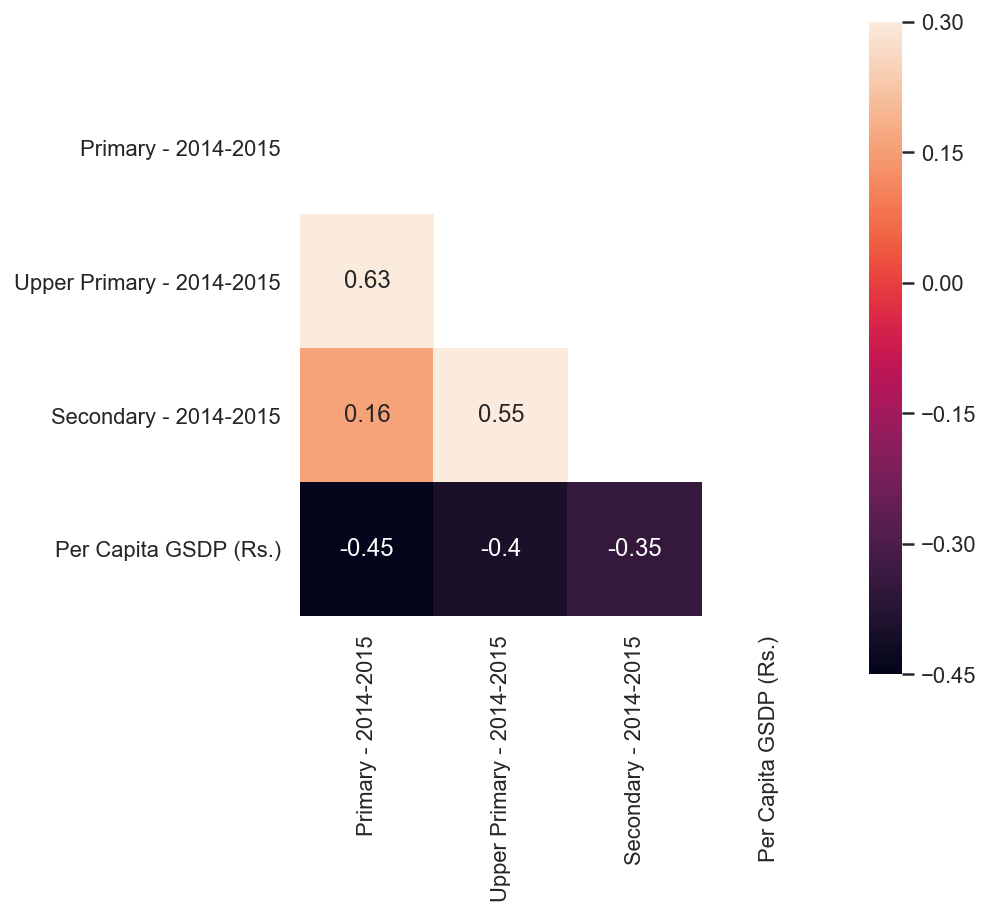

In [76]:
#
gdp_droput_df = state_dropout_df.copy()
# drop unnecessary columns from dataframe
gdp_droput_df = gdp_droput_df[['Primary - 2014-2015',
                              'Upper Primary - 2014-2015','Secondary - 2014-2015','Per Capita GSDP (Rs.)']]
numeric_cols = [col for col in gdp_droput_df]
gdp_droput_df[numeric_cols] = gdp_droput_df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)
#states_cat_df.info()

plt.figure(figsize=(6,6))
mask = np.zeros_like(gdp_droput_df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
      sns.heatmap(gdp_droput_df.corr(),mask=mask,vmax=.3, square=True, annot=True,
                 );#cmap='RdYlGn');

## Observations and Recommendations from above plot
- There is negative correlation of dropout percentage with per Capita GSDP (Rs.)
- In other words increase in dropout rate results in decrease in GDP per capita
- Upper Primary droput rate percentage is most negative correlated (-0.5) with GDP per Capita
- Government must take some measures to control Upper Primary dropout rate so that with decrease in droput rate, GDP per Capita should increase

## Correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP <a id='Sector and Droupout Correlation II'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [77]:
def sector_dropout_heatmap(sector_droput_df,education_levels):
    sns.set(font_scale=1)
    nrows = int(np.ceil(len(education_levels))) # Makes sure you have enough rows
    #tweak figsize scaler if graphs don't fit well
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(5,5*len(education_levels)), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, edu_level in enumerate(education_levels):
        plt.subplots_adjust(hspace = 1.2)
        # drop unnecessary columns from dataframe
        subset_df = sector_droput_df.copy()
        subset_df = subset_df[['Primary_Perc','Secondary_Perc','Tertiary_Perc',edu_level]]
        numeric_cols = [col for col in subset_df]
        subset_df[numeric_cols] = subset_df[numeric_cols].apply(
            pd.to_numeric, errors='coerce', axis=1)

        mask = np.zeros_like(subset_df.corr())
        mask[np.triu_indices_from(mask)] = True
        with sns.axes_style("white"):
              sns.heatmap(round(subset_df.corr(),2),mask=mask,vmax=.3, square=True, annot=True,
                         ax=ax[i]);#cmap='RdYlGn');
        ax[i].set_title("Correlation of {0} dropout rate with Sectors".format(edu_level),color='blue')

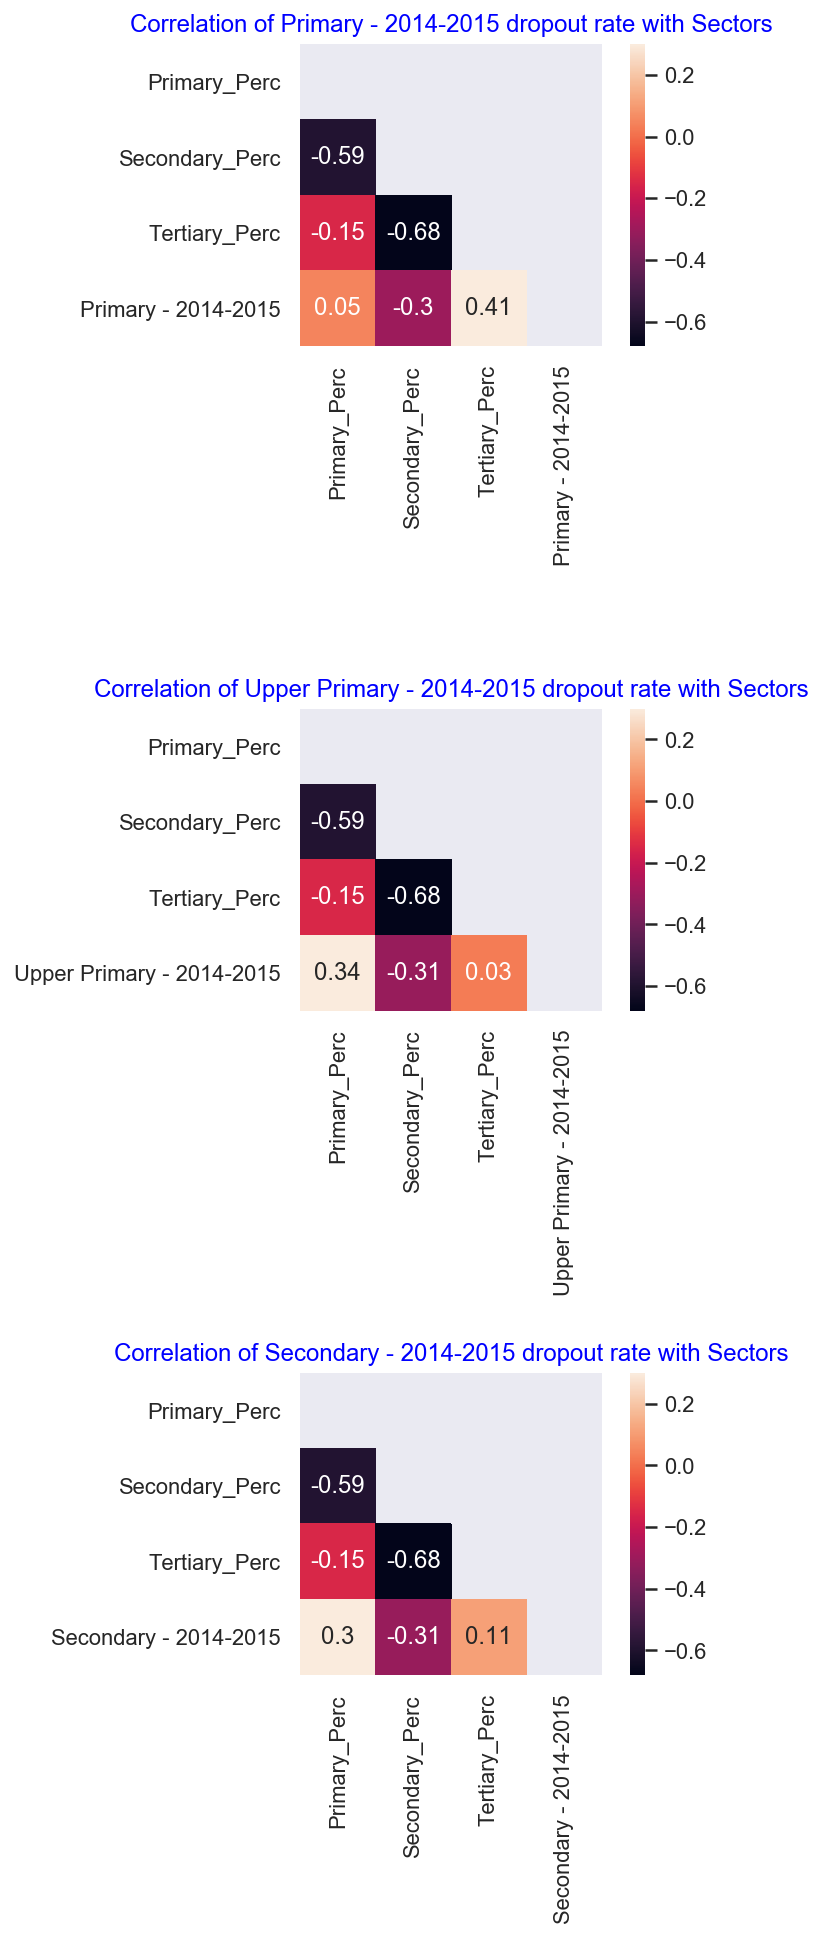

In [78]:
education_levels = ['Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']
sector_dropout_heatmap(state_dropout_df,education_levels)

## Observations from above plot
- Dropout rate of Primary education level is negative correlated(-0.26) with Secondary Sector %contribution. GDP of such states will decrease given the skilled and educated labor required for secondary sector is not easily available and thus doesn’t encourage industries to be setup. However there is positive correlation (0.27) with Primary Sector %contribution. Given primary sectors rely on unskilled labor, a drop in primary schools creates a large labor pool helping primary sector and thus contribution to GDP growth. 
- Dropout rate of Upper Primary education level is negative correlated(-0.35) with Secondary Sector %contribution. There is also a small negative correlation(-0.01) with Tertiary Sector %Contribution. This means with increase in dropout rate in Upper Primary education level, States with major contribution from Secondary Sectors will get affected. GDP of such states will decrease. However there is positive correlation (0.45) with Primary Sector %contribution as per reason explained above.
- Dropout rate of Upper Secondary education level is negative correlated(-0.25) with Secondary Sector %contribution. This means with increase in dropout rate in Secondary education level, States with major contribution from Secondary Sectors will get affected. GDP of such states will decrease. However there is positive correlation (0.28) with Primary Sector %contribution. This means with increase in dropout rate in Secondary education level, States with major contribution from Primary Sectors will see increase in GDP

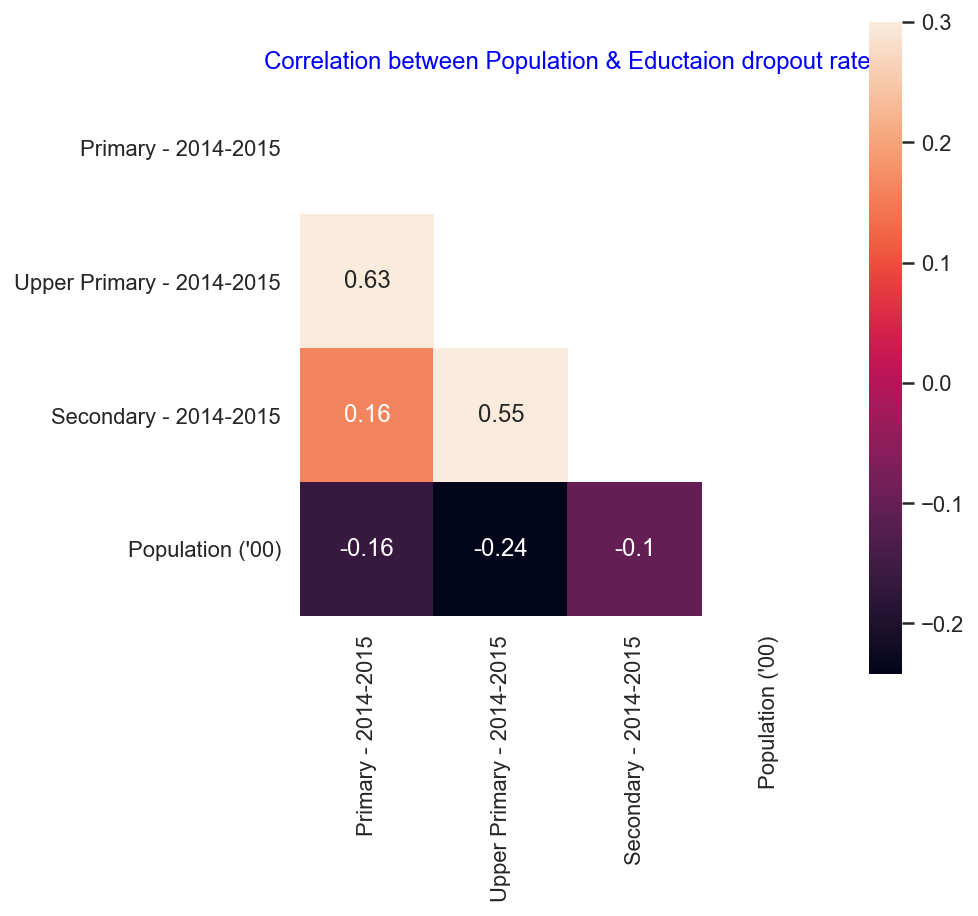

In [79]:
#
gdp_droput_df = state_dropout_df.copy()
# drop unnecessary columns from dataframe
gdp_droput_df = gdp_droput_df[['Primary - 2014-2015',
                              'Upper Primary - 2014-2015','Secondary - 2014-2015',"Population ('00)",]]
numeric_cols = [col for col in gdp_droput_df]
gdp_droput_df[numeric_cols] = gdp_droput_df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)
#states_cat_df.info()

plt.figure(figsize=(6,6))
mask = np.zeros_like(gdp_droput_df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
      sns.heatmap(gdp_droput_df.corr(),mask=mask,vmax=.3, square=True, annot=True,
                 );#cmap='RdYlGn');
plt.title("Correlation between Population & Eductaion dropout rate",color='blue');

## Observations from above plot
- Increase in population results in decrease (-0.23) in Primary dropout rate
- Increase in population results in increase (0.17) in Secondary dropout rate
- Increase in population results in small increase (0.041) in Upper Primary dropout rate

## Hypothesis from above data of dropout rate and Sector's %contribution and population <a id='Hypothesis II'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>
- Increase in dropout rate negatively affects Secondary sector and thereby GDP of states with major %contribution from secondary sector
- If the population increases, Secondary dropout rate also increases 
- Per Capita decreases with increase in dropout rate
- Government must bring in measures to control dropout rate which will help in increase in GDP of states